### PROYECTO INTEGRADOR (M4):  "Expansión Estratégica De Biogenesys Con Python"

## AVANCE 1:

#### 1. Se importan las Librerías:

In [1]:
# se importan las librerías necesarias para llevar a cabo el proyecto.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
import folium


#### 2. Se Carga el DataSet:

In [2]:
# 1. guardar ruta del archivo en una variable
ruta_csv = r"G:\Mi unidad\ACADEMICO\M4\PI\data_latinoamerica.csv"

# 2. utilizar try-except para leer el archivo y manejar errores posibles:
try:
    # Intentar cargar el archivo CSV:
    data = pd.read_csv(ruta_csv)
    print("El archivo fue cargado exitosamente.")
    
    # manejo de errores en caso de lectura no exitosa:
except FileNotFoundError:
    print("Error: El archivo no existe.")
except pd.errors.EmptyDataError:
    print("Error: El archivo está vacío.")
except pd.errors.ParserError:
    print("Error: Hubo un problema al parsear el archivo.")
except MemoryError:
    print("Error: No hay suficiente memoria para cargar el archivo.")
except Exception as e:
    print(f"Se produjo un error inesperado: {e}")


El archivo fue cargado exitosamente.


#### 3. Se realiza un analisis exploratorio incial para familiarizarnos con los datos:

Comprobamos que el dataset cargado, tiene la cantidad de registros y columnas especificadas:

In [3]:
# Extraer número de filas y columnas:
num_filas, num_columnas = data.shape

# Imprimir el número de filas y columnas
print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")

Número de filas: 12216057, Número de columnas: 50


Como conclusion del paso anterior, podemos notar de una primera instancia que se está trabajando con un dataset grande.

A continuacion, utilizando el metodo .head(), podemos obtener una vision general rapida del dataset. especificando como parametro el numero de registros que queremos mostrar:

In [4]:
#usamos .head para visualizar nuestro dataset, parcialmente, para una aproximación:
data.head(3)

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  

[3 rows x 50 columns]

Ademas, utilizando df solo, podemos ver las primeras y ultimas 5 filas del dataframe, como verificación rapida. 
Al final, podemos chequear nuevamente, la cantidad total de columnas y filas del DataSet: 

In [5]:
#Ampliamos la visualización del dataset:
data

location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
12216052         VE_Z  2022-09-13           VE    Venezuela            NaN   
12216053         VE_Z  2022-09-14           VE    Venezuela            NaN   
12216054         VE_Z  2022-09-15           VE    Venezuela            NaN   
12216055         VE_Z  2022-09-16           VE    Venezuela            NaN   
12216056         VE_Z  2022-09-17           VE    Venezuela            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
12216052           NaN                   NaN                  NaN   
12216053           NaN                   NaN                  NaN   
12216054           NaN                   NaN                  NaN   
12216055           NaN                   NaN                  NaN   
12216056           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
12216052                                    NaN   1422000.0  ...   
12216053                                    NaN   1422000.0  ...   
12216054                                    NaN   1422000.0  ...   
12216055                                    NaN   1422000.0  ...   
12216056                                    NaN   1422000.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
12216052                      NaN               NaN               NaN   
12216053                      NaN               NaN               NaN   
12216054                      NaN               NaN               NaN   
12216055                      NaN               NaN               NaN   
12216056                      NaN               NaN               NaN   

          life_expectancy  adult_male_mortality_rate  \
0                   76.52                    147.086   
1                   76.52                    147.086   
2                   76.52                    147.086   
3                   76.52                    147.086   
4                   76.52                    147.086   
...                   ...                        ...   
12216052              NaN                        NaN   
12216053              NaN                        NaN   
12216054              NaN                    

Luego de ejecutar df y df.head y haciendo un recorrido por el mismo, se puede notar que hay valores nulos en el dataset que debemos analizar y ver que se va a realizar mas adelante con ellos segun el contexto de esos datos.

Obtener información adicional del dataframe utilizando df.info(). El cual nos va a dar tambien la cantidad de registros y columnas de dataframe y nos va a permitir visualizar el nombre de cada columna con su tipo de dato. Pudiendo ver al final un conteo de columnas segun el tipo de datos y la cantidad de memoria que estamos utilizando con la carga de este dataframe. Todo esto permite mejorar la comprension de como estan los datos estructurados con los que estamos trabajando:

In [6]:
#obtenemos informacion adicional del dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   location_key                           object 
 1   date                                   object 
 2   country_code                           object 
 3   country_name                           object 
 4   new_confirmed                          float64
 5   new_deceased                           float64
 6   cumulative_confirmed                   float64
 7   cumulative_deceased                    float64
 8   cumulative_vaccine_doses_administered  float64
 9   population                             float64
 10  population_male                        float64
 11  population_female                      float64
 12  population_rural                       float64
 13  population_urban                       float64
 14  population_density                     float64
 

Como vimos anteriormente, la columna fecha, se encuentra en formato "object", por lo tanto la pasamos a tipo fecha:

In [7]:
#pasamos la columna fecha a formato "date" y comprobamos:
data["date"] = pd.to_datetime(data["date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12216057 entries, 0 to 12216056
Data columns (total 50 columns):
 #   Column                                 Dtype         
---  ------                                 -----         
 0   location_key                           object        
 1   date                                   datetime64[ns]
 2   country_code                           object        
 3   country_name                           object        
 4   new_confirmed                          float64       
 5   new_deceased                           float64       
 6   cumulative_confirmed                   float64       
 7   cumulative_deceased                    float64       
 8   cumulative_vaccine_doses_administered  float64       
 9   population                             float64       
 10  population_male                        float64       
 11  population_female                      float64       
 12  population_rural                       float64       


#### 4. Seleccionar solo los 6 paises donde la empresa nos solicita para su analisis de expansión estrategico: (Colombia, Argentina, Chile, Mexico, Peru, Brasil)

In [9]:
#realizamos un conteo de cada categoria dentro de la columna "country_name":
data.country_name.value_counts()

country_name
Brazil                5565456
Mexico                2475518
Peru                  1883891
Colombia              1145596
Argentina              540095
Chile                  359733
Dominican Republic      32703
Venezuela               24775
Ecuador                 24775
Guatemala               22793
Uruguay                 19820
Honduras                18829
Paraguay                18829
Nicaragua               17838
Cuba                    17838
El Salvador             14865
Panama                  13874
Bolivia                  9910
Costa Rica               7928
Puerto Rico               991
Name: count, dtype: int64

Luego de validar que tenemos mas paises que los 6 que nos piden trabajar, pasamos a filtrar por paises, utilizando la columna country_name, para responder a lo solicitado:

In [10]:
#Creamos una lista y procedemos a filtrar segun los 6 paises que nos indica la consigna:
paises_seleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

#Se crea una mascara, para seleccionar los paises de nuestro interés:
data_latinoamerica = data[data["country_name"].isin(paises_seleccionados)]

#Visualizar las dimensiones del df luego de realizar el filtrado 
# y evaluar la cantidad de filas y columnas con las que estamos trabajando:
data_latinoamerica.shape
                        

(11970289, 50)

Verificamos los paises, a modo de entender los datos, consultando las columnas mas indicativas para esto. Nos ayudamos además del visualizador "view data":

In [11]:
#seleccionamos las columnas y pedimos un conteo de los valores de ellas:
columnas_indicativas = ['location_key', 'country_code', 'country_name']
datos_columnas_paises = data_latinoamerica[columnas_indicativas].value_counts()

#imprimimos el resultado:
print(datos_columnas_paises)

location_key  country_code  country_name
PE_UCA_0401   PE            Peru            991
AR            AR            Argentina       991
AR_A          AR            Argentina       991
AR_A_007      AR            Argentina       991
AR_A_014      AR            Argentina       991
                                           ... 
AR_A_147      AR            Argentina       991
AR_A_140      AR            Argentina       991
AR_A_133      AR            Argentina       991
AR_A_126      AR            Argentina       991
AR_A_119      AR            Argentina       991
Name: count, Length: 12079, dtype: int64


A raiz de lo anterior, vamos a utilizar solo las instancias de los paises que nos brinda "location_key" y no aquellas que representan a las regiones o subregiones de los mismos, para evitar los datos duplicados. para este paso también nos ayudamos del Visualizador:

In [12]:
#creamos una variable que contenga los paises segun la columna location_key:
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica["location_key"].isin(("AR", "CL", "CO", "MX", "PE", "BR"))]

#utilizamos el metodo shape para verificar los cambios:
data_latinoamerica_paises.shape

(5946, 50)

#### 5. Tomamos los datos filtrando por fecha indicada, mayor a 1 enero 2021:

In [13]:
#filtramos por fecha solicitada:
data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica_paises["date"]  > "2021-01-01"]
#mostramos el shape del dataframe:
data_latinoamerica_paises_fecha.shape    

(3744, 50)

Luego de esto, concluimos que luego de aplicar los filtros por fecha y paises, estamos manejando un dataframe considerablemente mas reducido en registros.

#### 6. verificar la calidad de los datos: 

Otro paso valioso al momento de realizar un analisis del dataframe, es averiguar datos estadisticos del mismo como para tener una aproximación de el rango de valores que estamos manejando y la tendecia de los mismos, utilizando df.describe:

In [14]:
# Resumen estadístico de las columnas numéricas:
print("\nResumen estadístico de las columnas numéricas:")
data_latinoamerica_paises_fecha.describe()


Resumen estadístico de las columnas numéricas:


date  new_confirmed  new_deceased  cumulative_confirmed  \
count                 3744    3723.000000   3723.000000          3.723000e+03   
mean   2021-11-09 12:00:00   13936.279613    277.164115          6.784382e+06   
min    2021-01-02 00:00:00    -573.000000      0.000000          9.710000e+02   
25%    2021-06-06 18:00:00    1530.500000     25.500000          2.129800e+06   
50%    2021-11-09 12:00:00    5176.000000     99.000000          3.633546e+06   
75%    2022-04-14 06:00:00   14915.000000    313.500000          6.223497e+06   
max    2022-09-17 00:00:00  298408.000000  11447.000000          3.456883e+07   
std                    NaN   24273.618006    508.449365          7.999625e+06   

       cumulative_deceased  cumulative_vaccine_doses_administered  \
count          3723.000000                           3.160000e+03   
mean         193136.784045                           7.753959e+07   
min               1.000000                           1.800000e+01   
25%           59225.000000                           1.566807e+07   
50%          139636.000000                           4.229069e+07   
75%          215123.500000                           8.268101e+07   
max          685203.000000                           3.478685e+08   
std          183022.316718                           9.588963e+07   

         population  population_male  population_female  population_rural  \
count  3.744000e+03     3.744000e+03       3.744000e+03      3.744000e+03   
mean   7.772147e+07     3.787035e+07       3.927162e+07      1.255498e+07   
min    1.757400e+07     8.972014e+06       8.601989e+06      2.341903e+06   
25%    2.938188e+07     1.445076e+07       1.493113e+07      3.599141e+06   
50%    4.791080e+07     2.225416e+07       2.324582e+07      8.316128e+06   
75%    1.109920e+08     5.485523e+07       5.748131e+07      2.494867e+07   
max    2.125594e+08     1.044358e+08       1.081236e+08      2.780789e+07   
std    6.713776e+07     3.318494e+07       3.448407e+07      1.008074e+07   

       ...  population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count  ...             3.744000e+03      3.744000e+03       3744.000000   
mean   ...             1.443888e+07      2.636580e+06      59502.500000   
min    ...             6.723516e+06      7.094180e+05      12027.000000   
25%    ...             1.055471e+07      1.090598e+06      16425.000000   
50%    ...             1.291832e+07      1.543881e+06      45582.000000   
75%    ...             2.167191e+07      2.690269e+06     102418.000000   
max    ...             2.184651e+07      8.241430e+06     134981.000000   
std    ...             5.710077e+06      2.584740e+06      45125.320206   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   
std           1.597394                  27.000146   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   
std                      11.800623                 13.027569   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    1628.000000          1.008000e+03  
mean                    14.816667   19004.277641          1.446491e+07  
min                     12

Luego de ejecutar .describe en el paso anterior, se puede detectar en un primer vistazo que la columna date, se encuentra correctamente cambiada a tipo fecha y que el rango va desde 1-ene-2021 a 17-nov-2022.
Hay valores negativos en algunas columnas que no deberian tener esos valores, indicando que hay datos a revisar para darle el formato adecuado.Se entiende que esos valores deben ser positivos en realidad, por lo tanto se pasan a su valor absoluto, en las columnas detectadas:

Procedemos a convertir en positivo, los valores negativos de las columnas "new_recovered" y "new_confirmed":

In [18]:
#Convertir valores negativos en valores absolutos en las columnas new_recovered y new_confirmed:
#data_latinoamerica_paises_fecha['new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].abs()
#data_latinoamerica_paises_fecha['new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].abs()

data_latinoamerica_paises_fecha.loc[:, "new_recovered"] = data_latinoamerica_paises_fecha["new_recovered"].abs()
data_latinoamerica_paises_fecha.loc[:, "new_confirmed"] = data_latinoamerica_paises_fecha["new_confirmed"].abs()

#Verificar si las conversiones fueron exitosas:
print("Valores negativos en new_recovered:", (data_latinoamerica_paises_fecha["new_recovered"] < 0).sum())
print("Valores negativos en new_confirmed:", (data_latinoamerica_paises_fecha["new_confirmed"] < 0).sum())


Valores negativos en new_recovered: 0
Valores negativos en new_confirmed: 0


Podemos volver a verificar si el cambio se realizó correctamente:

In [16]:
# Resumen estadístico de las columnas numéricas:
print("\nResumen estadístico de las columnas numéricas:")
data_latinoamerica_paises_fecha.describe()


Resumen estadístico de las columnas numéricas:


date  new_confirmed  new_deceased  cumulative_confirmed  \
count                 3744    3723.000000   3723.000000          3.723000e+03   
mean   2021-11-09 12:00:00   13936.587429    277.164115          6.784382e+06   
min    2021-01-02 00:00:00       0.000000      0.000000          9.710000e+02   
25%    2021-06-06 18:00:00    1530.500000     25.500000          2.129800e+06   
50%    2021-11-09 12:00:00    5176.000000     99.000000          3.633546e+06   
75%    2022-04-14 06:00:00   14915.000000    313.500000          6.223497e+06   
max    2022-09-17 00:00:00  298408.000000  11447.000000          3.456883e+07   
std                    NaN   24273.441229    508.449365          7.999625e+06   

       cumulative_deceased  cumulative_vaccine_doses_administered  \
count          3723.000000                           3.160000e+03   
mean         193136.784045                           7.753959e+07   
min               1.000000                           1.800000e+01   
25%           59225.000000                           1.566807e+07   
50%          139636.000000                           4.229069e+07   
75%          215123.500000                           8.268101e+07   
max          685203.000000                           3.478685e+08   
std          183022.316718                           9.588963e+07   

         population  population_male  population_female  population_rural  \
count  3.744000e+03     3.744000e+03       3.744000e+03      3.744000e+03   
mean   7.772147e+07     3.787035e+07       3.927162e+07      1.255498e+07   
min    1.757400e+07     8.972014e+06       8.601989e+06      2.341903e+06   
25%    2.938188e+07     1.445076e+07       1.493113e+07      3.599141e+06   
50%    4.791080e+07     2.225416e+07       2.324582e+07      8.316128e+06   
75%    1.109920e+08     5.485523e+07       5.748131e+07      2.494867e+07   
max    2.125594e+08     1.044358e+08       1.081236e+08      2.780789e+07   
std    6.713776e+07     3.318494e+07       3.448407e+07      1.008074e+07   

       ...  population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count  ...             3.744000e+03      3.744000e+03       3744.000000   
mean   ...             1.443888e+07      2.636580e+06      59502.500000   
min    ...             6.723516e+06      7.094180e+05      12027.000000   
25%    ...             1.055471e+07      1.090598e+06      16425.000000   
50%    ...             1.291832e+07      1.543881e+06      45582.000000   
75%    ...             2.167191e+07      2.690269e+06     102418.000000   
max    ...             2.184651e+07      8.241430e+06     134981.000000   
std    ...             5.710077e+06      2.584740e+06      45125.320206   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   
std           1.597394                  27.000146   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   
std                      11.800623                 13.027569   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    1628.000000          1.008000e+03  
mean                    14.816667   19198.998771          1.446491e+07  
min                     12

Sabiendo en pasos anteriores que detectamos nulos, es hora de verificar la cantidad de nulos que tenemos en el dataset:

In [20]:
# Filtramos los datos para los países de interés:
paises = ["AR", "BR", "CL", "CO", "MX", "PE"]
comparativa_paises_nulos = data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha["country_code"].isin(paises)]

# Agrupamos por el nombre del país y contar los valores nulos por columna en cada grupo excluyendo las columnas de agrupación:
valores_nulos_por_pais = comparativa_paises_nulos.groupby("country_code").apply(lambda x: x.drop(columns=["country_code"]).isna().sum())

# Imprimimos la cantidad de valores nulos por columna para cada país:
print("Cantidad de valores nulos por columna para cada país:")
print(valores_nulos_por_pais)
print("------------------------------------")



Cantidad de valores nulos por columna para cada país:
              location_key  date  country_name  new_confirmed  new_deceased  \
country_code                                                                  
AR                       0     0             0              4             4   
BR                       0     0             0              2             2   
CL                       0     0             0              4             4   
CO                       0     0             0              4             4   
MX                       0     0             0              3             3   
PE                       0     0             0              4             4   

              cumulative_confirmed  cumulative_deceased  \
country_code                                              
AR                               4                    4   
BR                               2                    2   
CL                               4                    4   
CO                

C:\Users\franb\AppData\Local\Temp\ipykernel_10636\4131261905.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  valores_nulos_por_pais = comparativa_paises_nulos.groupby("country_code").apply(lambda x: x.drop(columns=["country_code"]).isna().sum())


...y de una forma mas resuminda sin separar por paises:

In [21]:
# Contar la cantidad de valores nulos por columna usando isna() y sum() :
valores_nulos = data_latinoamerica_paises_fecha.isna().sum()

# Imprimir la cantidad de valores nulos por columna:
print("Cantidad de valores nulos por columna:")
print(valores_nulos)

Cantidad de valores nulos por columna:
location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                     

Se completan los valores faltantes de las columnas 'new_recovered', 'new_deceased' y 'new_confirmed' con ceros:
(new recovered: son muchos datos. Podemos aplicar promedio mas adelante. los 2 restantes son pocos y no deberían afectar los resultados)

In [23]:
# Rellenar los valores nulos en las columnas 'new_recovered', 'new_deceased' y 'new_confirmed' con ceros:
data_latinoamerica_paises_fecha.loc[:, 'new_recovered'] = data_latinoamerica_paises_fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_fecha.loc[:, 'new_deceased'] = data_latinoamerica_paises_fecha['new_deceased'].fillna(0)
data_latinoamerica_paises_fecha.loc[:, 'new_confirmed'] = data_latinoamerica_paises_fecha['new_confirmed'].fillna(0)

Verificamos que se realicen los cambios sin alterar el dataframe y se verifican nulos en otras columnas

In [24]:
data_latinoamerica_paises_fecha.isna().sum()

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                               0
new_deceased                                0
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

Completamos la columna de new_recovered con el promedio de cada pais:

In [25]:
# Calculamos el promedio de 'new_recovered' por país:
promedio_recuperados_por_pais = data_latinoamerica_paises_fecha.groupby("country_name")["new_recovered"].mean()

# Rellenamos los valores nulos en 'new_recovered' con el promedio específico para cada país:
for pais in data_latinoamerica_paises_fecha["country_name"].unique():
    mask = (data_latinoamerica_paises_fecha["country_name"] == pais)
    data_latinoamerica_paises_fecha.loc[mask, "new_recovered"].fillna(promedio_recuperados_por_pais[pais], inplace=True)

# Verifica si los valores nulos se han llenado correctamente
nulos_new_recovered = data_latinoamerica_paises_fecha["new_recovered"].isnull().sum()
print("Cantidad de valores nulos en 'new_recovered' después de llenarlos:", nulos_new_recovered)

Cantidad de valores nulos en 'new_recovered' después de llenarlos: 0


En el caso de las columnas 'cumulative_confirmed','cumulative_deceased' y 'cumulative_recovered' completamos considerando que el primer dato de cada pais es nulo por lo que se asigna el primer dato first_row [ ] de cada uno, y en segundo lugar se completa con el acumulado anterior utilizando cumsum():

In [26]:
# Verificación del primer dato:
for pais in data_latinoamerica_paises_fecha['country_name'].unique():
    mask = (data_latinoamerica_paises_fecha['country_name'] == pais)
    first_row = data_latinoamerica_paises_fecha.loc[mask].iloc[0]
    
    if pd.isnull(first_row['cumulative_confirmed']):
        data_latinoamerica_paises_fecha.loc[mask, 'cumulative_confirmed'] = first_row['new_confirmed'] 
    
    if pd.isnull(first_row['cumulative_deceased']):
        data_latinoamerica_paises_fecha.loc[mask, 'cumulative_deceased'] = first_row['new_deceased']
    
    if pd.isnull(first_row['cumulative_recovered']):
        data_latinoamerica_paises_fecha.loc[mask, 'cumulative_recovered'] = first_row['new_recovered']

# Cálculo acumulativo para filas restantes
for pais in data_latinoamerica_paises_fecha['country_name'].unique():
    mask = (data_latinoamerica_paises_fecha['country_name'] == pais)
    data_latinoamerica_paises_fecha.loc[mask, 'cumulative_confirmed'] = data_latinoamerica_paises_fecha.loc[mask, 'new_confirmed'].cumsum()
    data_latinoamerica_paises_fecha.loc[mask, 'cumulative_deceased'] = data_latinoamerica_paises_fecha.loc[mask, 'new_deceased'].cumsum()
    data_latinoamerica_paises_fecha.loc[mask, 'cumulative_recovered'] = data_latinoamerica_paises_fecha.loc[mask, 'new_recovered'].cumsum()

# Verificación de valores nulos después de completar los datos
nulos_despues_de_eliminar = data_latinoamerica_paises_fecha.isnull().sum()
print("Cantidad de valores nulos después de completar los datos:")
print(nulos_despues_de_eliminar)

Cantidad de valores nulos después de completar los datos:
location_key                               0
date                                       0
country_code                               0
country_name                               0
new_confirmed                              0
new_deceased                               0
cumulative_confirmed                       0
cumulative_deceased                        0
cumulative_vaccine_doses_administered    584
population                                 0
population_male                            0
population_female                          0
population_rural                           0
population_urban                           0
population_density                         0
human_development_index                    0
population_age_00_09                       0
population_age_10_19                       0
population_age_20_29                       0
population_age_30_39                       0
population_age_40_49                      

Completamos la columna 'cumulative_vaccine_doses_administered'; en este caso se toma el dato anterior y, en el caso de que fuera el primer dato del subgrupo se toma el dato posterior. De esta forma se intenta dar continuidad a la curva en las graficas.

In [27]:
# Ordenamos los datos previo a completar los acumulados de las vacunaciones:
data_latinoamerica_paises_fecha = data_latinoamerica_paises_fecha.sort_values(by=['country_name', 'date'], ascending=True)
# Reemplazamos los valores nulos con el valor siguiente (forward fill):
data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_fecha.groupby('country_name')['cumulative_vaccine_doses_administered'].ffill()

# Reemplazar los valores nulos restantes con el valor anterior (backward fill):
data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_fecha.groupby('country_name')['cumulative_vaccine_doses_administered'].bfill()

In [28]:
# Verificación de valores nulos después de completar los datos:
nulos_despues_de_eliminar = data_latinoamerica_paises_fecha.isnull().sum()
print("Cantidad de valores nulos después de completar los datos:")
print(nulos_despues_de_eliminar)

Cantidad de valores nulos después de completar los datos:
location_key                              0
date                                      0
country_code                              0
country_name                              0
new_confirmed                             0
new_deceased                              0
cumulative_confirmed                      0
cumulative_deceased                       0
cumulative_vaccine_doses_administered     0
population                                0
population_male                           0
population_female                         0
population_rural                          0
population_urban                          0
population_density                        0
human_development_index                   0
population_age_00_09                      0
population_age_10_19                      0
population_age_20_29                      0
population_age_30_39                      0
population_age_40_49                      0
population_age_50_

Rellenar con el promedio, los valores faltantes de average_temperature_celsius , minimum_temperature_celsius, maximum_temperature_celsius, rainfall_mm , relative_humidity:

In [29]:
# usamos un for para completar los valores nulos de las columnas con la media de cada pais:
# average_temperature_celsius , minimum_temperature_celsius, maximum_temperature_celsius, rainfall_mm , relative_humidity 
paises_seleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

for pais in paises_seleccionados:
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais , "average_temperature_celsius"] = data_latinoamerica_paises_fecha["average_temperature_celsius"].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "average_temperature_celsius"].mean()))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais , "minimum_temperature_celsius"] = data_latinoamerica_paises_fecha["minimum_temperature_celsius"].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "minimum_temperature_celsius"].mean()))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais , "maximum_temperature_celsius"] = data_latinoamerica_paises_fecha["maximum_temperature_celsius"].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "maximum_temperature_celsius"].mean()))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais , "rainfall_mm"] = data_latinoamerica_paises_fecha["rainfall_mm"].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "rainfall_mm"].mean()))
    data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais , "relative_humidity"] = data_latinoamerica_paises_fecha["relative_humidity"].fillna(round(data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha["country_name"]==pais, "relative_humidity"].mean()))
    
data_latinoamerica_paises_fecha.isna().sum()

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [30]:
data_latinoamerica_paises_fecha

location_key       date country_code country_name  new_confirmed  \
367                AR 2021-01-02           AR    Argentina         7767.0   
368                AR 2021-01-03           AR    Argentina         4934.0   
369                AR 2021-01-04           AR    Argentina        13953.0   
370                AR 2021-01-05           AR    Argentina        14085.0   
371                AR 2021-01-06           AR    Argentina        14496.0   
...               ...        ...          ...          ...            ...   
10253872           PE 2022-09-13           PE         Peru         1150.0   
10253873           PE 2022-09-14           PE         Peru            0.0   
10253874           PE 2022-09-15           PE         Peru            0.0   
10253875           PE 2022-09-16           PE         Peru            0.0   
10253876           PE 2022-09-17           PE         Peru            0.0   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
367              166.0                7767.0                166.0   
368              157.0               12701.0                323.0   
369              157.0               26654.0                480.0   
370              160.0               40739.0                640.0   
371              131.0               55235.0                771.0   
...                ...                   ...                  ...   
10253872          22.0             3119954.0             122285.0   
10253873           0.0             3119954.0             122285.0   
10253874           0.0             3119954.0             122285.0   
10253875           0.0             3119954.0             122285.0   
10253876           0.0             3119954.0             122285.0   

          cumulative_vaccine_doses_administered  population  ...  \
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
371                                     34162.0  44938712.0  ...   
...                                         ...         ...  ...   
10253872                             83624934.0  29381884.0  ...   
10253873                             83624934.0  29381884.0  ...   
10253874                             83624934.0  29381884.0  ...   
10253875                             83624934.0  29381884.0  ...   
10253876                             83624934.0  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
371                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
371                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    146.370   
1

Nos toca ahora cambiar los tipos de datos de las columnas:

In [32]:
# Cambiar el tipo de datos de las columnas a 'int64' donde sea apropiado:
columnas_a_int = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 'new_recovered', 'cumulative_recovered',
    'population', 'population_male', 'population_female', 'population_rural', 'population_urban',
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Convertir las columnas especificadas a 'int64':
data_latinoamerica_paises_fecha[columnas_a_int] = data_latinoamerica_paises_fecha[columnas_a_int].astype('int64')

#comprobamos:
data_latinoamerica_paises_fecha.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 367 to 10253876
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   location_key                           3744 non-null   object        
 1   date                                   3744 non-null   datetime64[ns]
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   int64         
 5   new_deceased                           3744 non-null   int64         
 6   cumulative_confirmed                   3744 non-null   int64         
 7   cumulative_deceased                    3744 non-null   int64         
 8   cumulative_vaccine_doses_administered  3744 non-null   int64         
 9   population                             3744 non-null   int64  

#### 7. guardar el dataset modificado

In [33]:
data_latinoamerica_paises_fecha.to_csv("DatosFinalesFiltrado.csv", index=False)

#### 8. Cargar DataSet Filtrado: 
Podemos reiniciar el notebook, para liberar memoria y comenzar desde el nuevo archivo guardado:

In [34]:

# utilizar try-except para leer el archivo y manejar errores posibles:
try:
    # Intentar cargar el archivo CSV:
    datos_finales = pd.read_csv("DatosFinalesFiltrado.csv")
    print("El archivo fue cargado exitosamente.")
    
    # manejo de errores en caso de lectura no exitosa:
except FileNotFoundError:
    print("Error: El archivo no existe.")
except pd.errors.EmptyDataError:
    print("Error: El archivo está vacío.")
except pd.errors.ParserError:
    print("Error: Hubo un problema al parsear el archivo.")
except MemoryError:
    print("Error: No hay suficiente memoria para cargar el archivo.")
except Exception as e:
    print(f"Se produjo un error inesperado: {e}")

El archivo fue cargado exitosamente.


#### 9. Visualización resumida del dataset recien cargado:

In [35]:
datos_finales

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina           7767   
1              AR  2021-01-03           AR    Argentina           4934   
2              AR  2021-01-04           AR    Argentina          13953   
3              AR  2021-01-05           AR    Argentina          14085   
4              AR  2021-01-06           AR    Argentina          14496   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru           1150   
3740           PE  2022-09-14           PE         Peru              0   
3741           PE  2022-09-15           PE         Peru              0   
3742           PE  2022-09-16           PE         Peru              0   
3743           PE  2022-09-17           PE         Peru              0   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0              166                  7767                  166   
1              157                 12701                  323   
2              157                 26654                  480   
3              160                 40739                  640   
4              131                 55235                  771   
...            ...                   ...                  ...   
3739            22               3119954               122285   
3740             0               3119954               122285   
3741             0               3119954               122285   
3742             0               3119954               122285   
3743             0               3119954               122285   

      cumulative_vaccine_doses_administered  population  ...  \
0                                     20334    44938712  ...   
1                                     20529    44938712  ...   
2                                     25164    44938712  ...   
3                                     29852    44938712  ...   
4                                     34162    44938712  ...   
...                                     ...         ...  ...   
3739                               83624934    29381884  ...   
3740                               83624934    29381884  ...   
3741                               83624934    29381884  ...   
3742                               83624934    29381884  ...   
3743                               83624934    29381884  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

#### 10. informacion estadistica mas detallada del dataset:

In [36]:
for columna in datos_finales.columns:
    print(columna)
    print(datos_finales[columna].describe())
    print("-----------------------------------------------")

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-----------------------------------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-----------------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-----------------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-----------------------------------------------
new_confirmed
count      3744.000000
mean      13858.417468
std       24227.625970
min           0.000000
25%        1510.250000
50%        5112.500000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
-----------------------------------------------
new_deceased
count     3744.000000
mean       275.609509
std        50

Como extra, vamos a crear una funcion que nos muestre rango, varianza, moda y mediana:

In [37]:
# Obtengo mediante una funcion la mediana, varianza y rango
def estadistica_detallada (data):
    for i in data:
        if data[i].dtype == "float64" or data[i].dtype == "int64":
            print (i)
            print ("Mediana: ", data[i].median())
            print ("Moda: ", data[i].mode())
            print ("Varianza: ", data[i].var())
            print ("Maximo: ", data[i].max())
            print ("Minimo: ",data[i].min())
            print ("Rango: ",data[i].max() - data[i].min())
            print ("________________________")#Se imprime esta fila para dividir la infomracion por columnas y facilitar la legibilidad 
estadistica_detallada (datos_finales)    

new_confirmed
Mediana:  5112.5
Moda:  0    0
Name: new_confirmed, dtype: int64
Varianza:  586977860.1235633
Maximo:  298408
Minimo:  0
Rango:  298408
________________________
new_deceased
Mediana:  98.0
Moda:  0    0
Name: new_deceased, dtype: int64
Varianza:  257498.91186254224
Maximo:  11447
Minimo:  0
Rango:  11447
________________________
cumulative_confirmed
Mediana:  2880439.0
Moda:  0    4592597
Name: cumulative_confirmed, dtype: int64
Varianza:  34265986683858.074
Maximo:  26869401
Minimo:  1695
Rango:  26867706
________________________
cumulative_deceased
Mediana:  90051.0
Moda:  0    114760
Name: cumulative_deceased, dtype: int64
Varianza:  15972784851.01317
Maximo:  489792
Minimo:  64
Rango:  489728
________________________
cumulative_vaccine_doses_administered
Mediana:  47784908.0
Moda:  0    209673612
Name: cumulative_vaccine_doses_administered, dtype: int64
Varianza:  8751364136884599.0
Maximo:  347868481
Minimo:  18
Rango:  347868463
________________________
population
M

Conclusion sobre las estadisticas realizadas:

Estos datos estadisticos, nos dan detalle de las columnas numericas, pudiendo tener inforacion preliminar del dataframe que estamos manipulando en esta instancia.
Podemos notar algunos detalles:
-la poblacion esta repartida entre varones y mujeres bastante equitativa.
-la mayoría de la población vive en áreas urbanas en comparación con las rurales.
-Las diferencias económicas y climáticas son notables, lo que puede influir en otros factores como la salud pública y la respuesta a pandemias.
-se maneja un rango muy amplio de valores.
-la dispersion de los datos es alta.



Escala de los Datos: La varianza depende de la escala de los datos. Los datos están en millones, entonces es más razonable obtener un valor de varianza alto y 
gran dispersión en tus datos. Hay valores individuales en el conjunto de datos están muy alejados de la media. Posibles outliers.


## AVANCE 2:

#### 11. verificamos la no existencia de duplicados y nulos y chequeamos los tipos de datos:

Verificamos que no haya datos duplicados.

In [38]:
print(datos_finales.duplicated().sum())

0


Vamos a chequear que la columna fecha, conserve el tipo de dato adecuado y ademas setearla como mi indice, ademas importante vamos a poder ver si tenemos valores nulos:

In [39]:
datos_finales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   int64  
 5   new_deceased                           3744 non-null   int64  
 6   cumulative_confirmed                   3744 non-null   int64  
 7   cumulative_deceased                    3744 non-null   int64  
 8   cumulative_vaccine_doses_administered  3744 non-null   int64  
 9   population                             3744 non-null   int64  
 10  population_male                        3744 non-null   int64  
 11  popu

In [40]:
#pasamos a tipo fecha:
datos_finales["date"] = pd.to_datetime(datos_finales["date"])
datos_finales.set_index("date", inplace=True)

In [41]:
#comprobamos el indice:
datos_finales

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina           7767   
2021-01-03           AR           AR    Argentina           4934   
2021-01-04           AR           AR    Argentina          13953   
2021-01-05           AR           AR    Argentina          14085   
2021-01-06           AR           AR    Argentina          14496   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru           1150   
2022-09-14           PE           PE         Peru              0   
2022-09-15           PE           PE         Peru              0   
2022-09-16           PE           PE         Peru              0   
2022-09-17           PE           PE         Peru              0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02           166                  7767                  166   
2021-01-03           157                 12701                  323   
2021-01-04           157                 26654                  480   
2021-01-05           160                 40739                  640   
2021-01-06           131                 55235                  771   
...                  ...                   ...                  ...   
2022-09-13            22               3119954               122285   
2022-09-14             0               3119954               122285   
2022-09-15             0               3119954               122285   
2022-09-16             0               3119954               122285   
2022-09-17             0               3119954               122285   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                  20334    44938712   
2021-01-03                                  20529    44938712   
2021-01-04                                  25164    44938712   
2021-01-05                                  29852    44938712   
2021-01-06                                  34162    44938712   
...                                           ...         ...   
2022-09-13                               83624934    29381884   
2022-09-14                               83624934    29381884   
2022-09-15                               83624934    29381884   
2022-09-16                               83624934    29381884   
2022-09-17                               83624934    29381884   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02         19523766  ...               15057273.0         2690269.0   
2021-01-03         19523766  ...               15057273.0         2690269.0   
2021-01-04         19523766  ...               15057273.0         2690269.0   
2021-01-05         19523766  ...               15057273.0         2690269.0   
2021-01-06         19523766  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13         14450757  ...               10554712.0         1256339.0   
2022-09-14         14450757  ...               10554712.0         1256339.0   
2022-09-15         14450757  ...               10554712.0         1256339.0   
2022-09-16         14450757  ...               10554712.0         1256339.0   
2022-09-17         14450757  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

##### 12. Visualizacion de datos:

A pesar de ya haber realizado medidas de tendencia central y dispersion, para comprender mejor los datos con los que estamos trabajando, vamos a crear una matriz de correlacion para hacer un analisis de como se relacionan las variables, utilizando el nuevo csv filtrado y limpio (datos_finales):

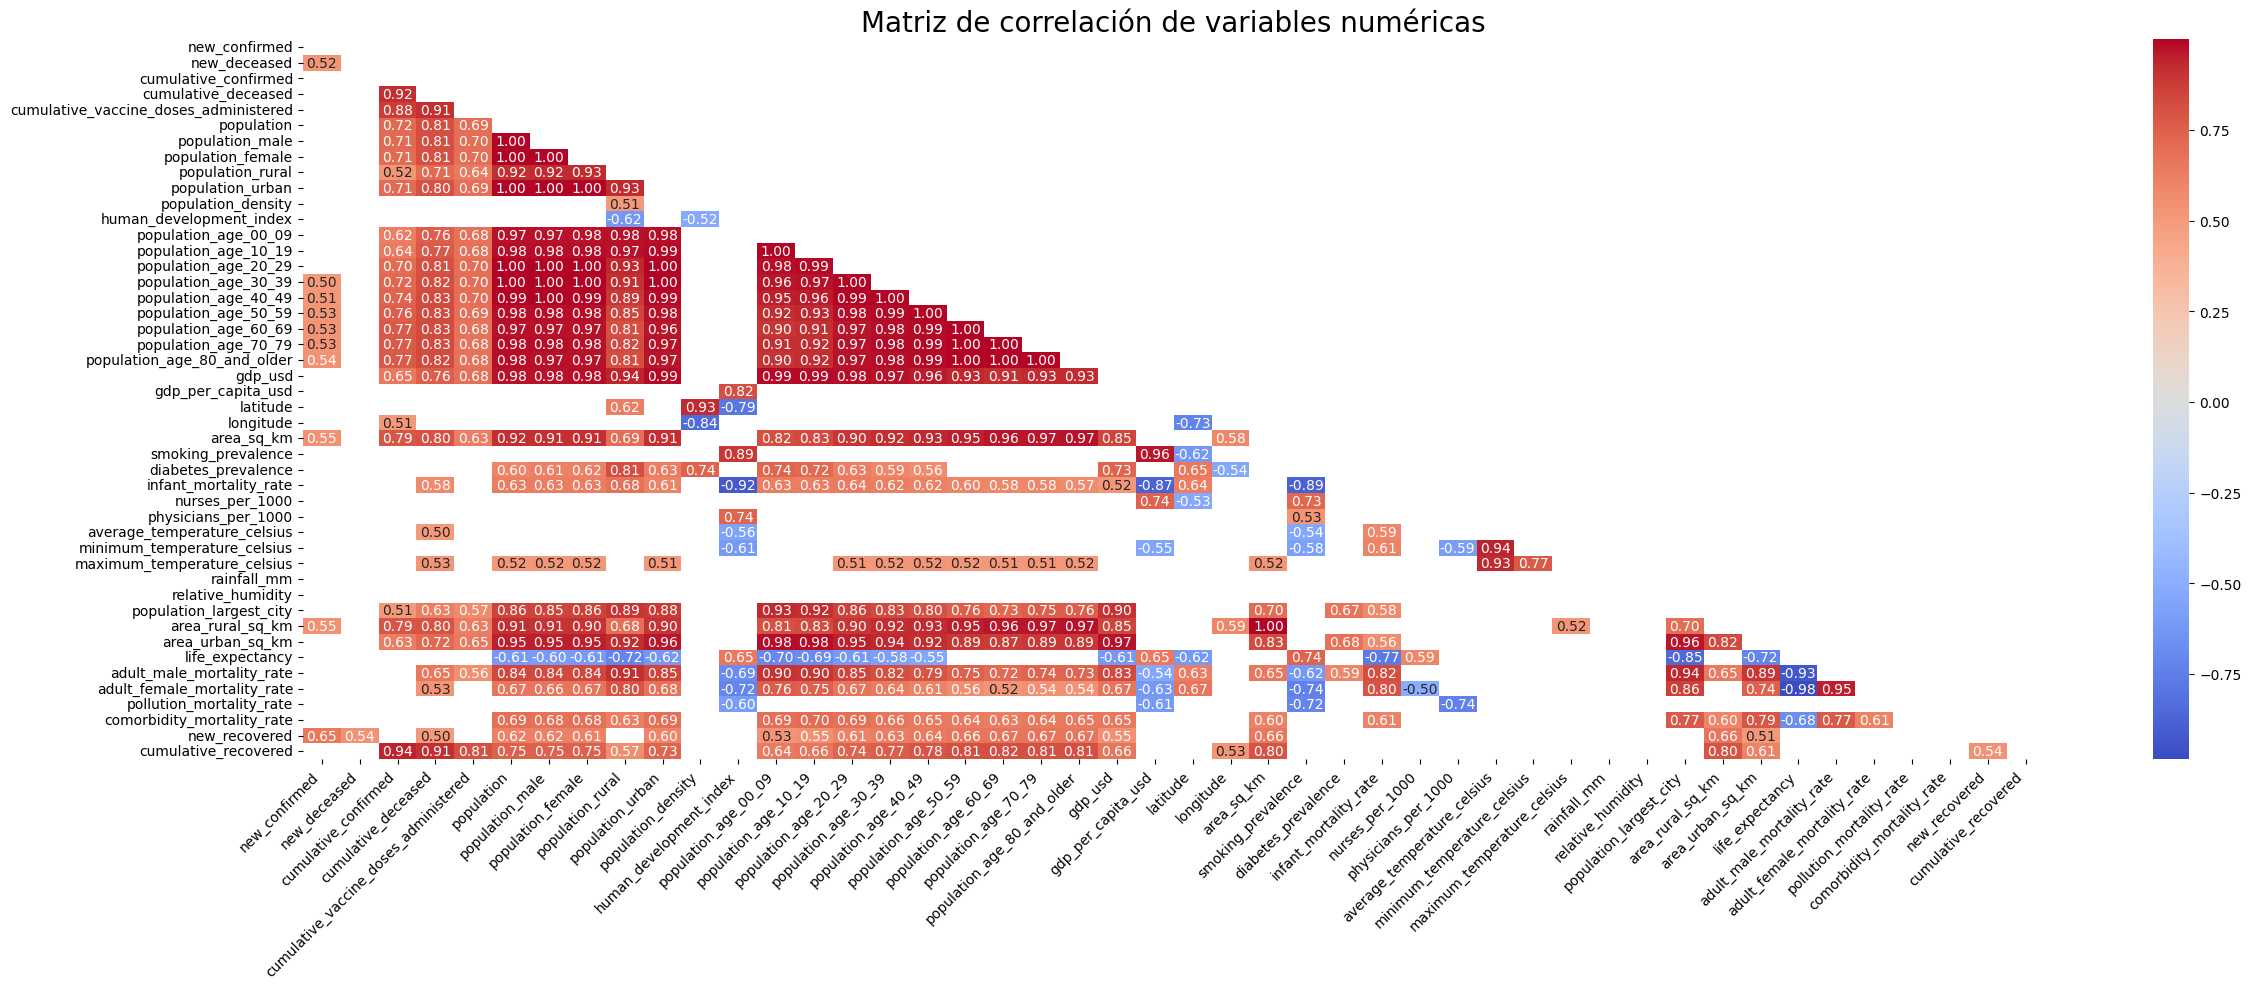

In [43]:
# Se crea la matriz de correlación:
numeric_columns = datos_finales.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = datos_finales[numeric_columns].corr()

# Crear una máscara para el triángulo superior:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#vamos a mostrar valores superiores a 0.5, es decir donde haya una correlación fuerte:
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Creamos el mapa de calor:
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')

# Añadimos título:
plt.title("Matriz de correlación de variables numéricas", fontsize=20)

# Ajustar diseño del gráfico:
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar gráfico
plt.show()

La matriz de correlación revela relaciones significativas entre diversos factores del COVID-19 en los paises del estudio, destacando:

Densidad poblacional y casos confirmados: Se observa una correlación positiva entre la densidad poblacional y el número de casos confirmados, sugiriendo que la concentración de personas facilita la transmisión del virus.

PIB per cápita y casos confirmados: La correlación entre PIB per cápita y casos confirmados es insignificante, indicando que el nivel de ingresos no tiene un impacto determinante en la cantidad de casos.

PIB per cápita y muertes: Se observa una correlación negativa entre PIB per cápita y muertes por COVID-19, sugiriendo que los países con mayor ingreso tienen mejores recursos para enfrentar la pandemia y reducir la mortalidad.

Los nuevos casos afectan mayormente de 30 años en adelante

Al mismo tiempo que aumentan los caso, se observa un aumento de casos recuperados.

Se puede ver una relacion fuerte entre muertes y poblacion mayor a 40 años hasta 79.

Es importante destacar que estas correlaciones no implican necesariamente relaciones causales, y se requiere un análisis más profundo para comprender el comportamiento de las variables.

            ...................................................................................

En varios graficos de barras veremos como se comportan las variables segun el pais:

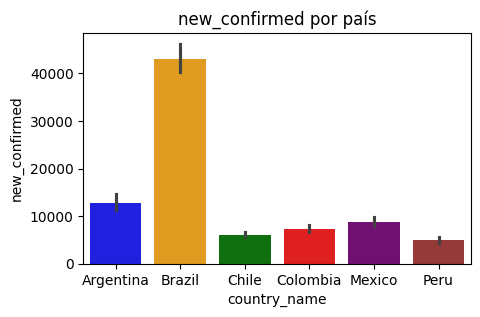

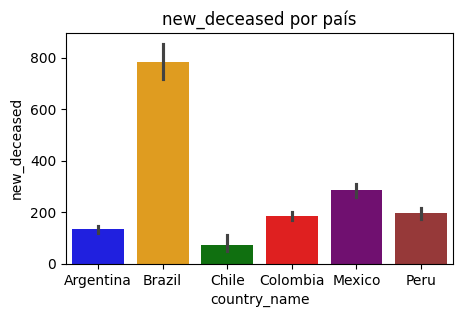

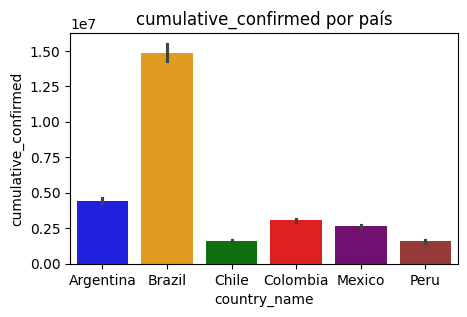

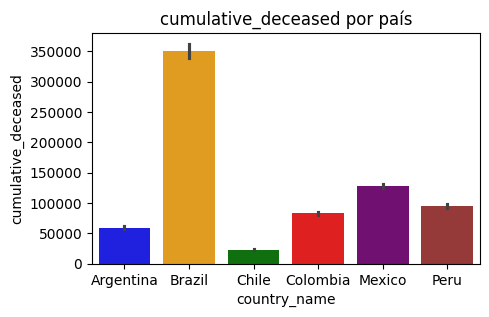

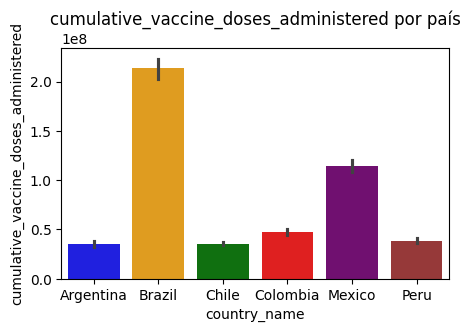

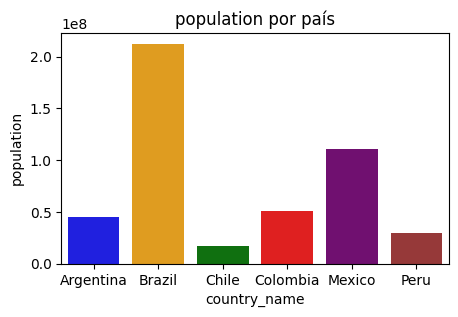

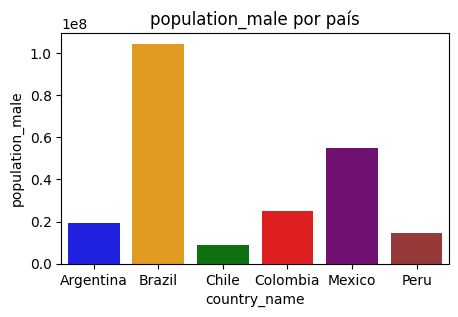

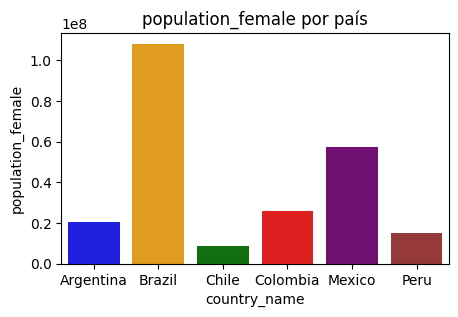

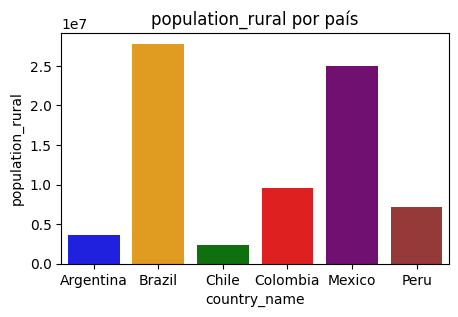

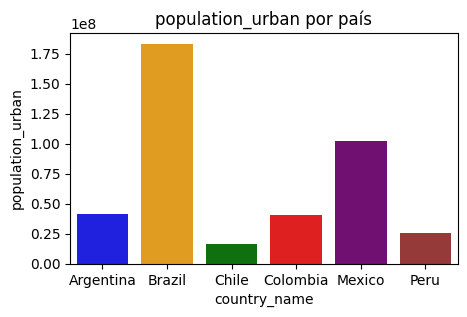

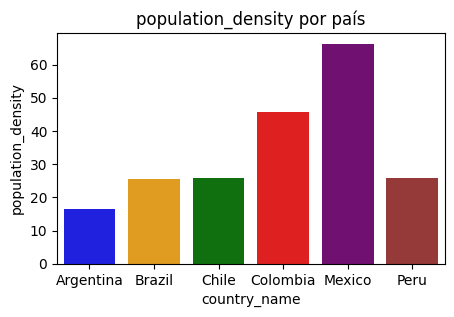

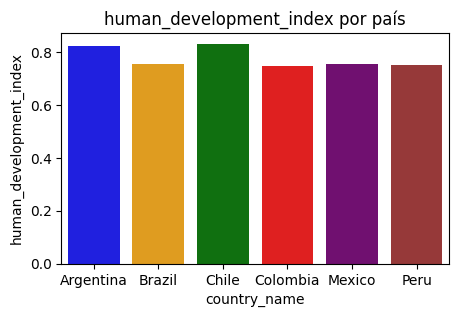

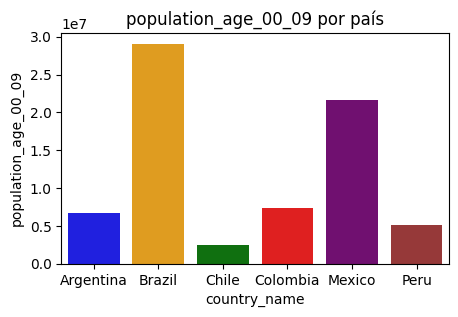

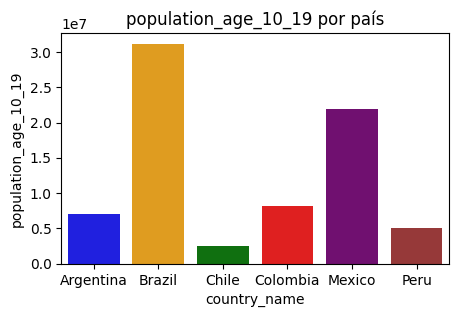

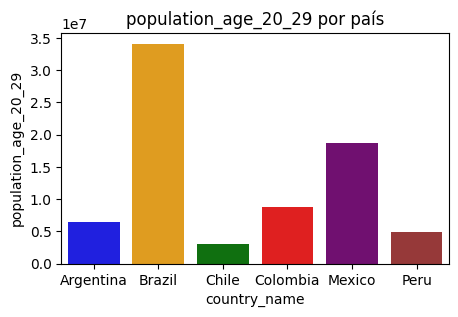

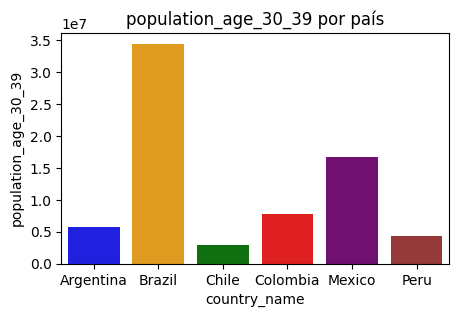

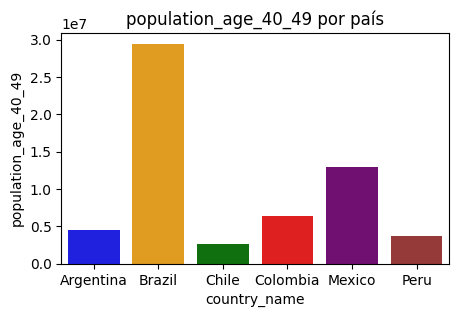

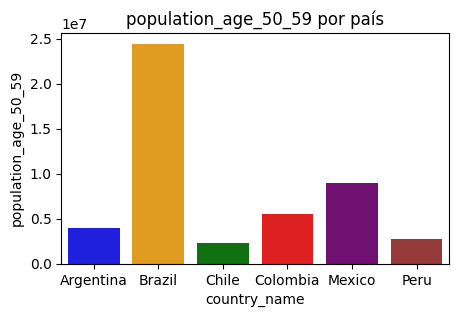

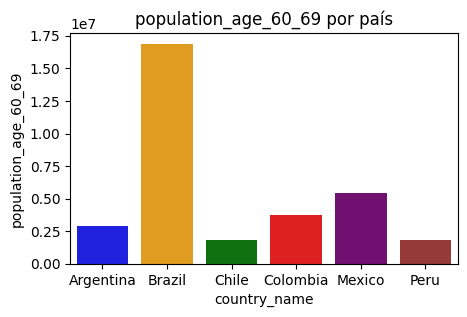

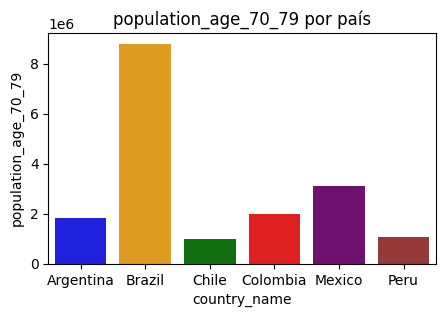

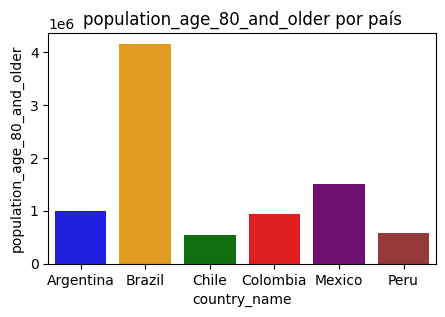

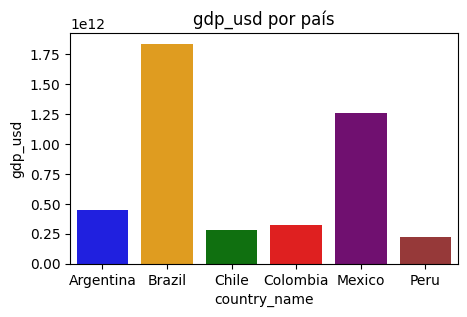

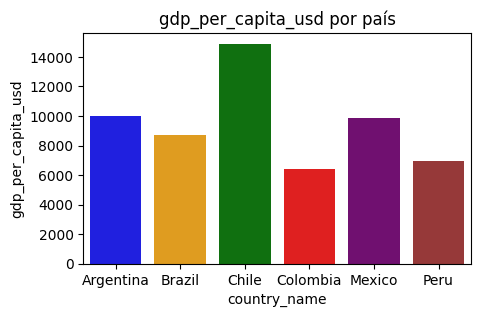

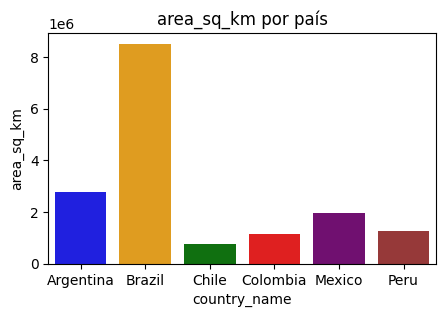

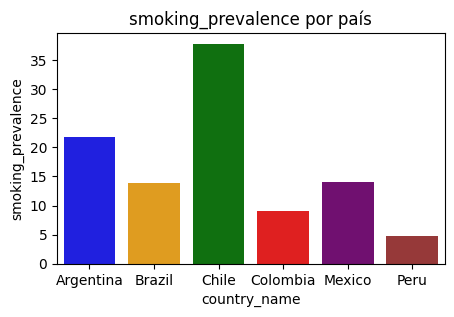

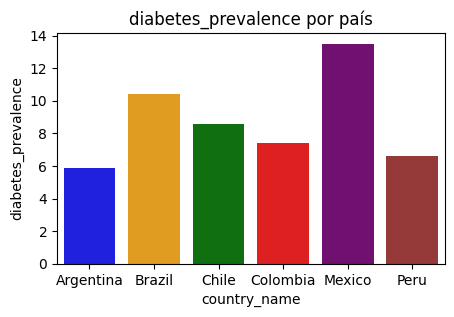

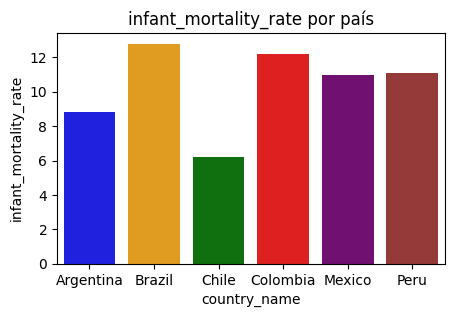

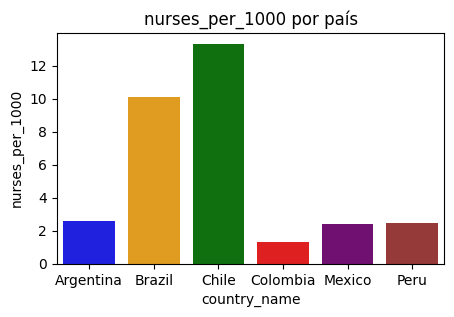

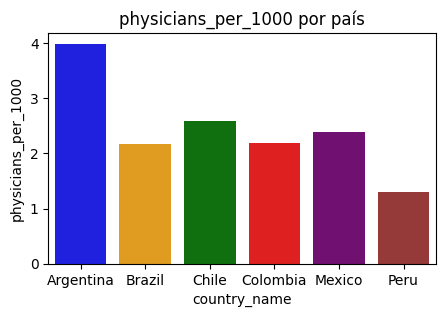

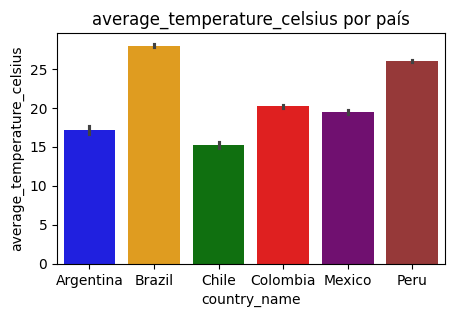

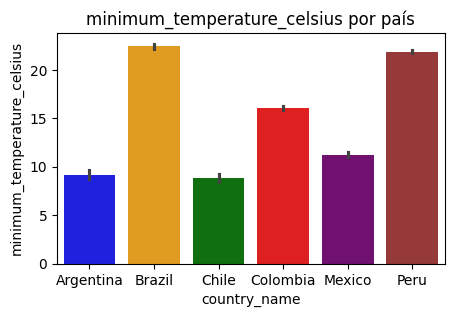

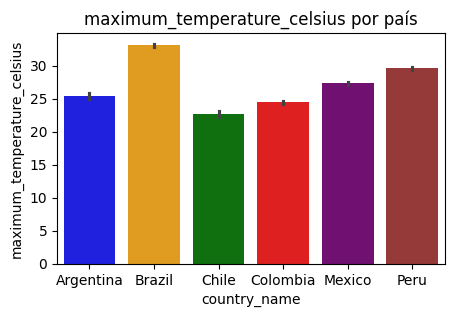

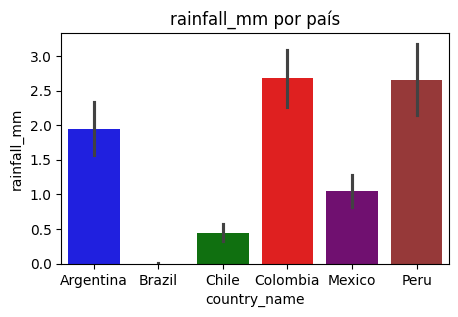

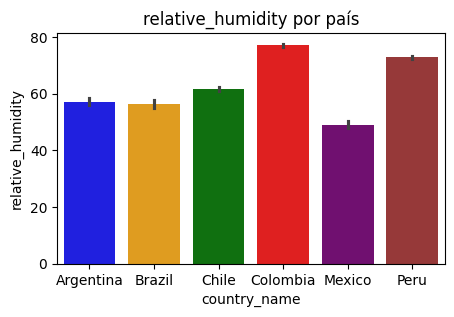

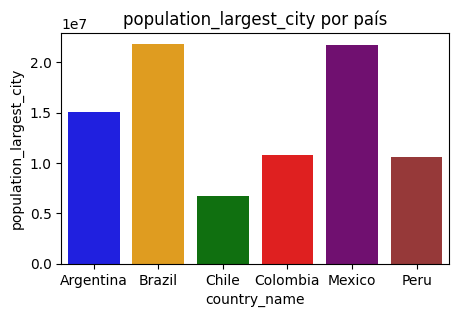

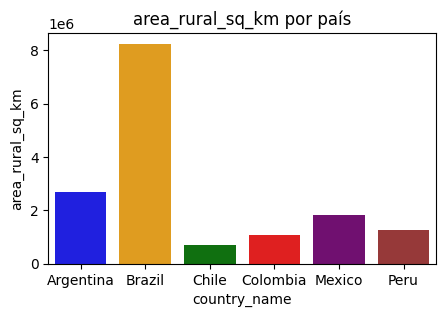

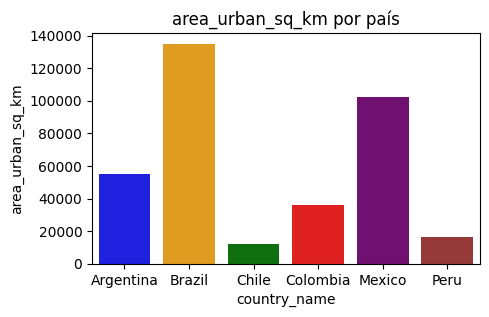

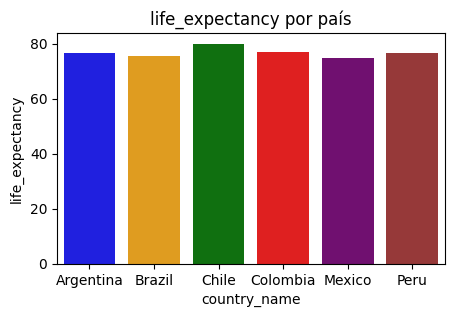

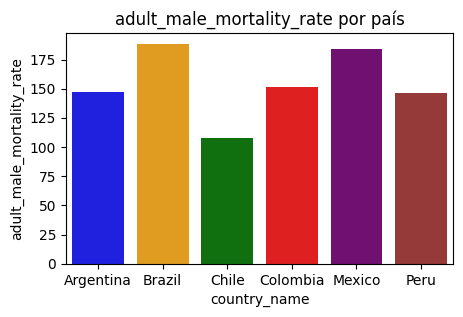

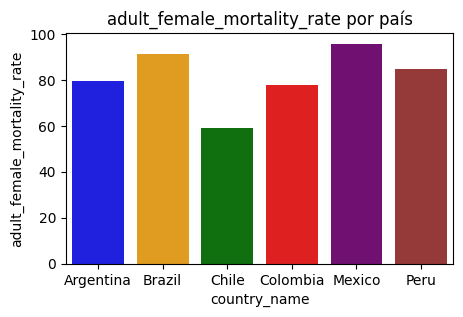

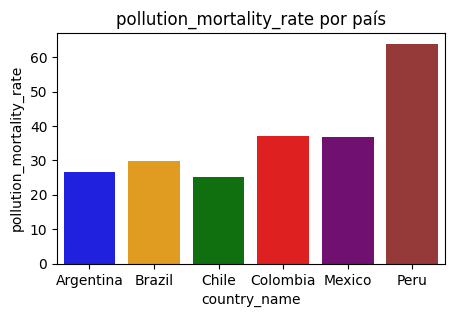

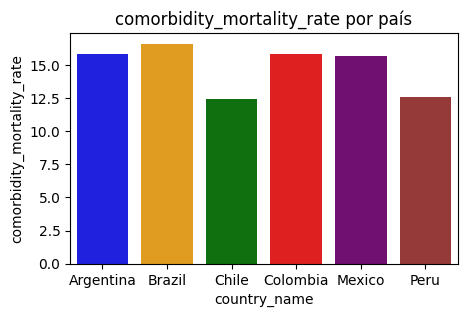

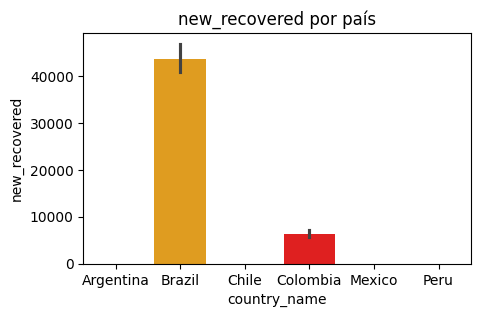

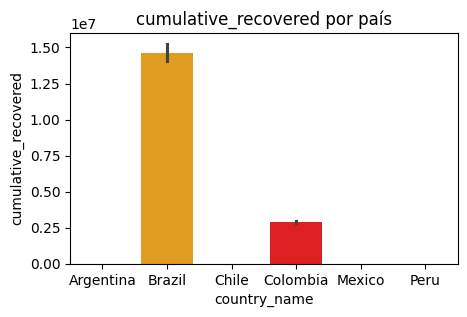

In [44]:
# Diccionario de colores para cada país:
colores = {
    "Argentina": "blue",
    "Chile": "green",
    "Colombia": "red",
    "Mexico": "purple",
    "Peru": "brown",
    "Brazil": "orange"
}

# Creamos una lista de colores basada en el diccionario:
paleta_colores = [colores[pais] for pais in datos_finales['country_name'].unique()]

#bucle for para pasar por cada variable y luego graficar:
for i in datos_finales.columns:
    if i not in ["location_key", "date", "country_code", "country_name", "latitude", "longitude"]:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x="country_name", y=i, data=datos_finales, ax=ax, hue="country_name", palette=colores)
        plt.title(f"{i} por país")
        plt.show()


Observaciones: en lineas generales se puede apreciar que Brasil, muetra una gran cantidad de casos confirmados por ser un pais grande, con mucha poblacion- mexico tambien tiene mucha poblacion y ademas posee mas densidad de poblacion lo que provoca que el virus se disipe con mas frecuencia. Mexico, Peru y Colombia han tenido muchas mas muertes que Argentina, quien que tuvo mas casos confirmados que los anteriores. Podemos aobservar tambien como Chile y Brasil poseen la maoyr cantidad de enfermeros cada 1000 personas. Y notar que solo tenemos para nuestro analsis a Brasil y Colombia en cuanto a los datos de las ultimas 2 graficas.

Creamos a continuación, histogramas de las variables numericas, que tengan cambios de valores, es decir rangos condiderables:
tener en cuenta aca, que a diferencia de las graficas anteriores, no estamos separando por pais, sino se anaizará en relacion al conjunto de datos en total, con todos los paises incluidos de nuestro estudio. Estamos evaluando la frecuencia con la que se repiten los valores dentro del rango de cada variable(columna):

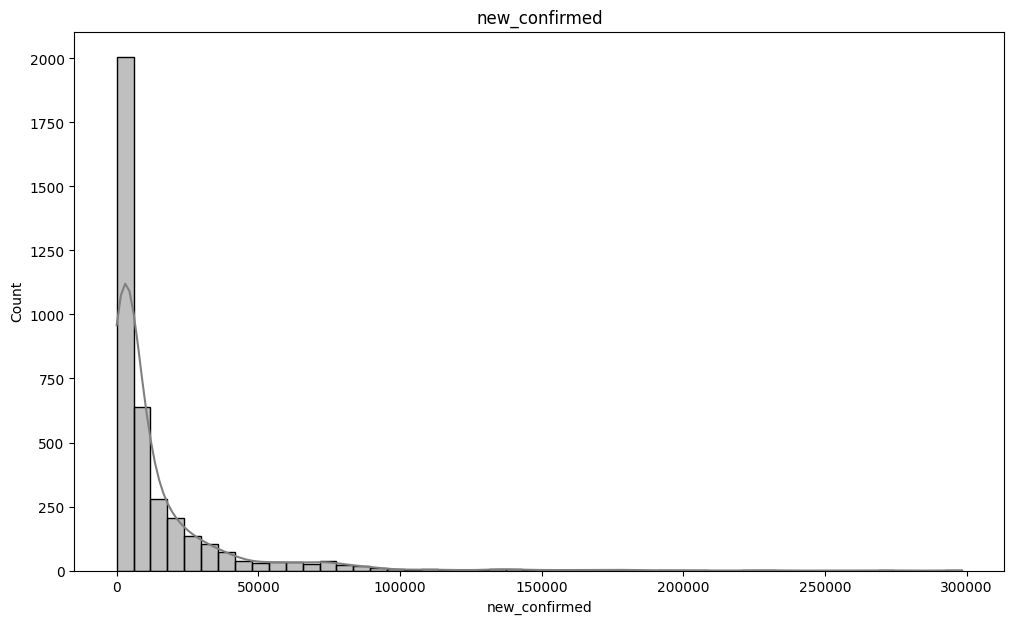

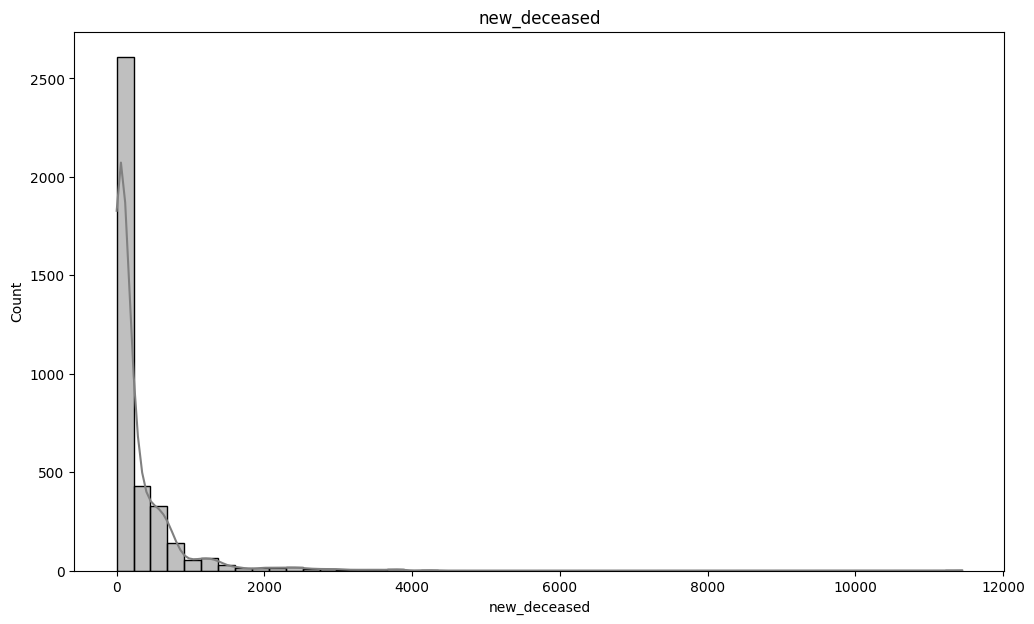

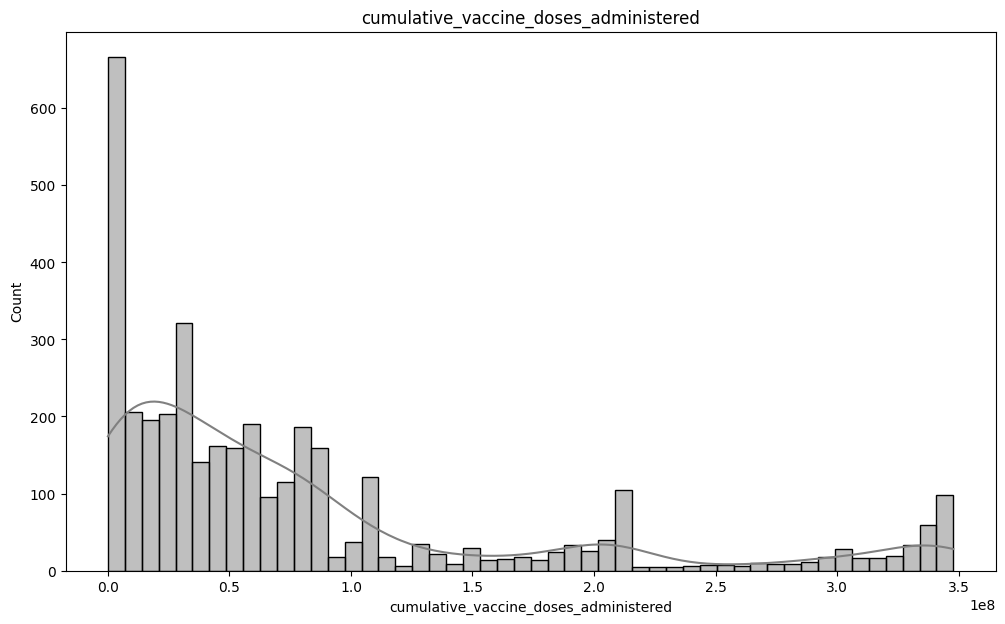

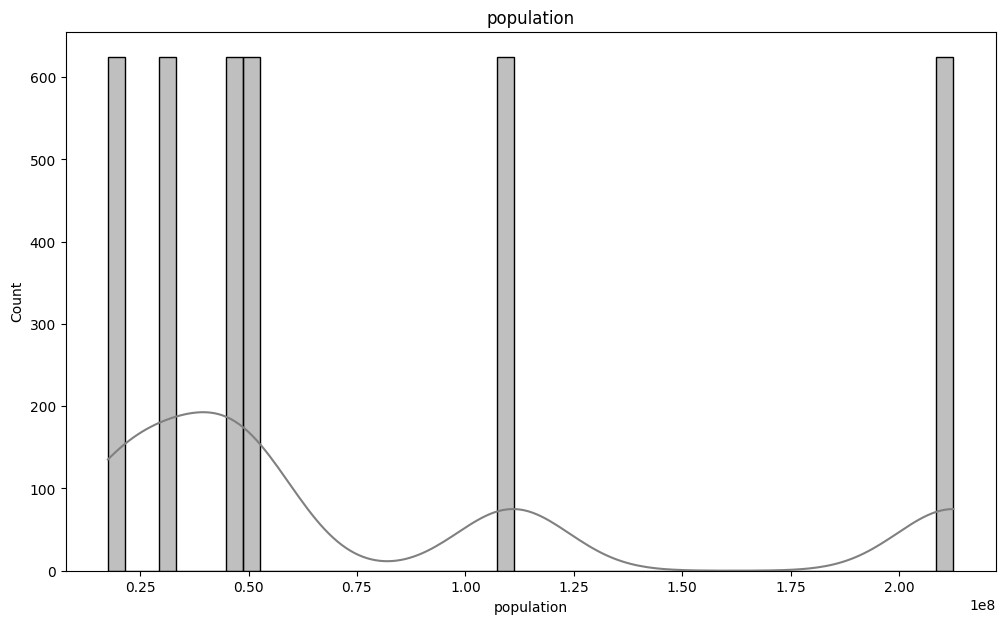

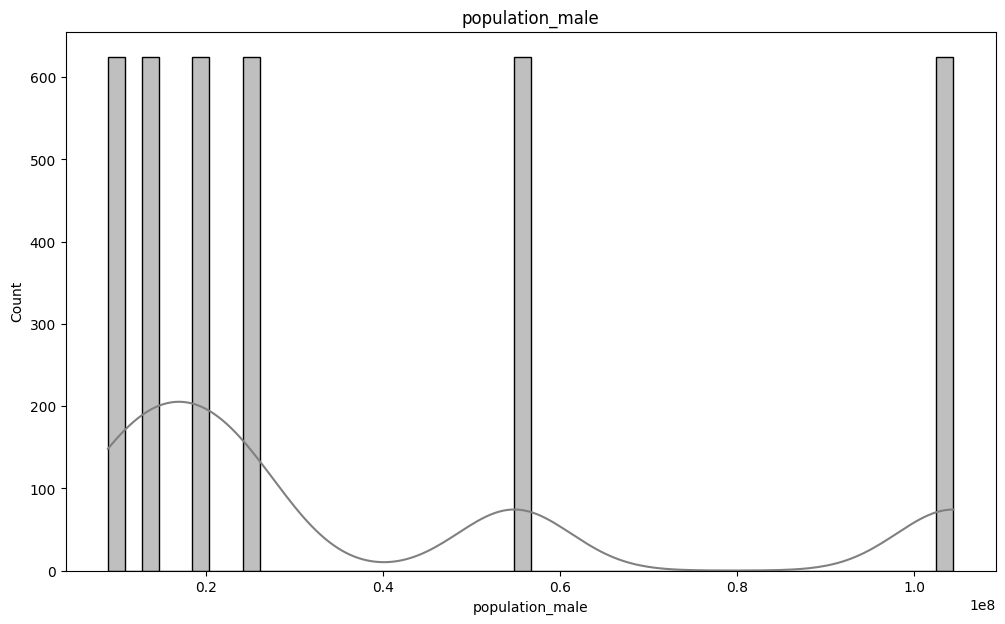

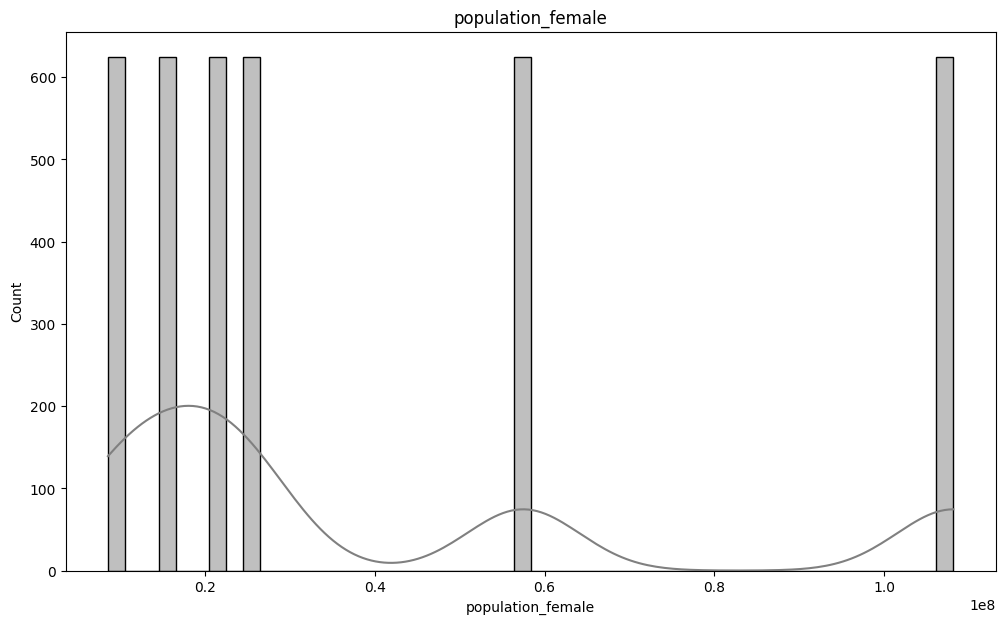

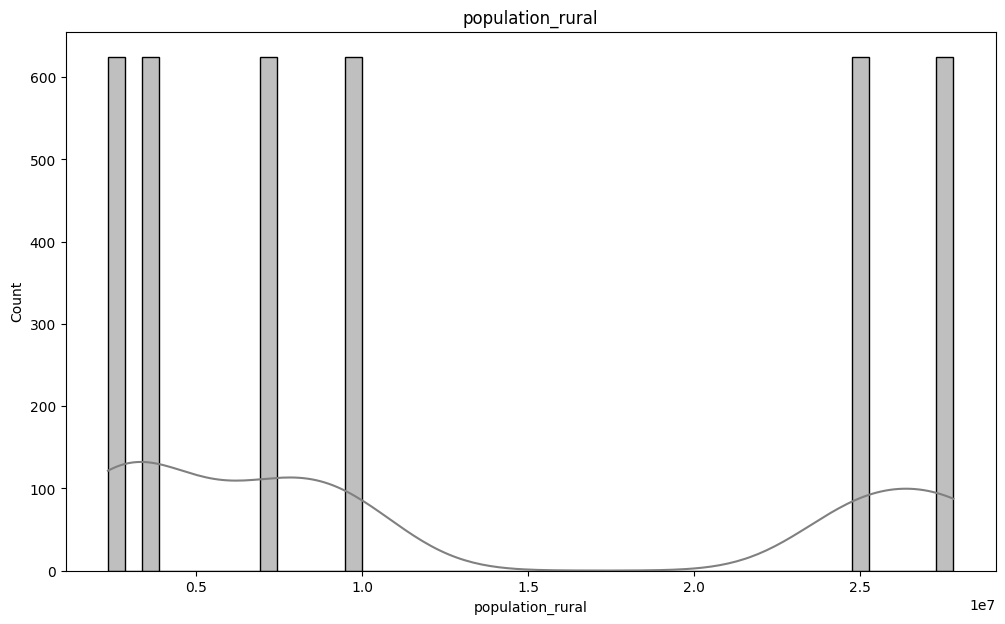

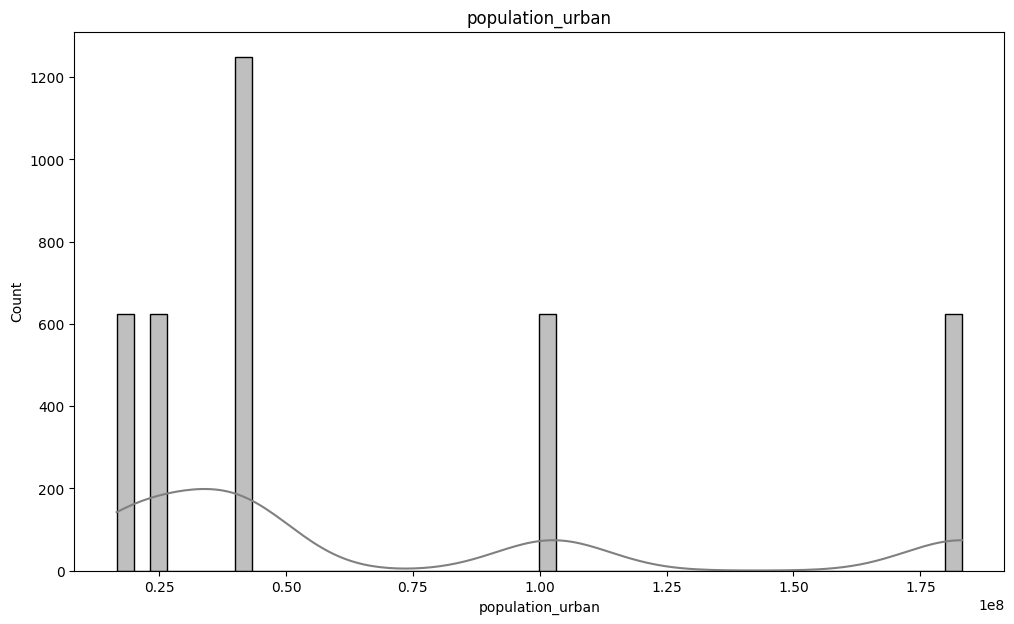

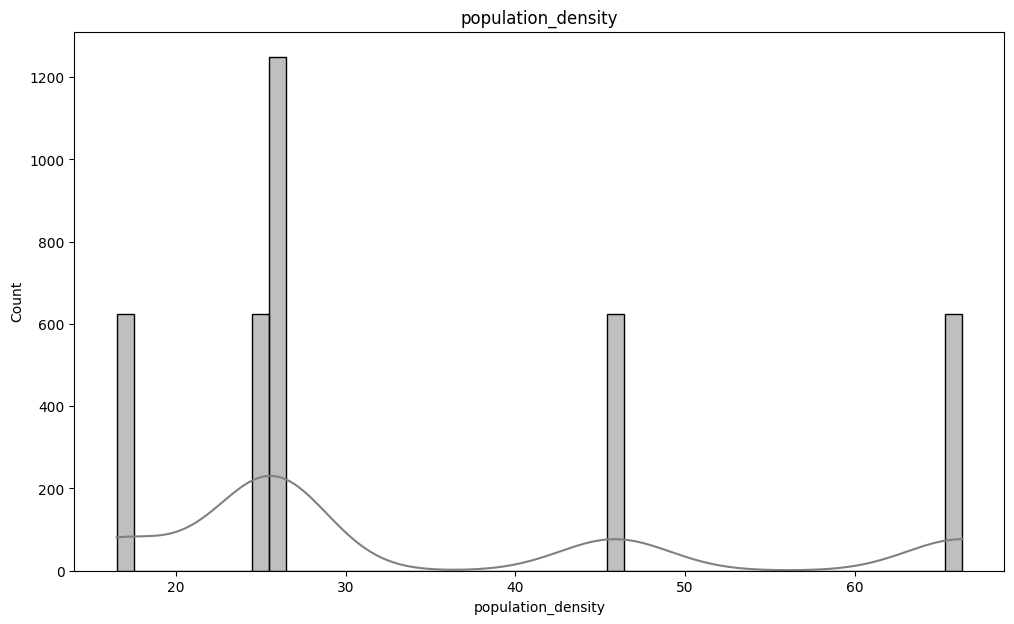

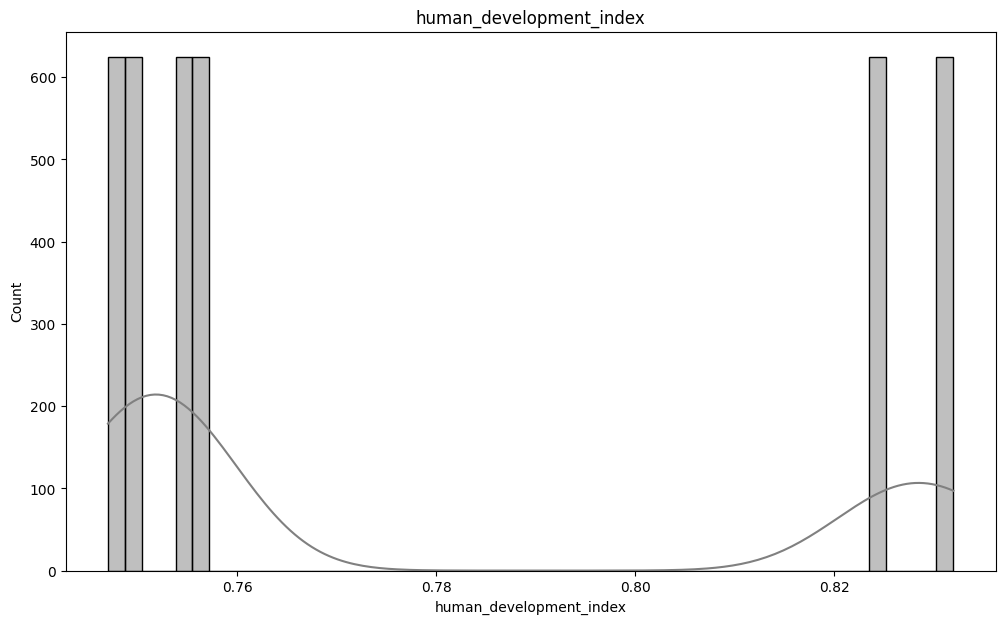

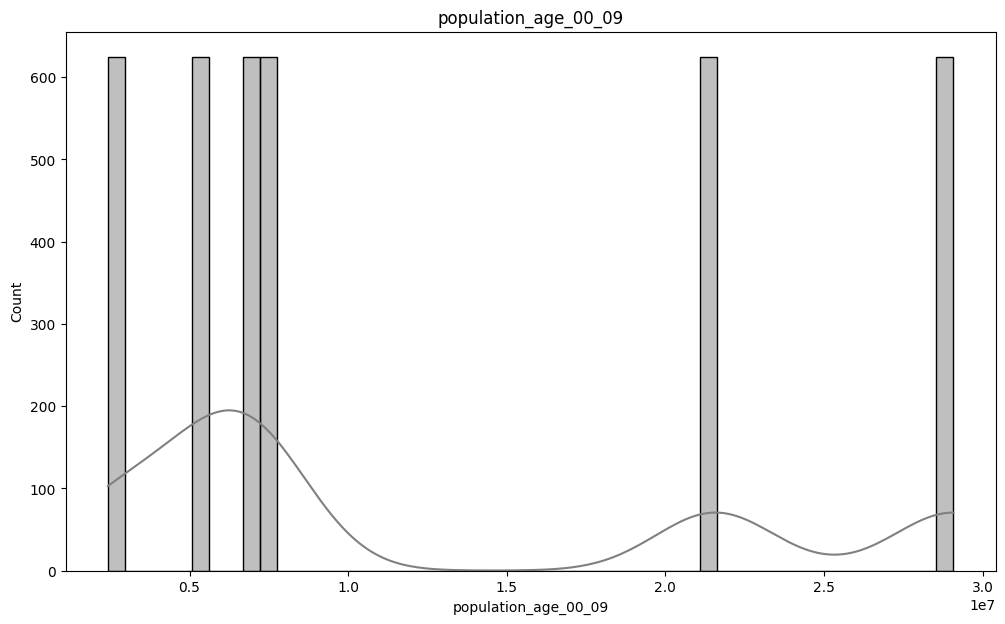

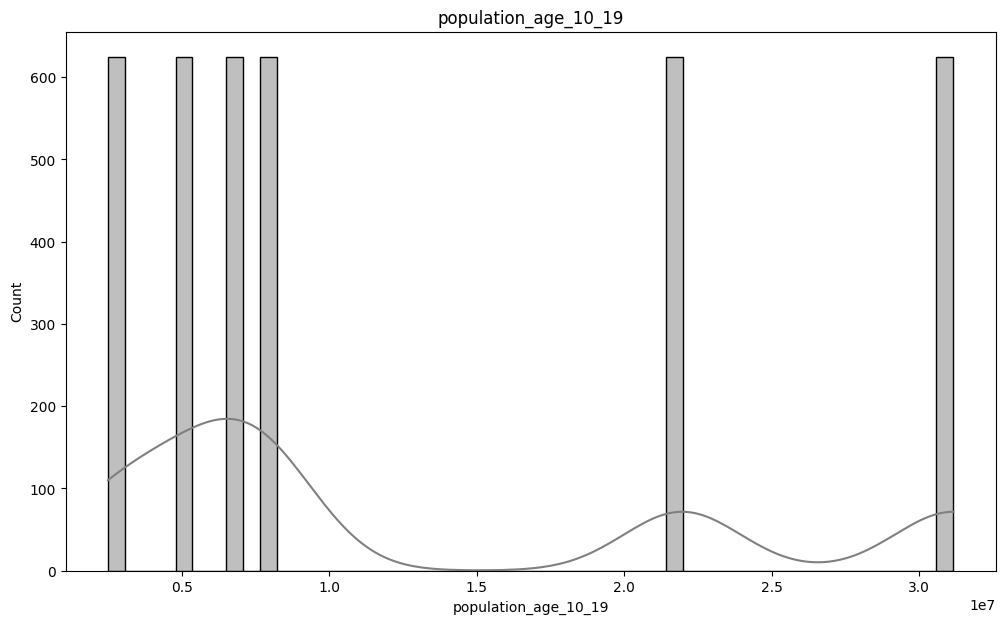

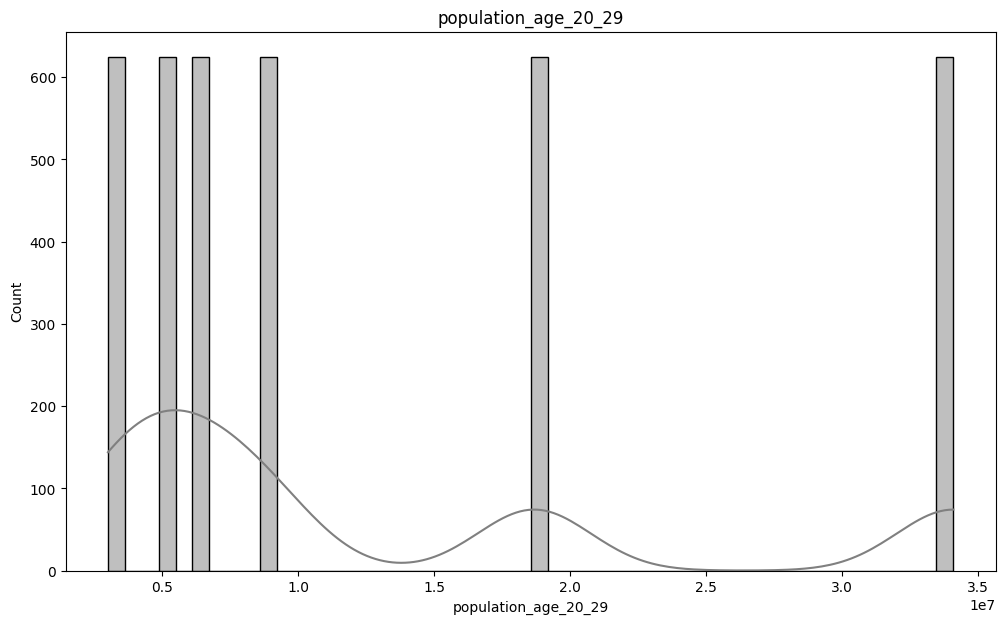

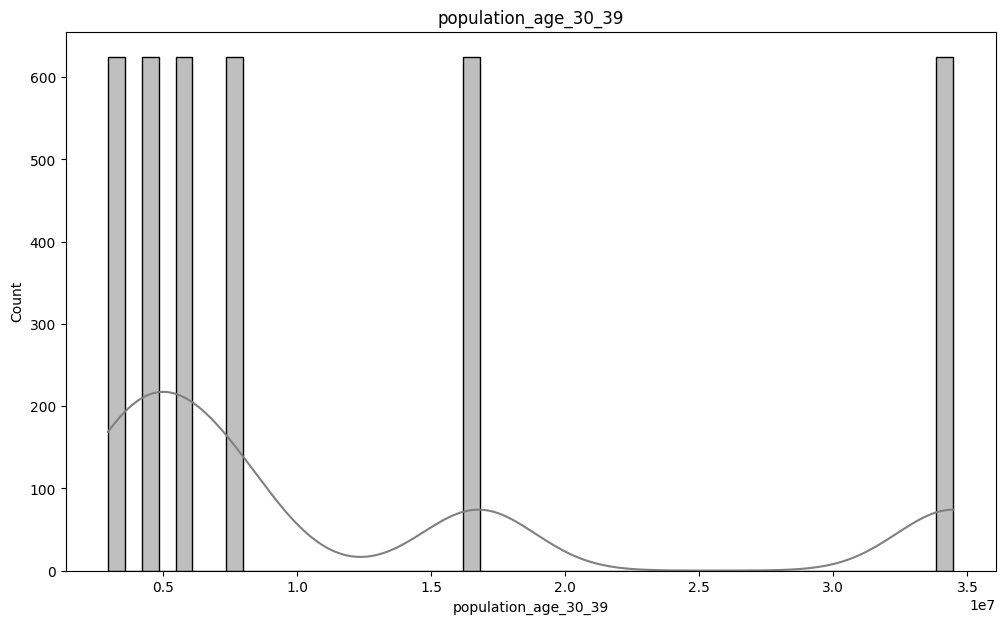

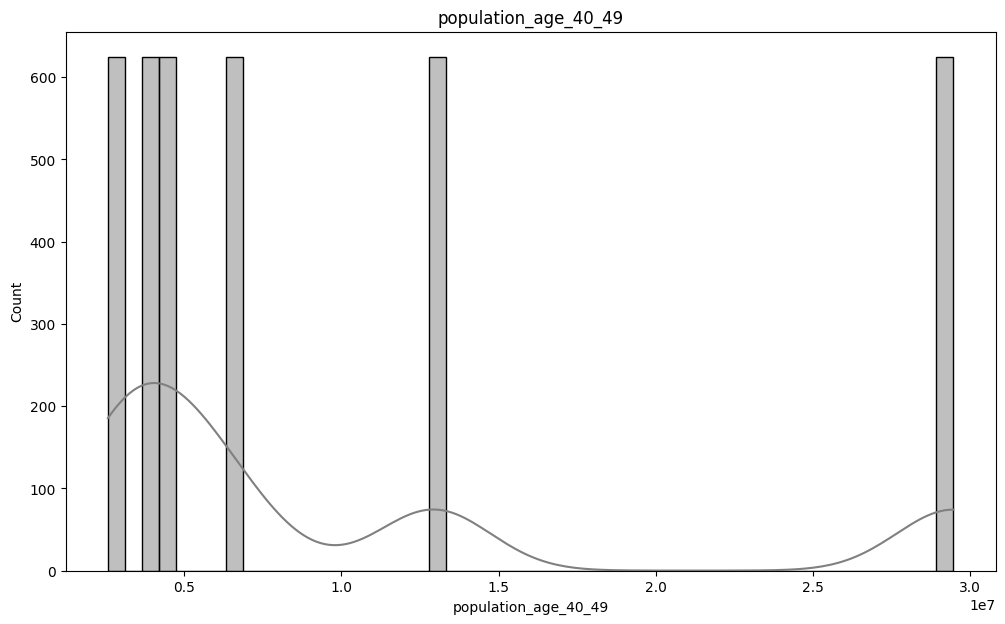

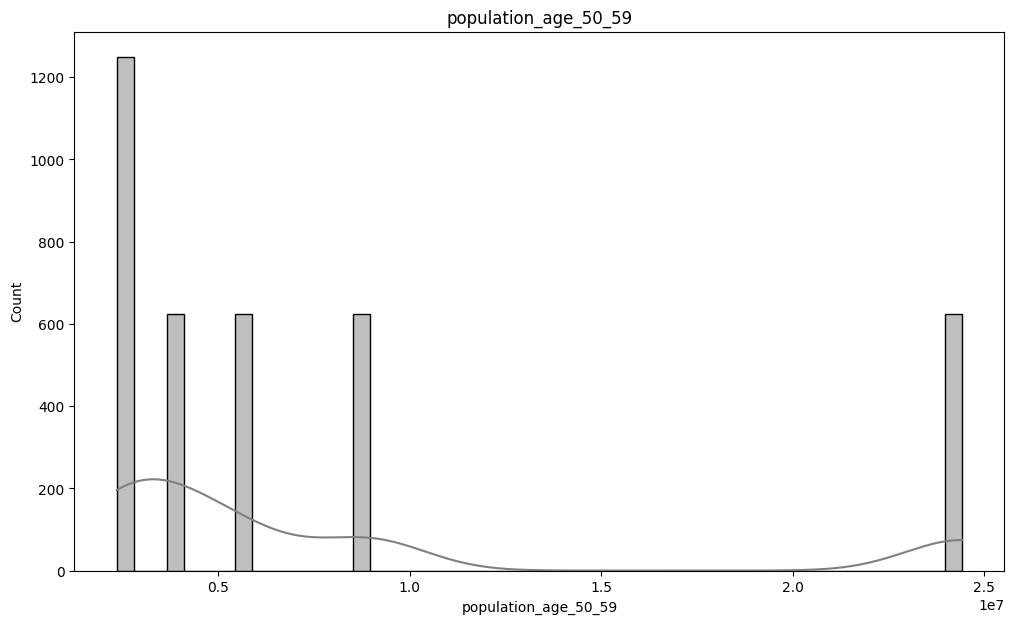

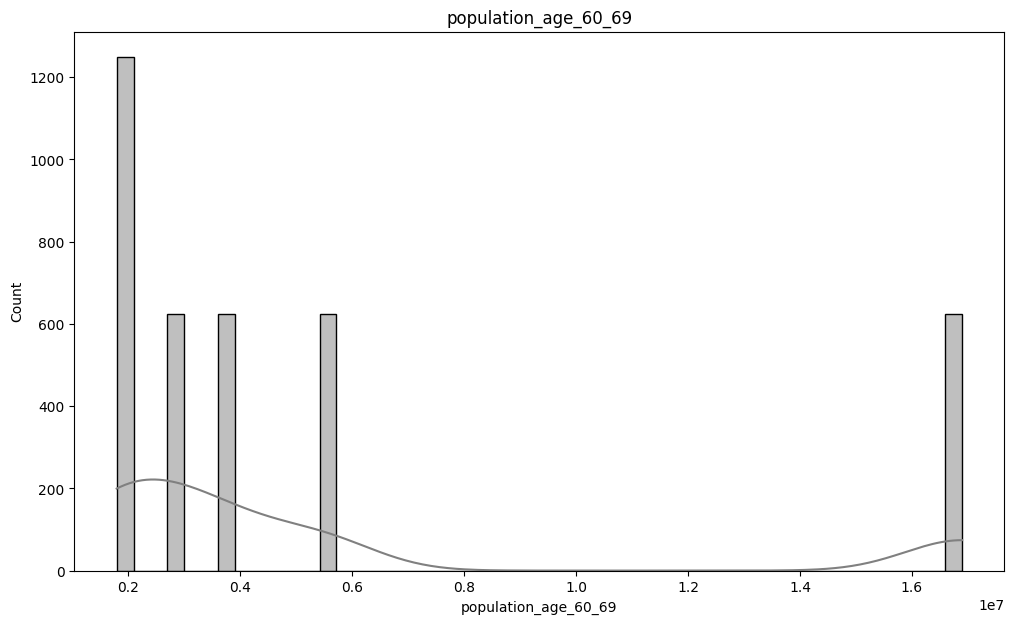

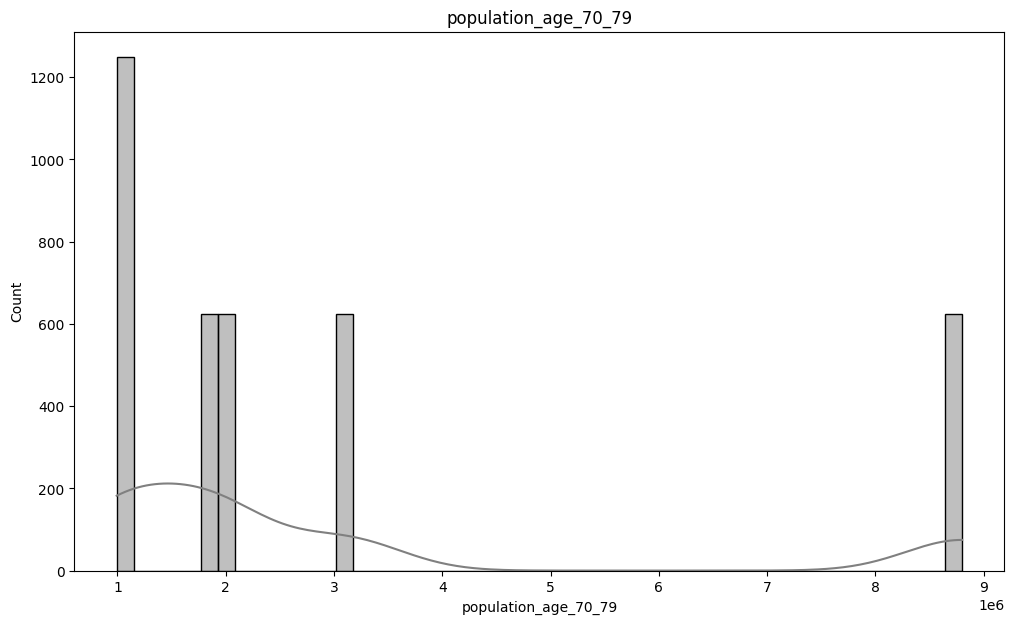

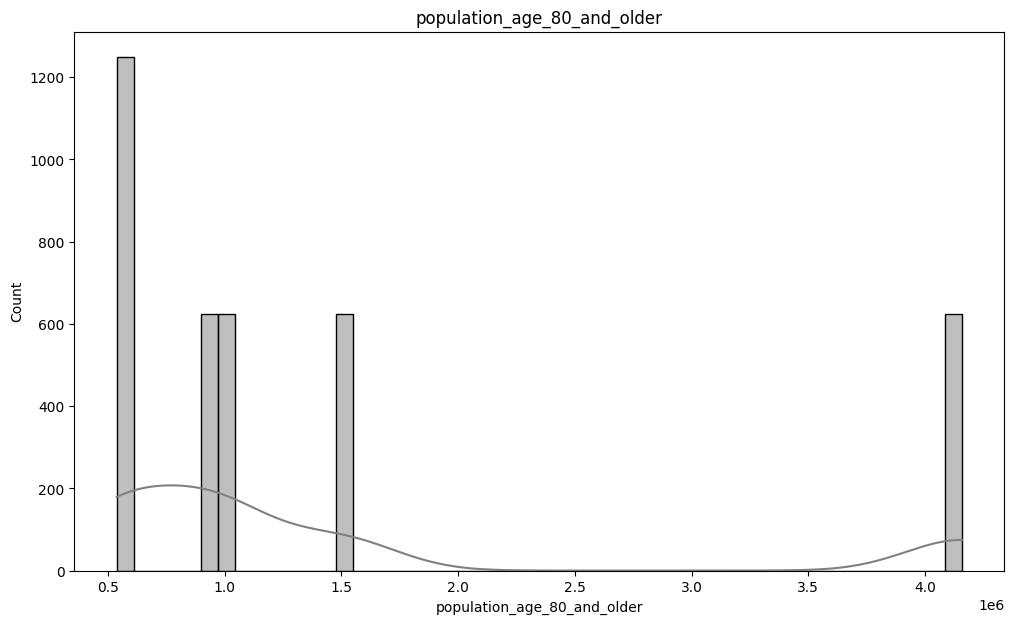

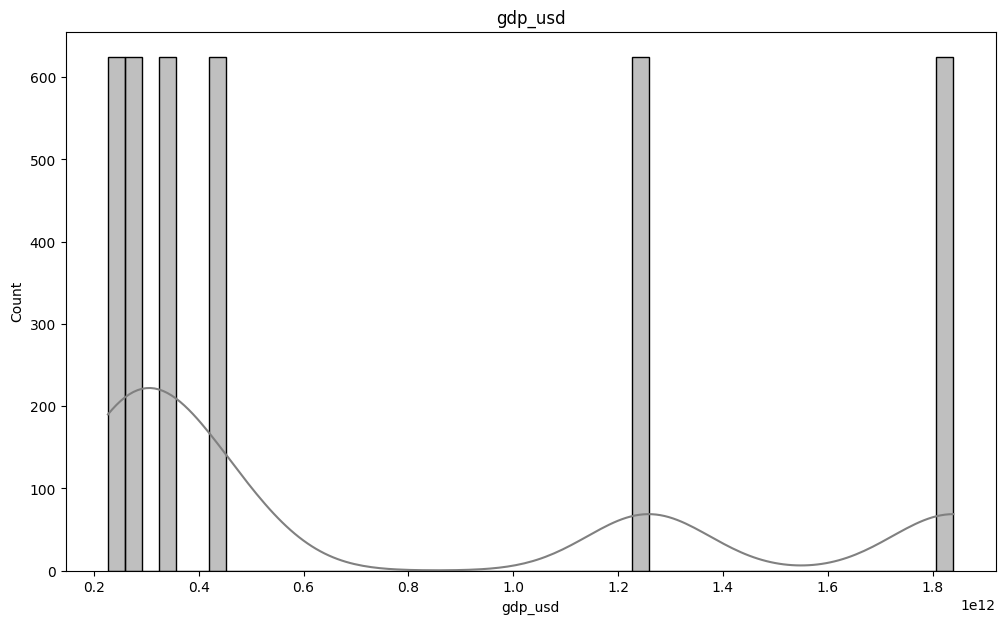

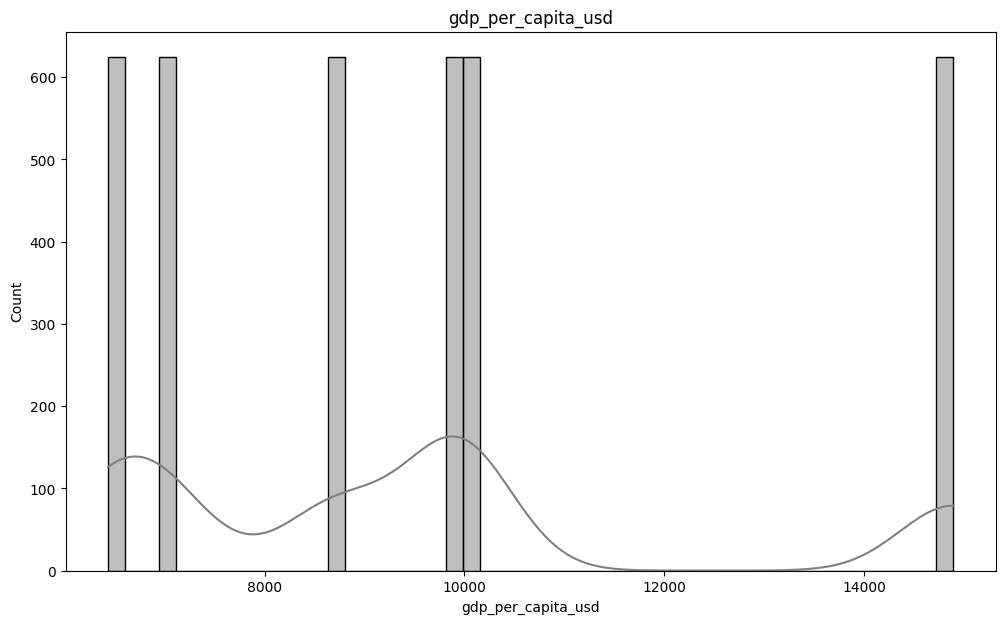

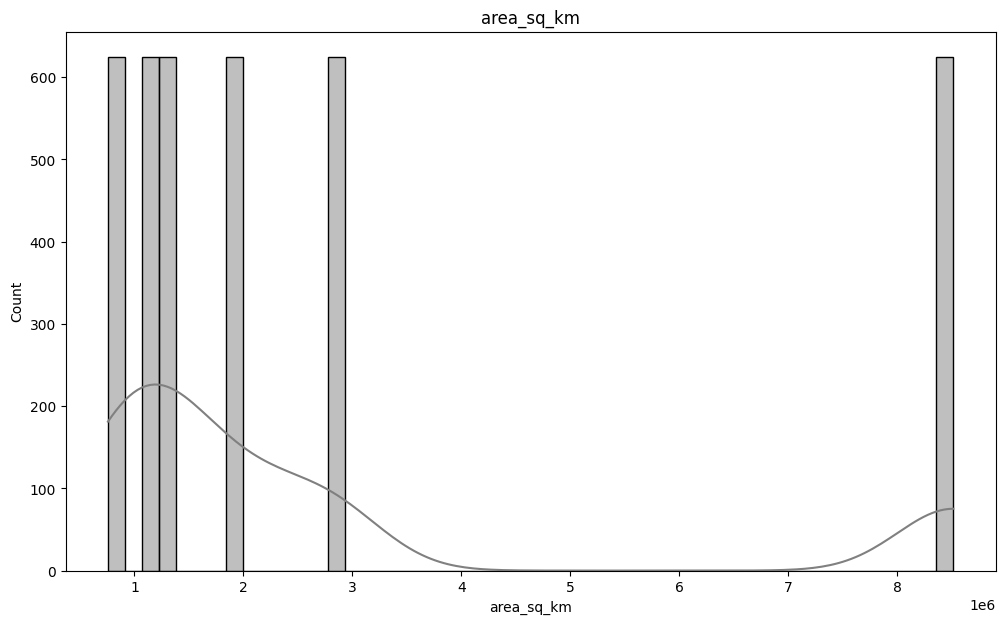

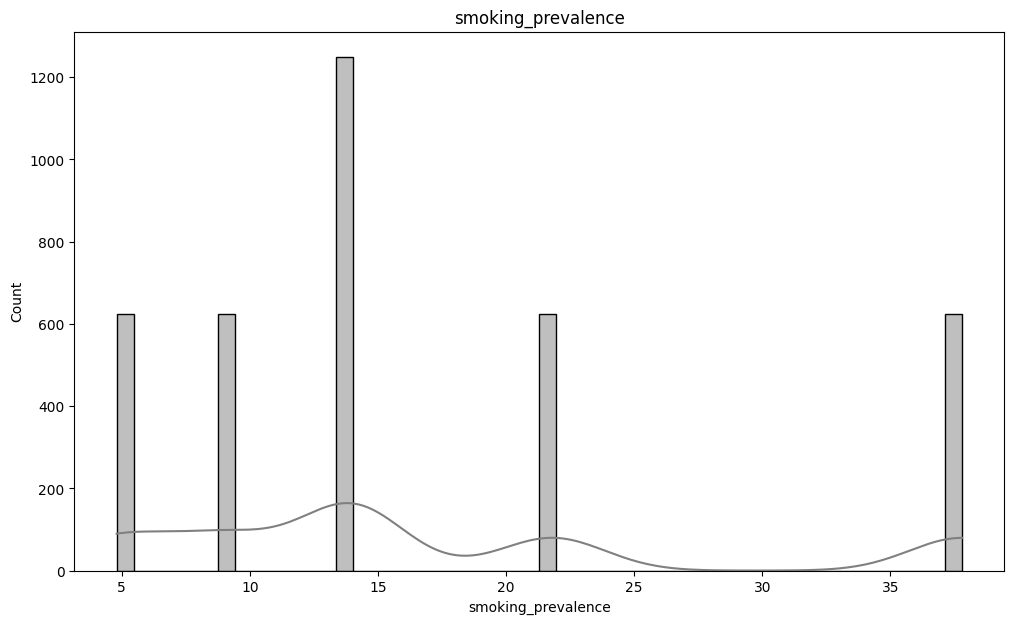

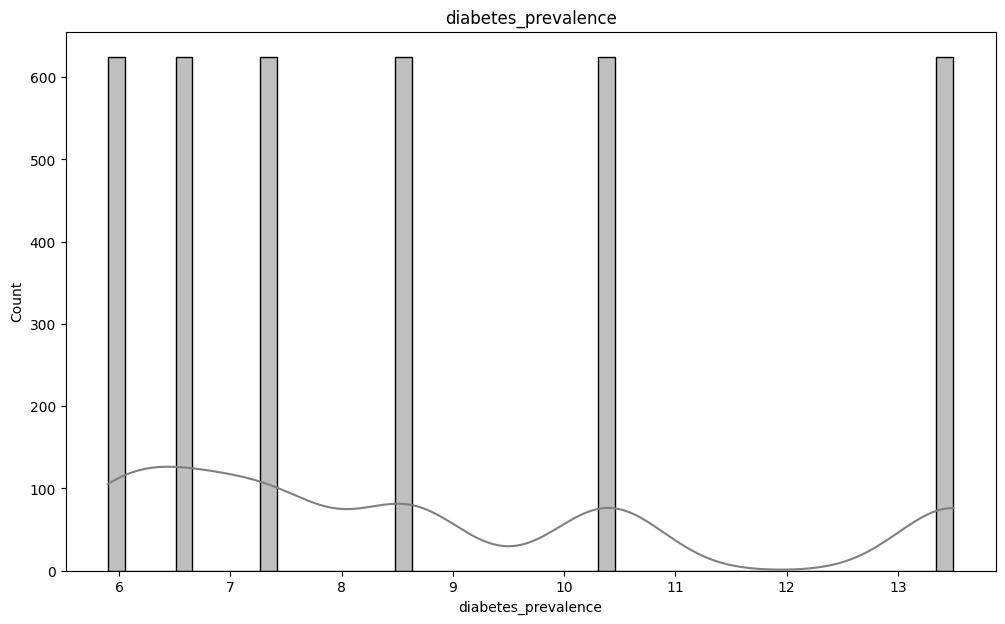

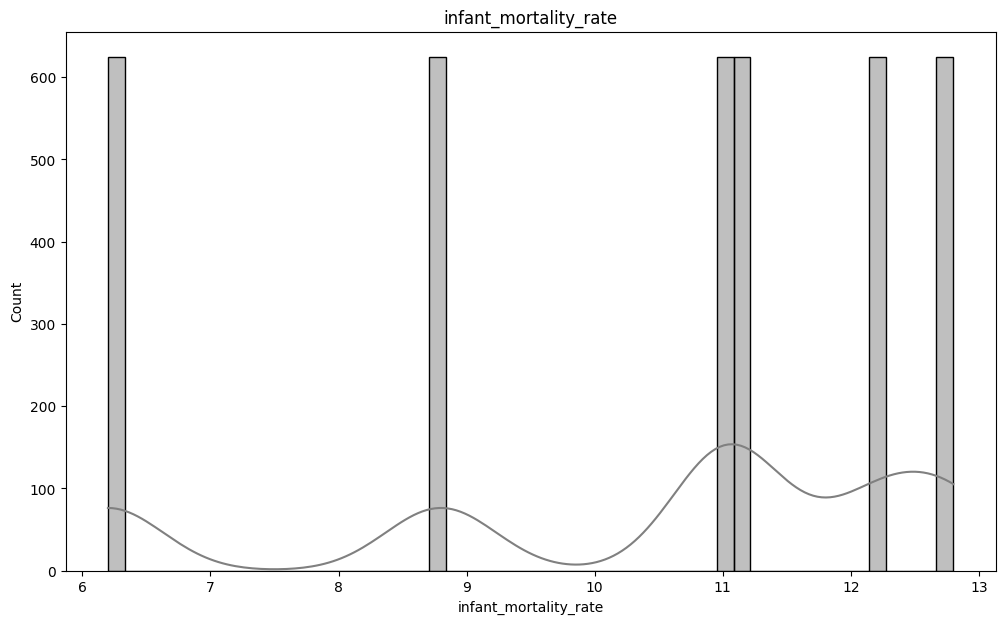

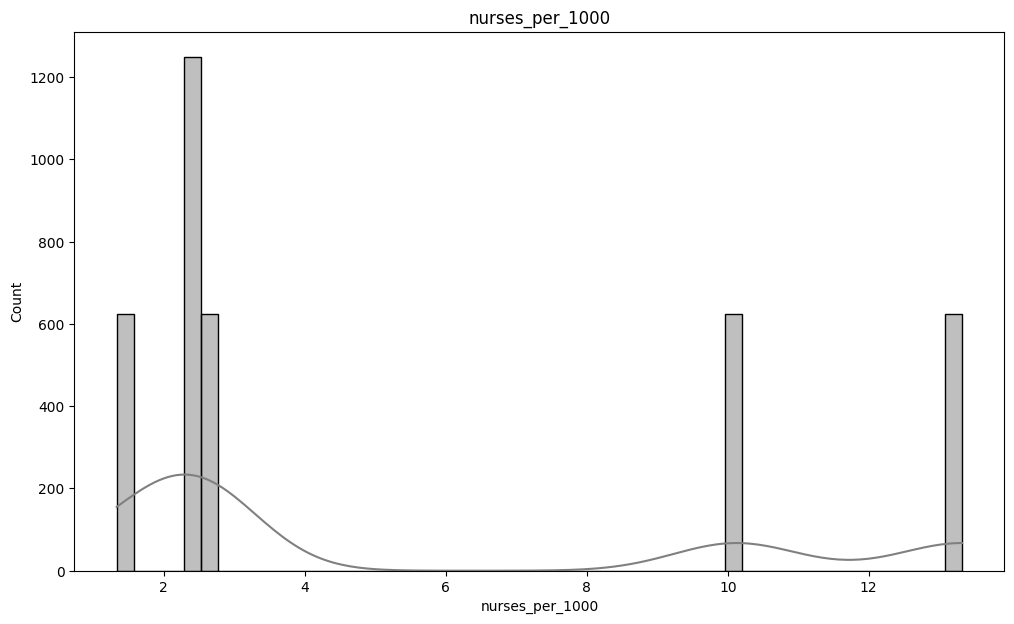

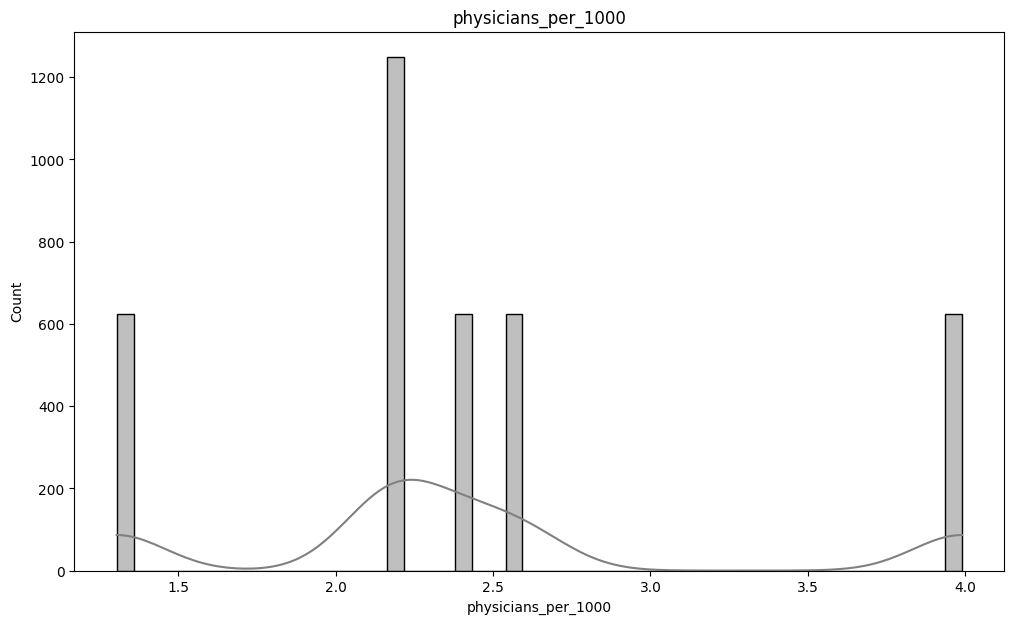

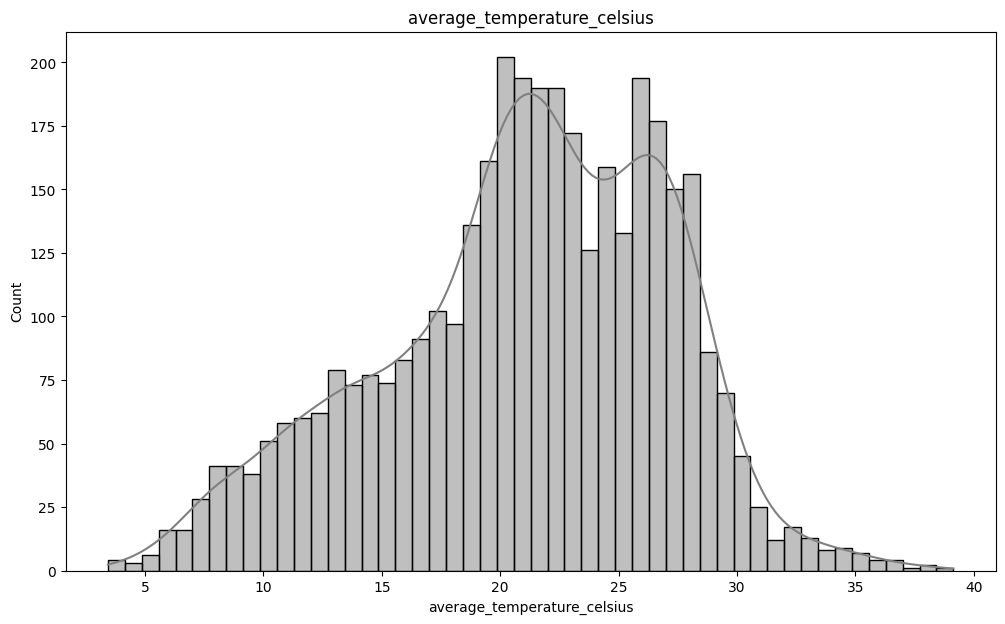

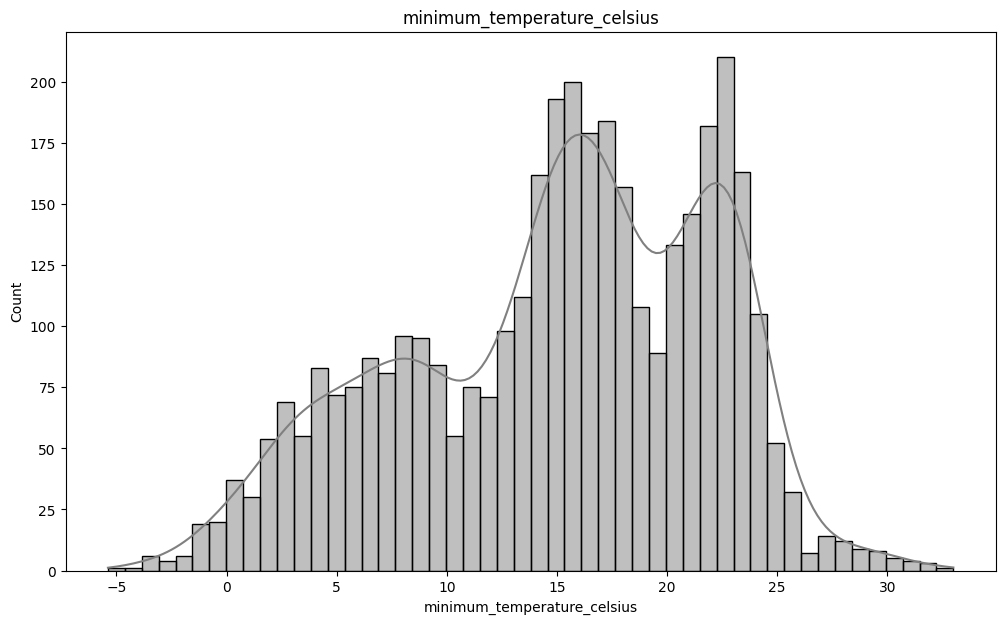

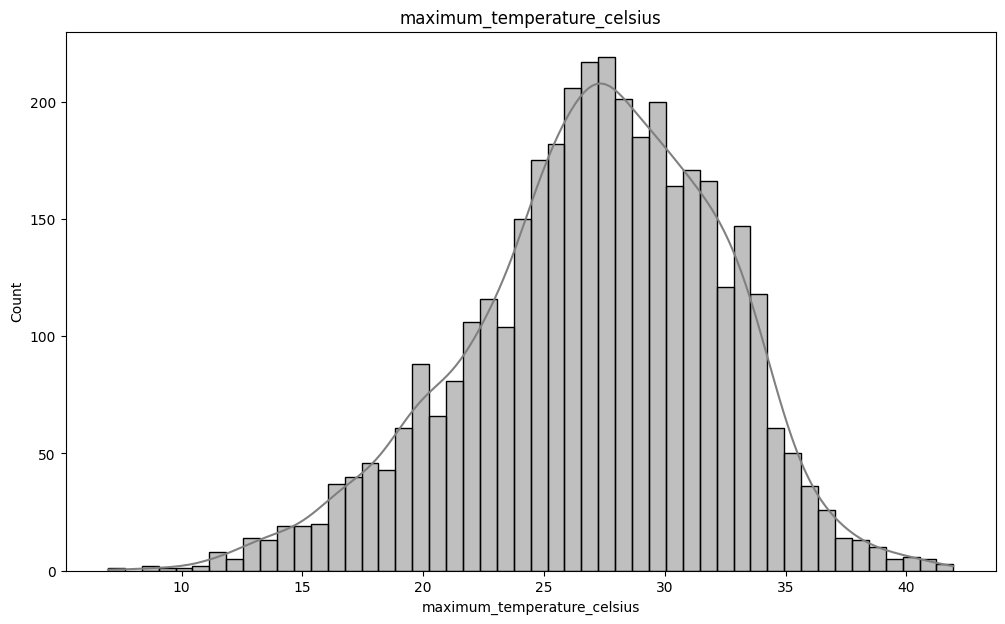

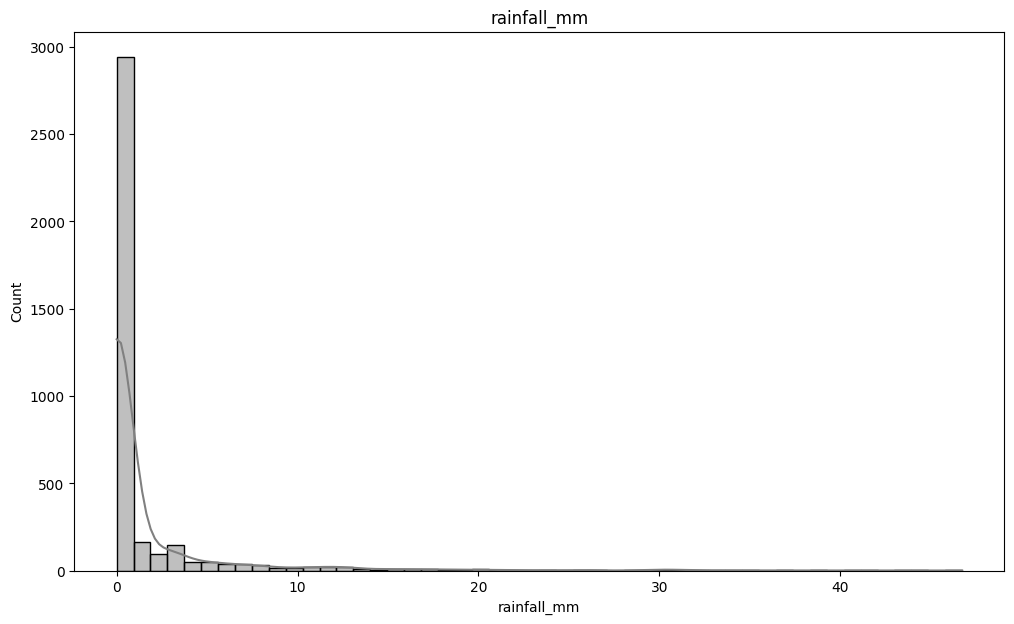

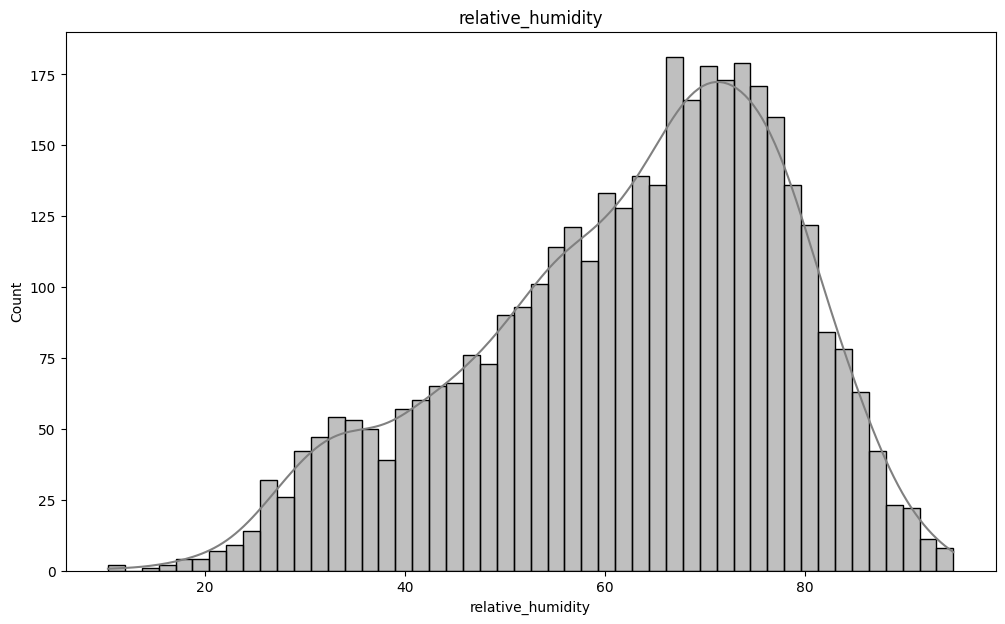

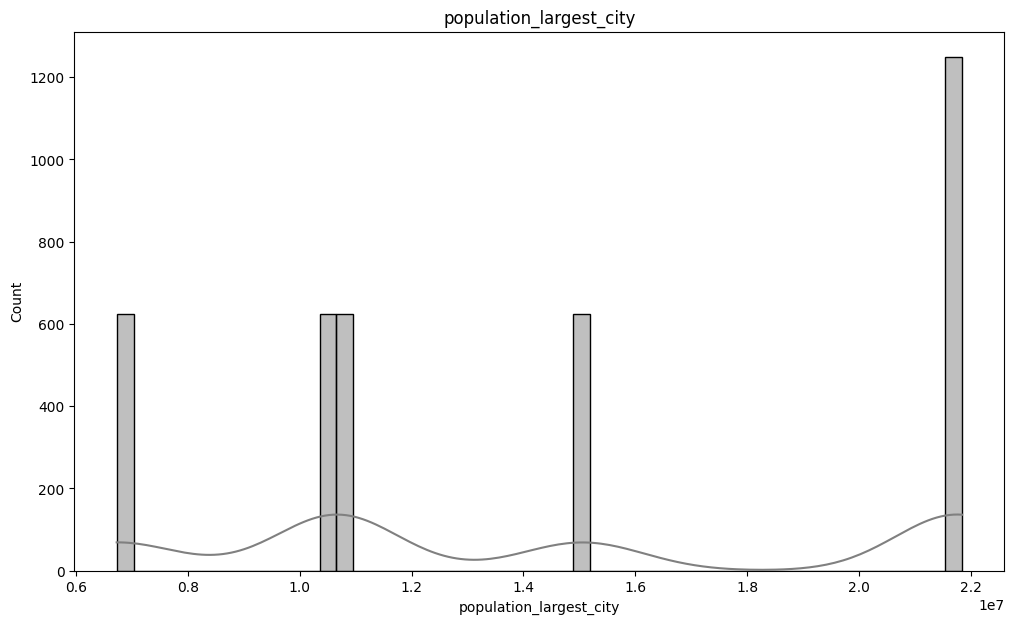

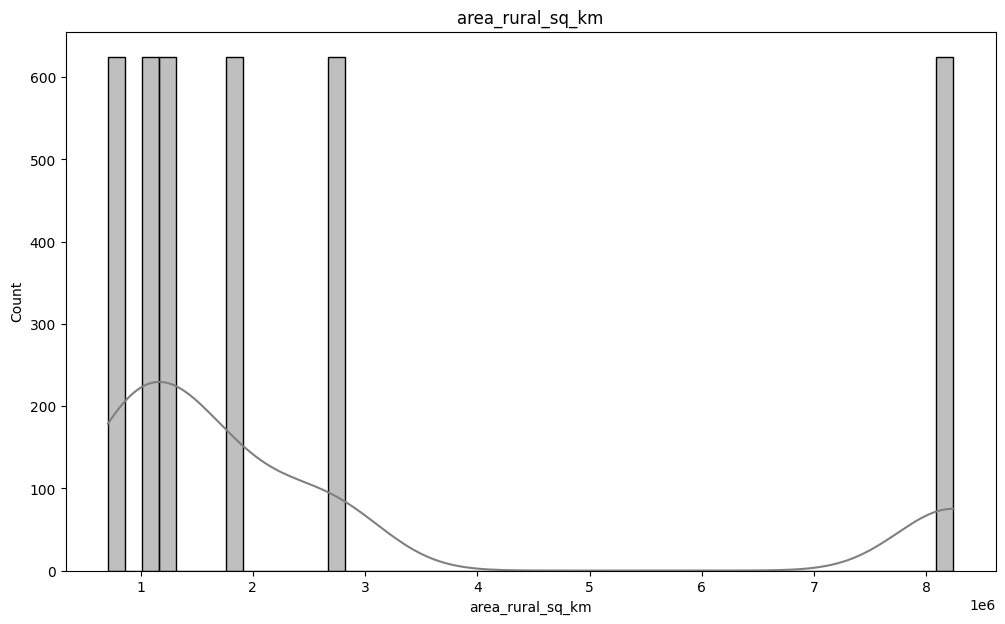

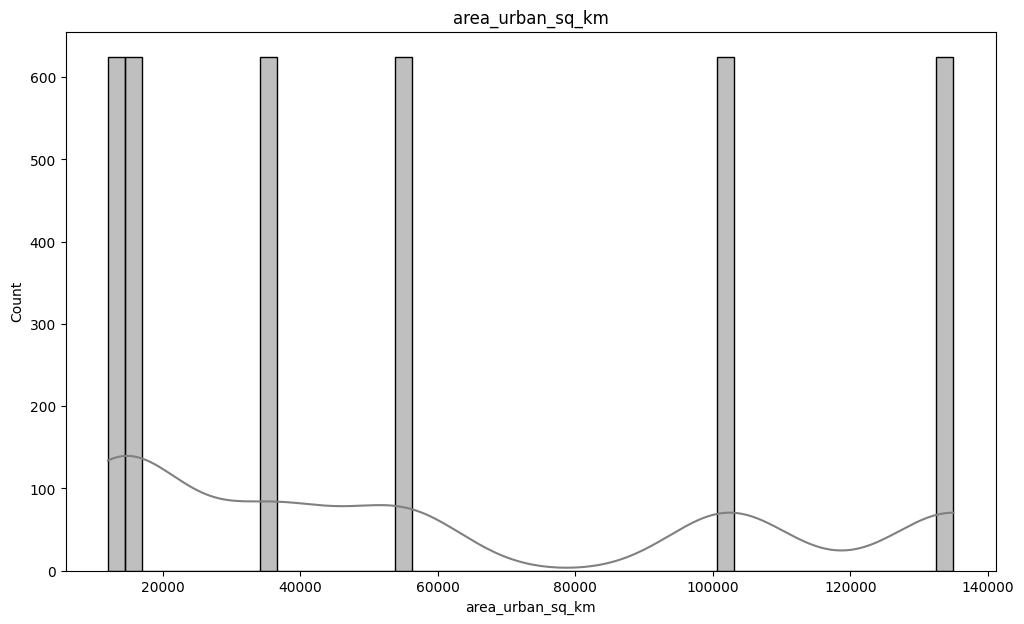

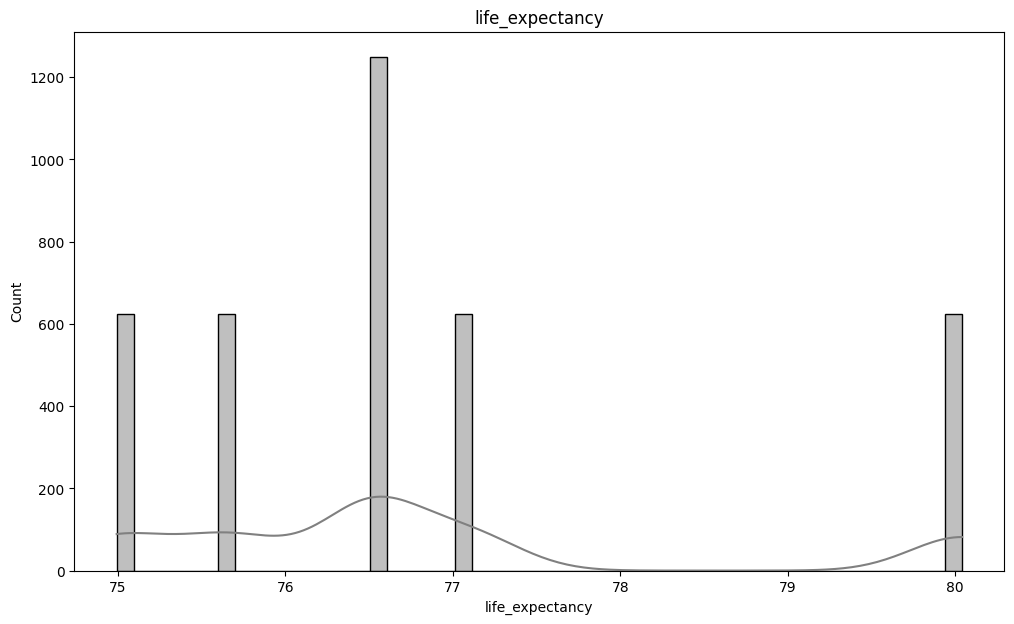

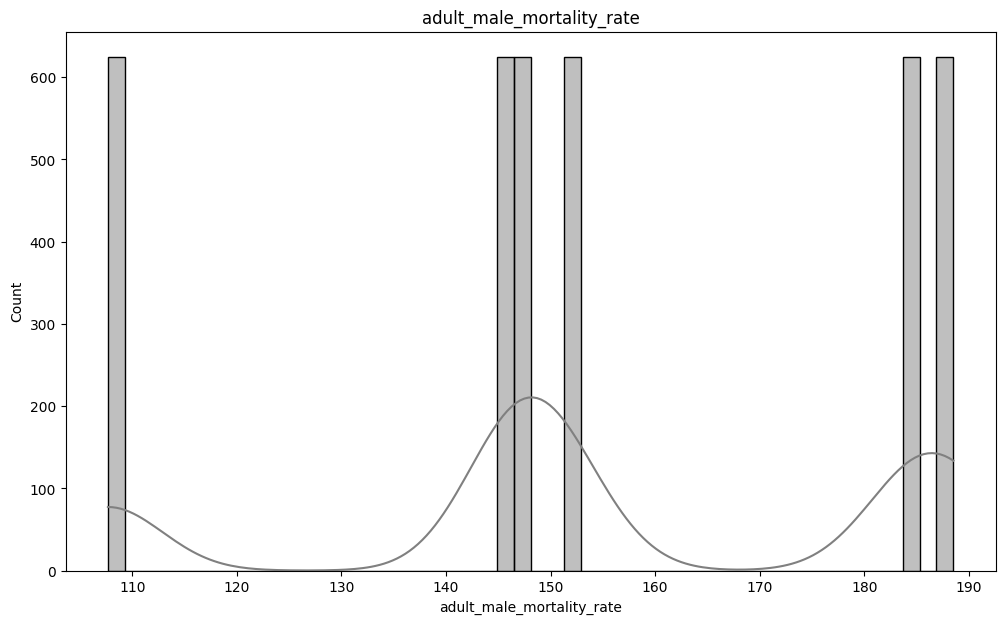

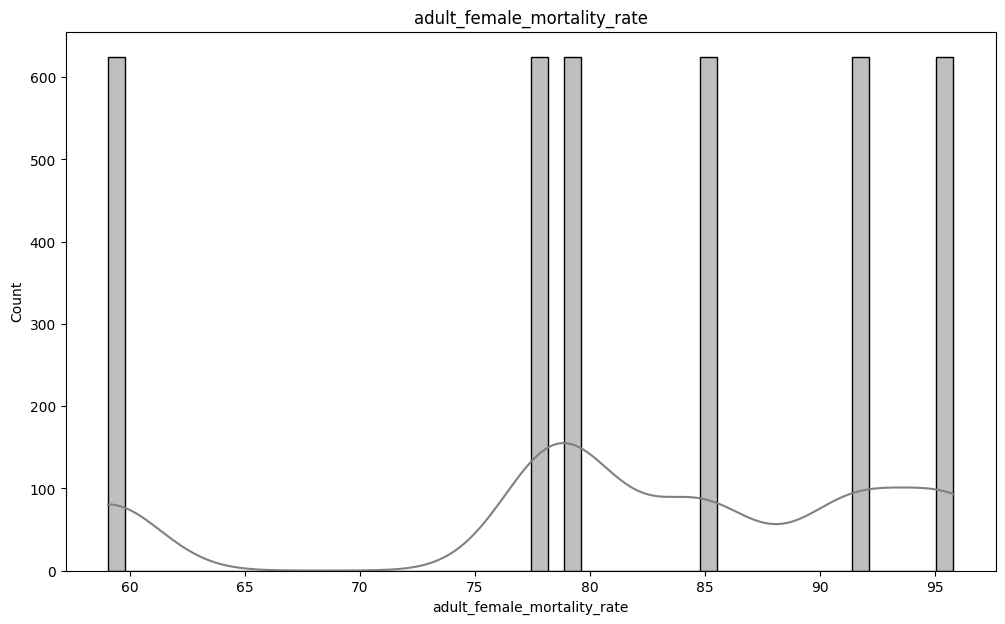

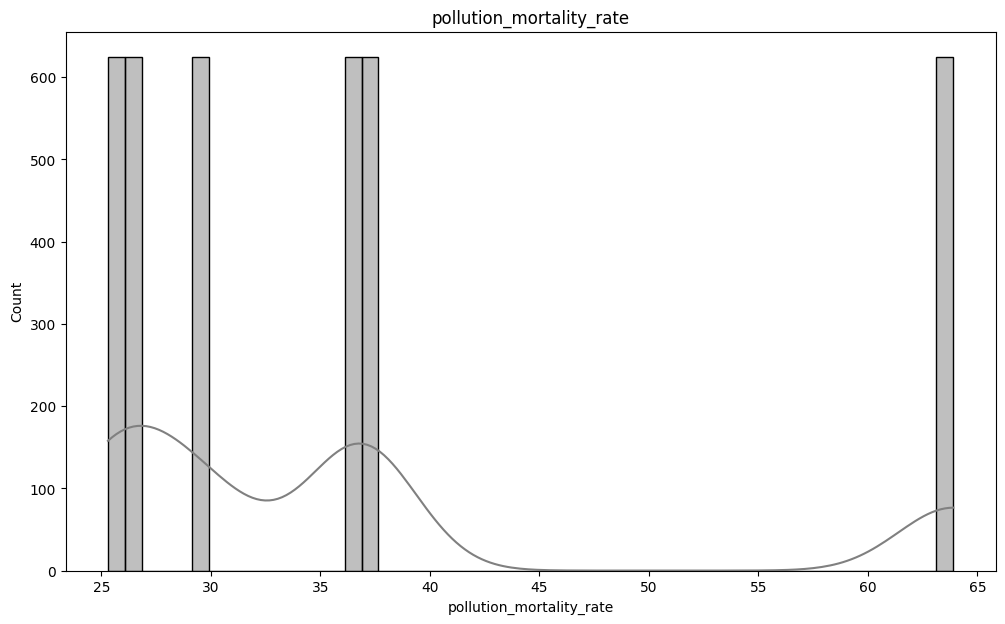

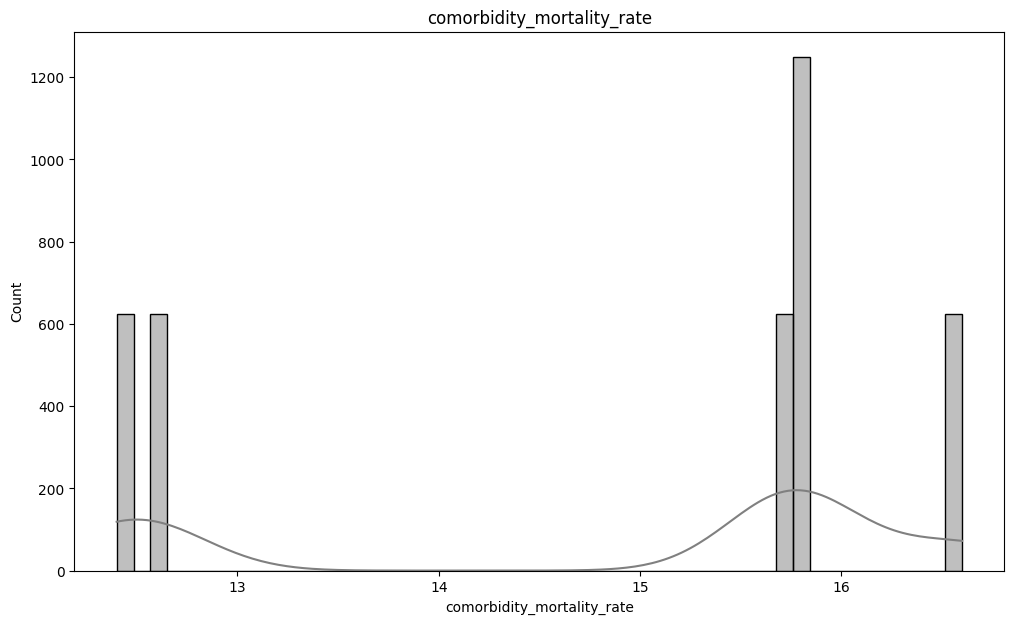

In [45]:
for i in datos_finales.columns:
    if i not in ["location_key", "date", "country_code", "country_name", "latitude", "longitude", "cumulative_confirmed", "cumulative_deceased", 
                 "cumulative_recovered", "cumulative_vaccine_doses_administred", "new_recovered"]:
        fig, ax = plt.subplots(figsize=(12,7))
        sns.histplot(x=datos_finales[i], kde=True, color="gray", bins=50)
        plt.title(i)
        plt.show()

observaciones: en mcuhos casos cada barra corresponde a un pais, podemos ver el amplio rango de datos que estamos manejando y su variabilidad.

Pasamos a crear un diagrama de dispersion de la temperatura media contra los casos confirmados y muertes confirmadas:

<function matplotlib.pyplot.show(close=None, block=None)>

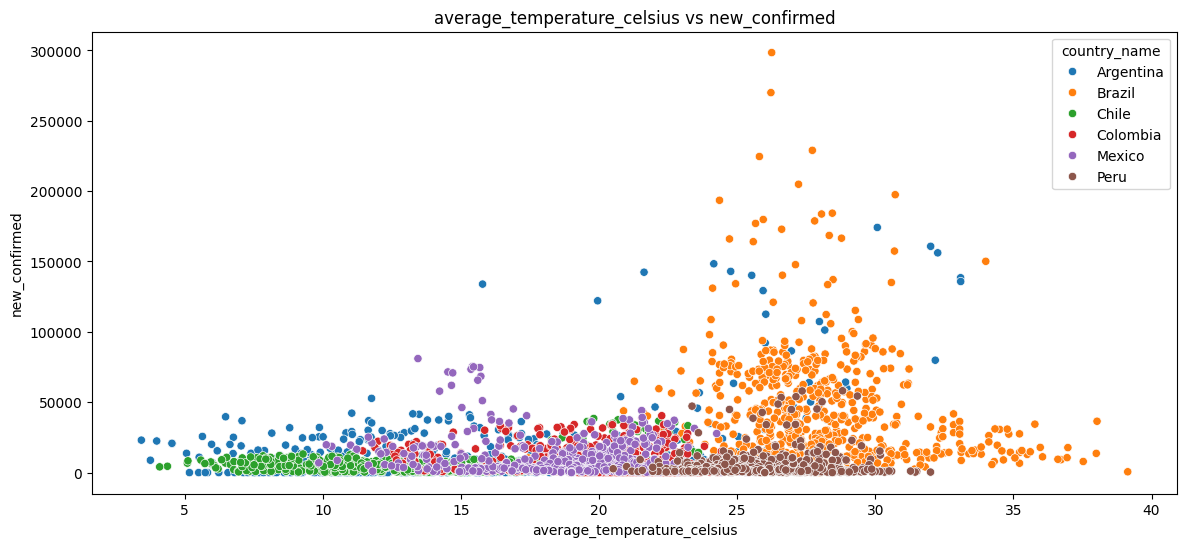

In [46]:
fig, ax= plt.subplots(figsize=(14,6))
sns.scatterplot(x="average_temperature_celsius", y="new_confirmed", data=datos_finales, hue="country_name")
plt.title("average_temperature_celsius vs new_confirmed")
plt.show

Observaciones: en algunos paises la temperatura pareciera no influir en la cantidad de casos.ver como Brasil posee el mayor valor de casos confirmados y notar tambien el rango de temperaturas que abarca argentina y como se ubican en las temperaturas casi mas altas, tambien los valores mas altos de nuevos casos confirmados.

Realizamos a continuacion un analisis de temperaturas promedio con la cantidad de muertes:

<function matplotlib.pyplot.show(close=None, block=None)>

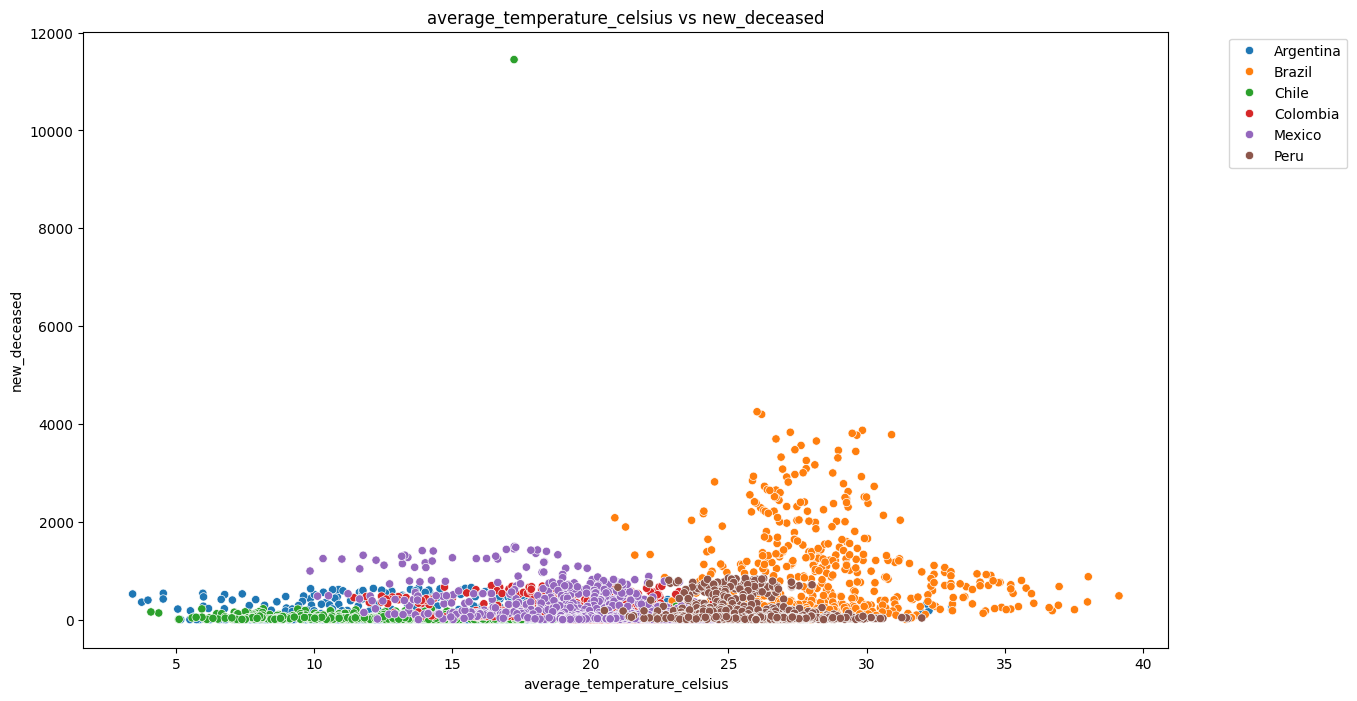

In [20]:
#grafica de  average-temperature_celsius vs  new_deceased
fig, ax= plt.subplots(figsize=(14,8))
sns.scatterplot(x="average_temperature_celsius", y="new_deceased", data=datos_finales, hue="country_name")
plt.title("average_temperature_celsius vs new_deceased")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show

Vamos a realizar un estudio longitudinal, es decir a lo largo del tiempo, para ver como se comportan las variables.
En este caso analizaremos el comportamiento de las dosis administradas por mes de cada pais:

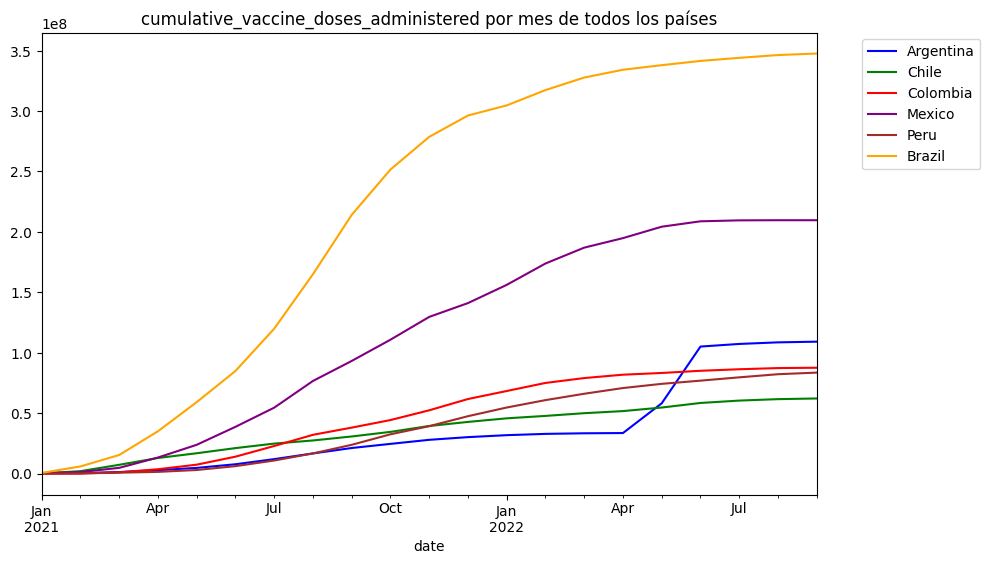

In [47]:
# Diccionario de colores para cada país
colores = {
    "Argentina": "blue",
    "Chile": "green",
    "Colombia": "red",
    "Mexico": "purple",
    "Peru": "brown",
    "Brazil": "orange"
}

fig, ax = plt.subplots(figsize=(10, 6))  # Crear la figura, para colocar el gráfico

paises_seleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

for pais in paises_seleccionados:
    datos_pais = datos_finales[datos_finales["country_name"] == pais]
    datos_pais.resample("ME").mean(numeric_only=True)["cumulative_vaccine_doses_administered"].plot(
        ax=ax, label=pais, color=colores[pais]
    )

plt.title("cumulative_vaccine_doses_administered por mes de todos los países")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Observaciones: podemos notar que la cantidad de dosis ha ido en aumento a lo largo de los meses del estudio, con la salvedad de algunos paises que a tendido a estancarse. los motivos de esto ultimo puede ser multifactorial.

Pasamos a analizar las muertes por mes segun el pais de nuestro estudio:

<function matplotlib.pyplot.show(close=None, block=None)>

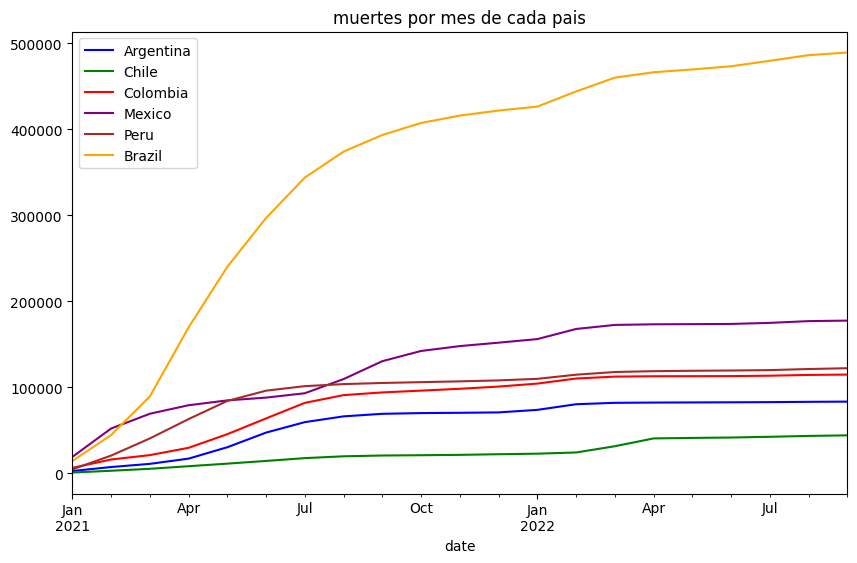

In [48]:
fig, ax= plt.subplots(figsize=(10,6)) #crear la figura, para colocar el grafico

paises_seleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

for pais in paises_seleccionados:
    datos_finales[datos_finales["country_name"]==pais].resample("ME").mean(numeric_only=True)["cumulative_deceased"].plot(
        ax=ax, label=pais, color=colores[pais])
    
plt.title("muertes por mes de cada pais")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.legend(paises_seleccionados)
plt.show

Observacion: Chile fue el pais que mejor mantuvo las muertes.

Casos confirmados/recuperados por mes y por pais. vemos su evolución:

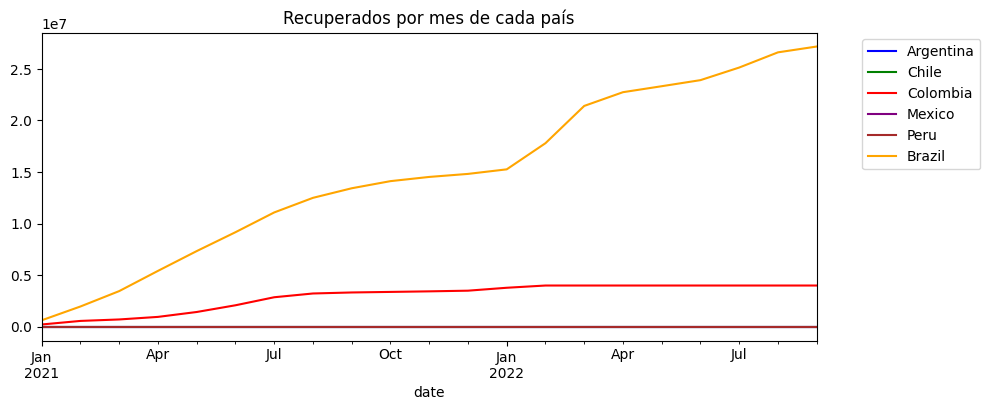

In [49]:
# Diccionario de colores para cada país
colores = {
    "Argentina": "blue",
    "Chile": "green",
    "Colombia": "red",
    "Mexico": "purple",
    "Peru": "brown",
    "Brazil": "orange"
}

fig, ax = plt.subplots(figsize=(10, 4))  # Crear la figura, para colocar el gráfico

paises_seleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

for pais in paises_seleccionados:
    datos_pais = datos_finales[datos_finales["country_name"] == pais]
    datos_pais.resample("ME").mean(numeric_only=True)["cumulative_recovered"].plot(
        ax=ax, label=pais, color=colores[pais]
    )

plt.title("Recuperados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


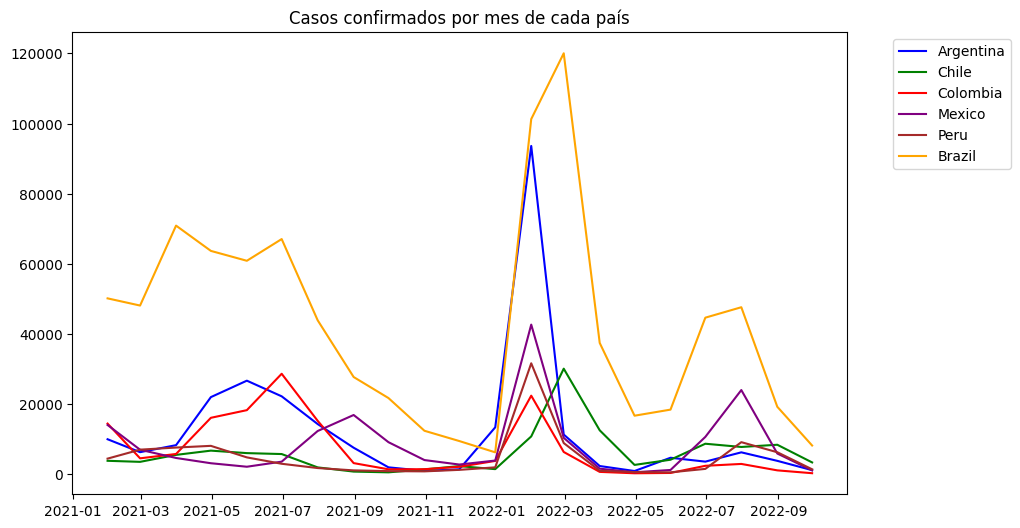

In [50]:
# y que los datos están indexados por fecha.

# Crear la figura para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Lista de países seleccionados
paises_seleccionados = ["Argentina", "Chile", "Colombia", "Mexico", "Peru", "Brazil"]

# Diccionario de colores para cada país
colores = {
    "Argentina": "blue",
    "Chile": "green",
    "Colombia": "red",
    "Mexico": "purple",
    "Peru": "brown",
    "Brazil": "orange"
}

# Crear el gráfico para cada país con el color correspondiente
for pais in paises_seleccionados:
    datos_pais = datos_finales[datos_finales["country_name"] == pais].resample("ME").mean(numeric_only=True)
    ax.plot(datos_pais.index, datos_pais["new_confirmed"], label=pais, color=colores[pais])

# Configurar el título y las leyendas del gráfico
plt.title("Casos confirmados por mes de cada país")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Observacion: como algo a remarcar, Argentina se acerca a Brasil en un momento, sabiendo las diferencias de tamaño del pais.

Con KDE vemos dosis acumuladoas por pais:


Text(0.5, 1.0, 'distribucion de dosis acumuladas por pais')

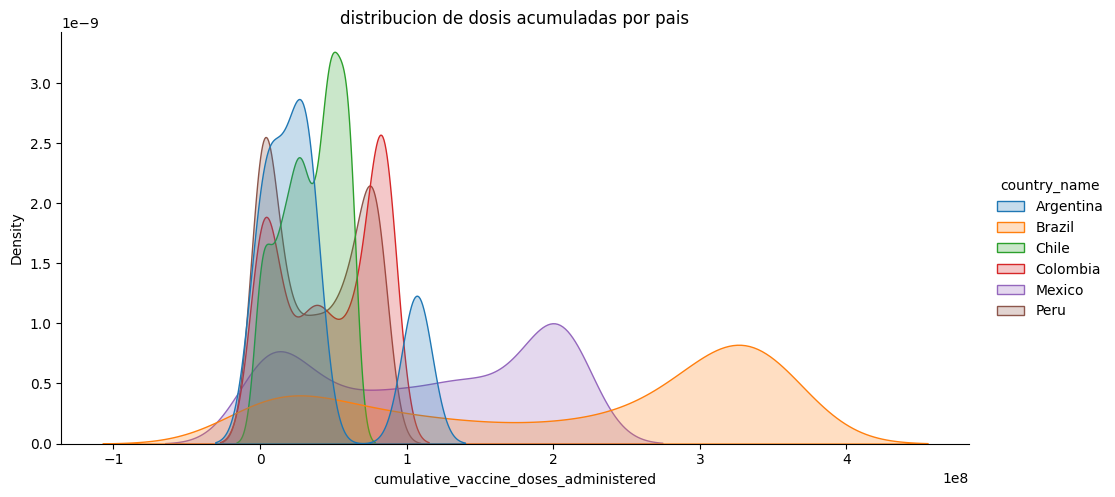

In [51]:
#creamos un grafico de dispersion con KDE:
sns.displot(datos_finales, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True, aspect=2)
plt.title("distribucion de dosis acumuladas por pais")

observacion: vemos la probabilidad de los datos.

Vamos a graficar el comportamiento de las temperaturas medias de cada pais:

<function matplotlib.pyplot.show(close=None, block=None)>

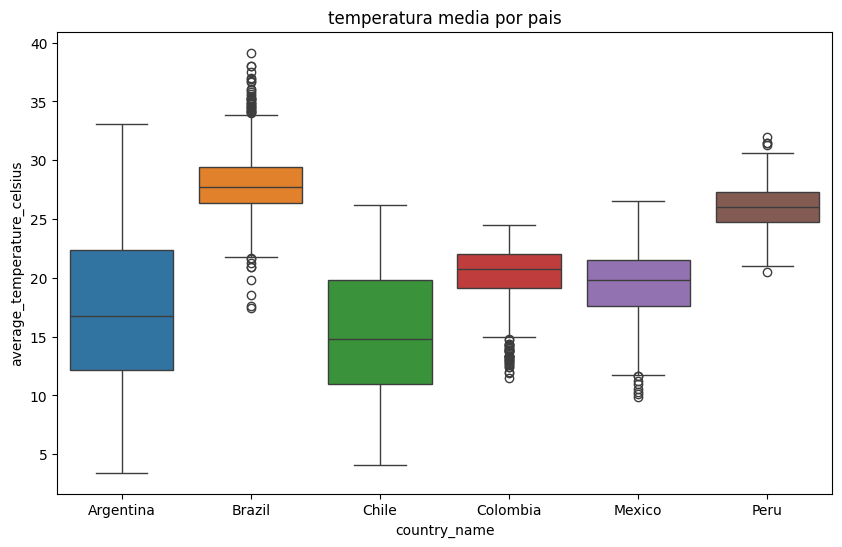

In [52]:
fig, ax= plt.subplots(figsize=(10,6))
sns.boxplot(x="country_name", y="average_temperature_celsius", data=datos_finales, hue="country_name")
plt.title("temperatura media por pais")
plt.show

A continuacion vamos a analizar de manera grafica, el comportamiento de cierta variables, mediante graficos de violin:

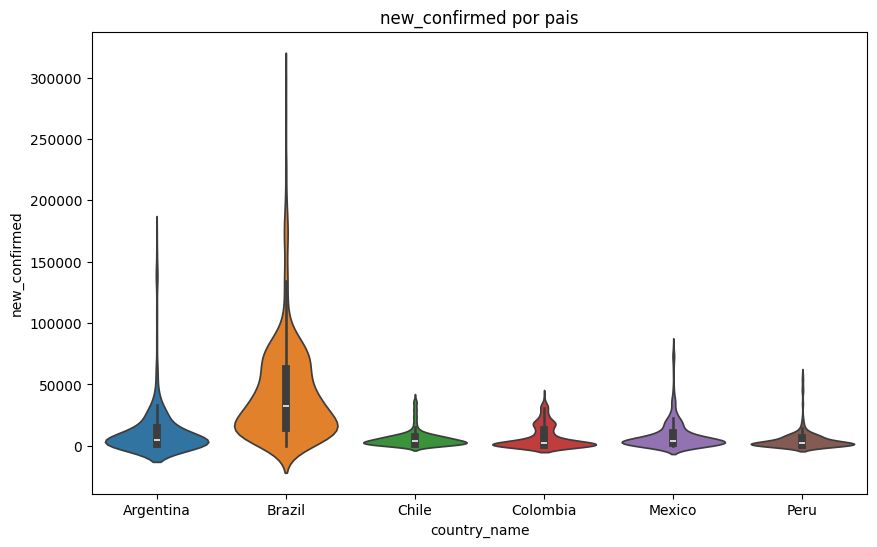

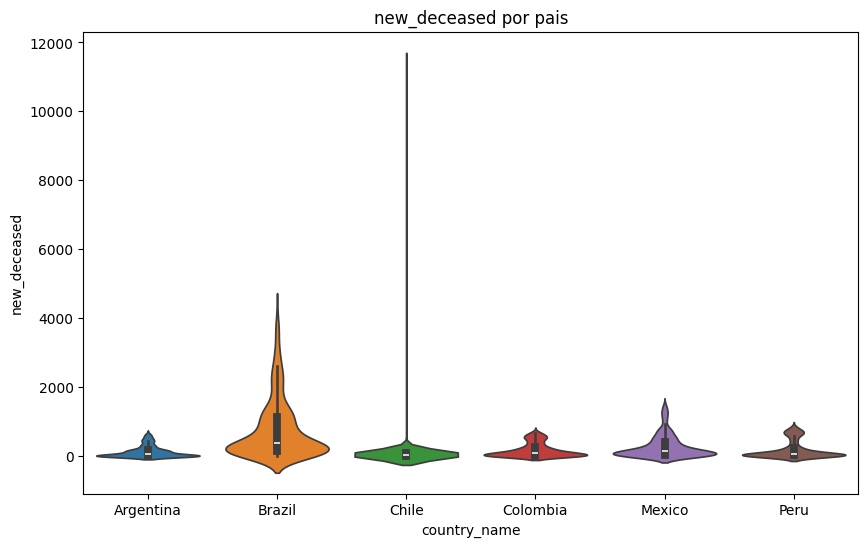

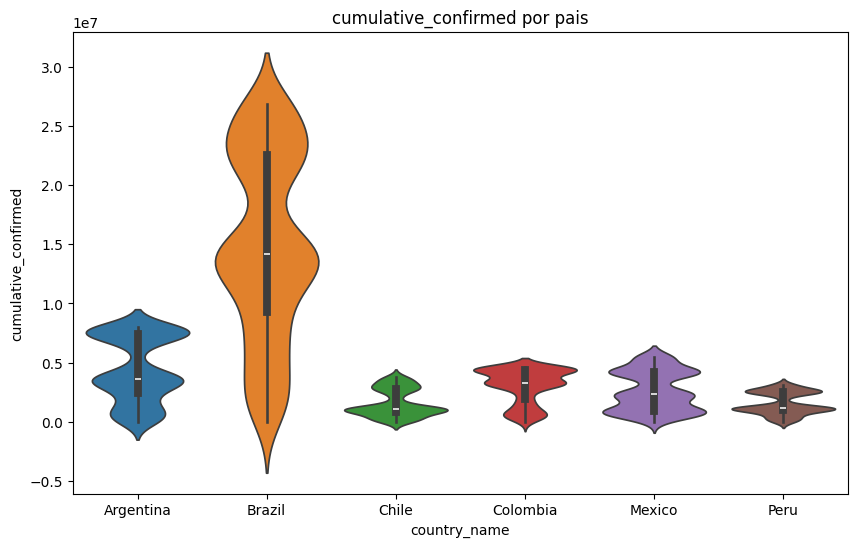

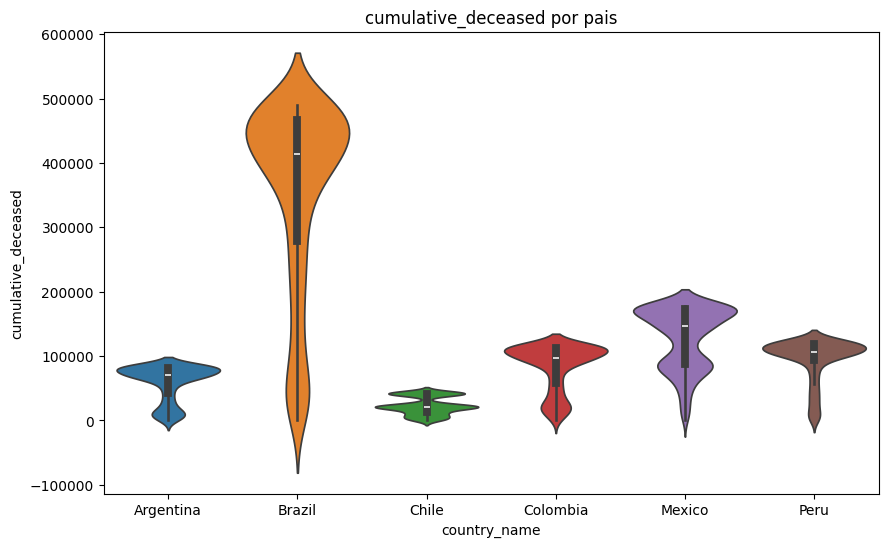

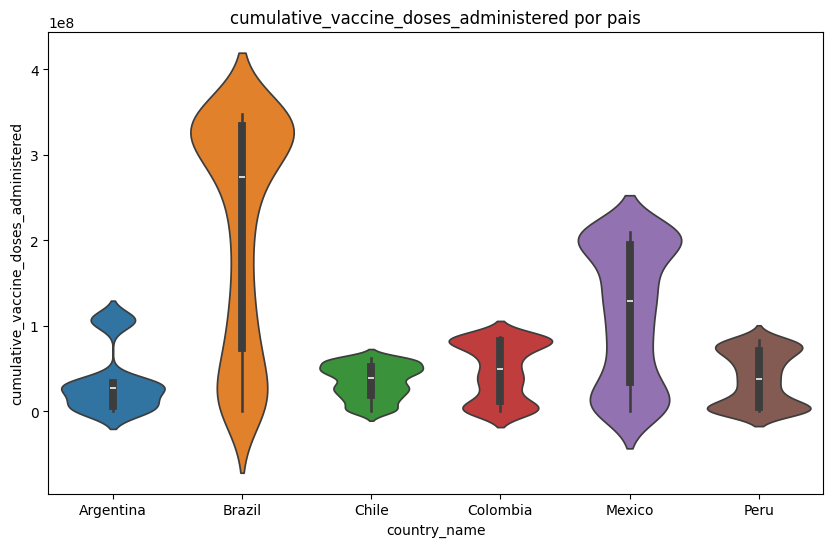

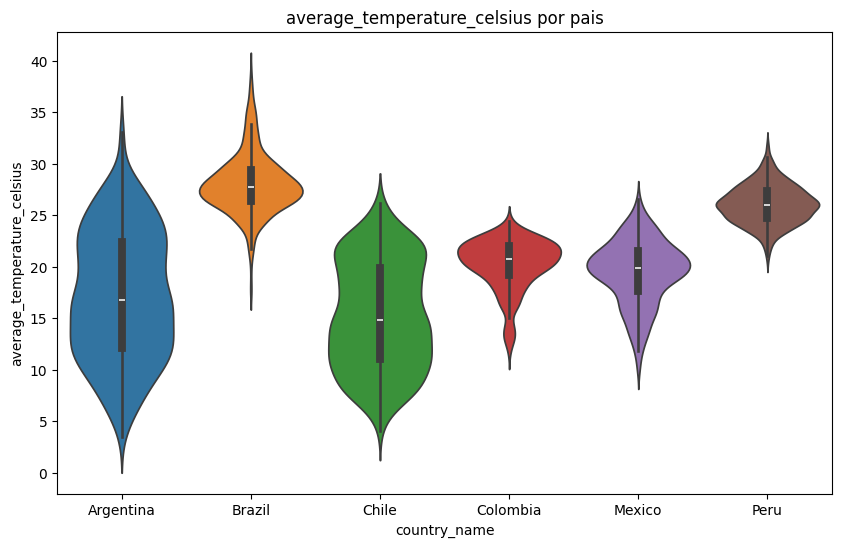

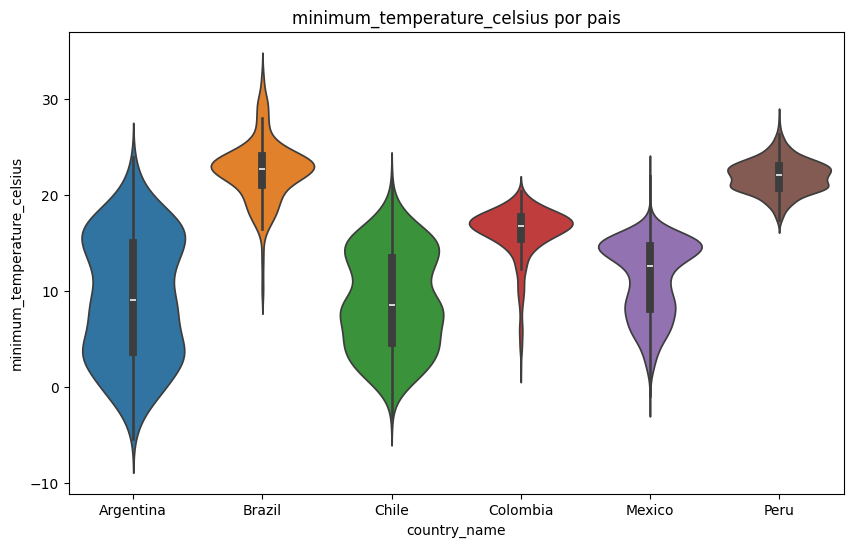

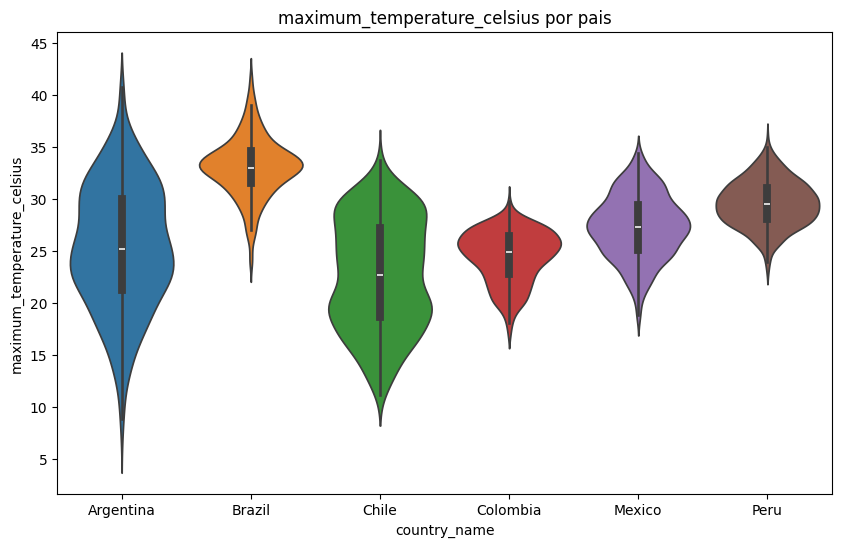

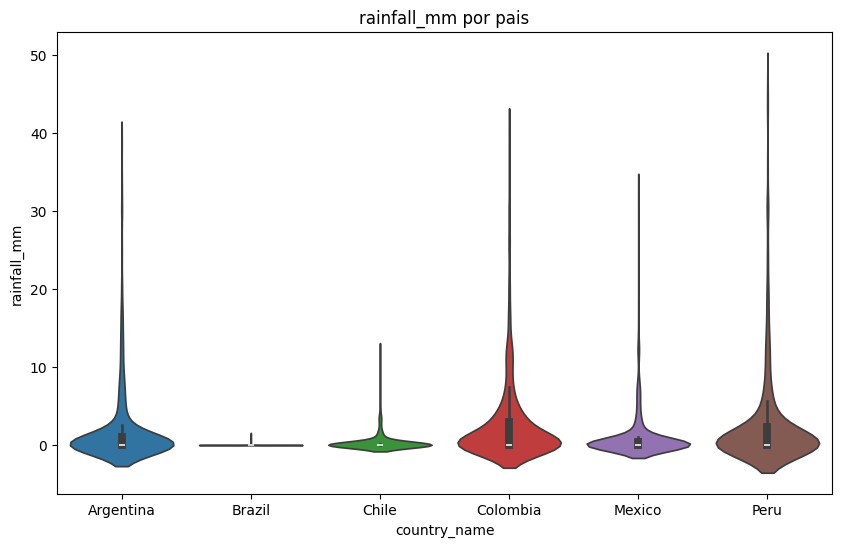

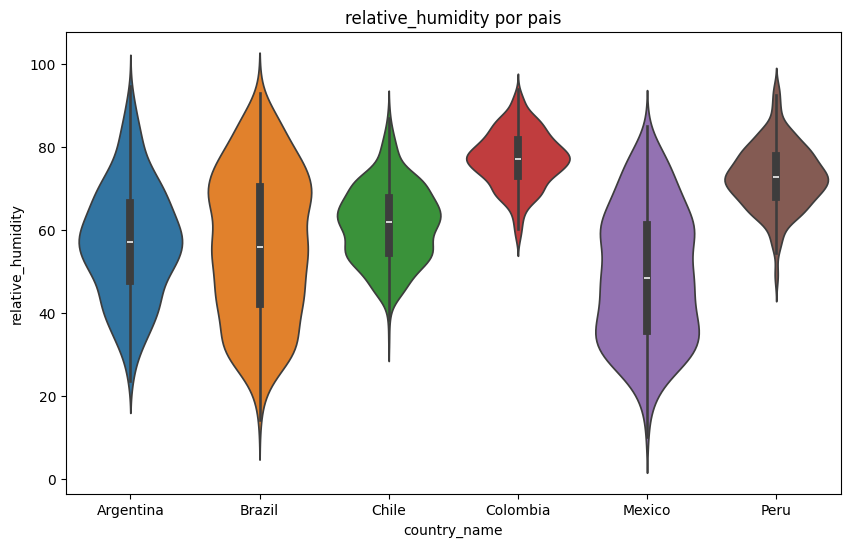

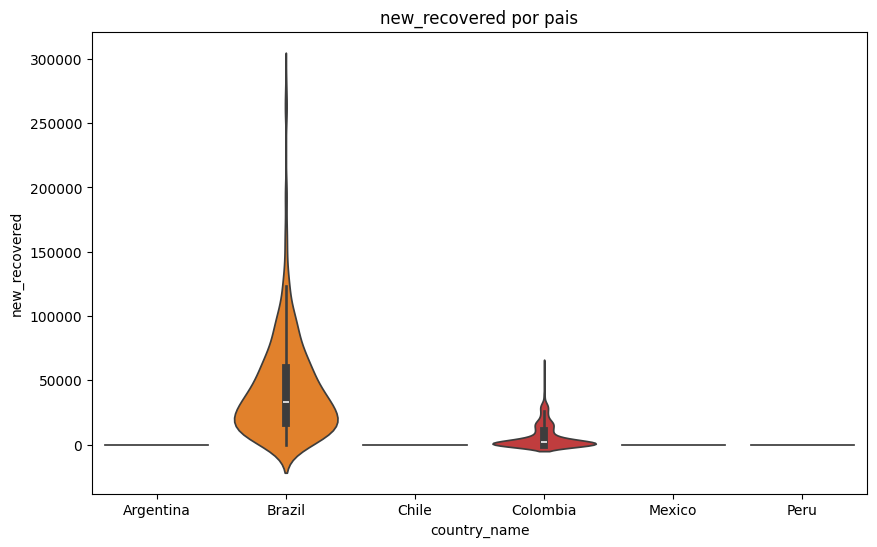

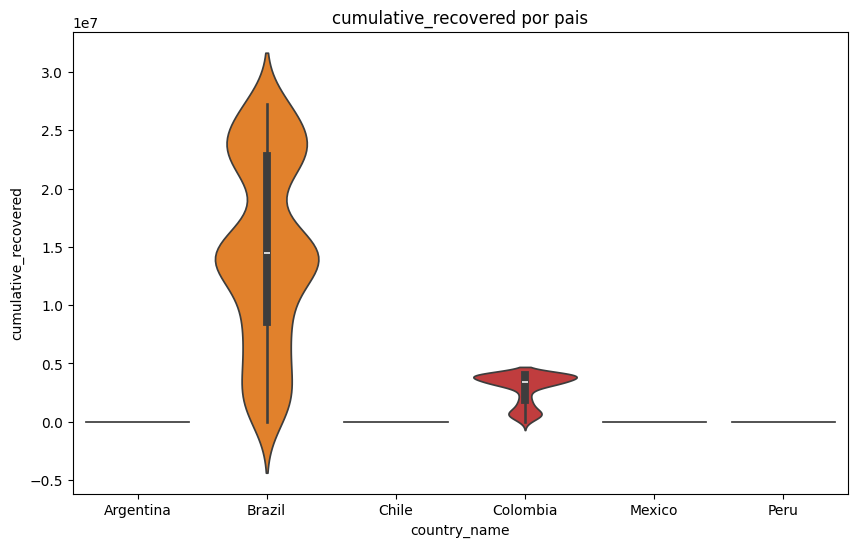

In [53]:
#se crea dataframe con columnas mayores a 6 porque son las que tienen valores  diferentes de cada pais:
columnas_mayores_6=[]
for i in datos_finales.columns:
    if i not in ["location_key", "date", "country_code", "latitude", "longitude"]:
        if datos_finales[i].nunique()>6:
            columnas_mayores_6.append(i)

#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por pais:
columnas_mayores_6.append("country_name")

# se crea un dataframe con las columnas mayores a 6:
datos_finales_columnas_mayores_6=datos_finales[columnas_mayores_6]

#violinplot en todos los paises para variables numericas:
for i in datos_finales_columnas_mayores_6.columns:
    if i not in ["location_key", "date", "country_code", "latitude", "longitude" , "country_name"]:
        fig, ax=plt.subplots(figsize=(10,6))
        sns.violinplot(x="country_name", y=i, data=datos_finales_columnas_mayores_6, hue="country_name")
        plt.title(f"{i} por pais")
        plt.show






Procedemos a analizar la distribucion de la poblacion por grupos y su comportamiento:

<function matplotlib.pyplot.show(close=None, block=None)>

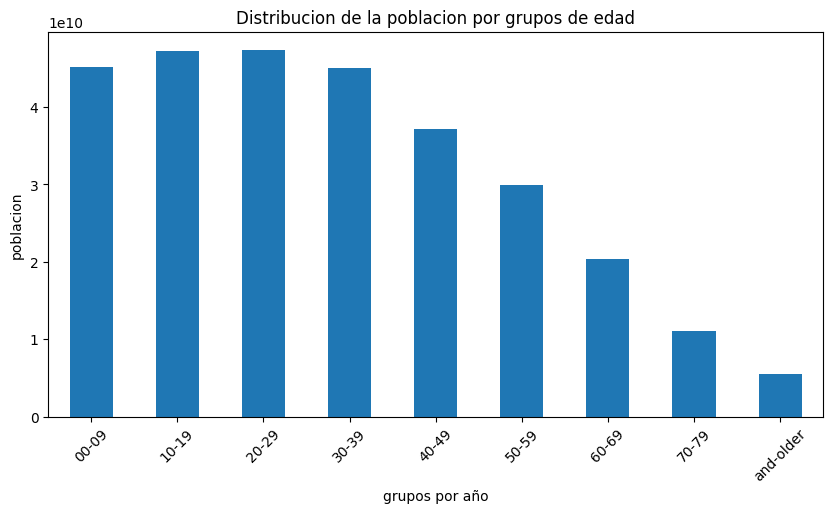

In [54]:
#calculamos la distribucion  de la poblacion  por grupo de edad:
columnas_edad= ["population_age_00_09", "population_age_10_19", "population_age_20_29", "population_age_30_39",
                "population_age_40_49", "population_age_50_59", "population_age_60_69", 
                "population_age_70_79", "population_age_80_and_older"]

distribucion_edades= datos_finales[columnas_edad].sum()

plt.figure(figsize=(10,5))
distribucion_edades.plot(kind="bar", stacked=True)
plt.xlabel("grupos por año")
plt.ylabel("poblacion")
plt.title("Distribucion de la poblacion por grupos de edad")
plt.xticks(range(len(columnas_edad)), [col.split("_")[-2] + "-" + col.split("_")[-1] for col in columnas_edad], rotation=45)

plt.show


Comparamos la tasa de mortalidad M vs F, por pais:

<function matplotlib.pyplot.show(close=None, block=None)>

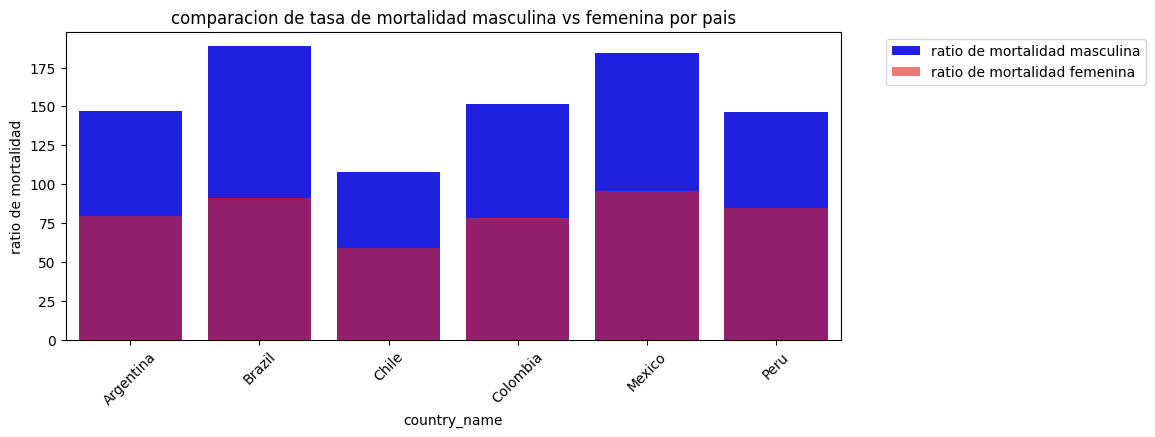

In [55]:
plt.figure(figsize=(10,4))
sns.barplot(data=datos_finales, x= "country_name", y="adult_male_mortality_rate", color="blue", label="ratio de mortalidad masculina")
sns.barplot(data=datos_finales, x= "country_name", y= "adult_female_mortality_rate", color="red", alpha=0.6, label="ratio de mortalidad femenina")
plt.xticks(rotation=45)
plt.ylabel("ratio de mortalidad")
plt.title("comparacion de tasa de mortalidad masculina vs femenina por pais")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show

Vamos a comparar la prevalencia de diabetes y la tasa de mrtalidad:

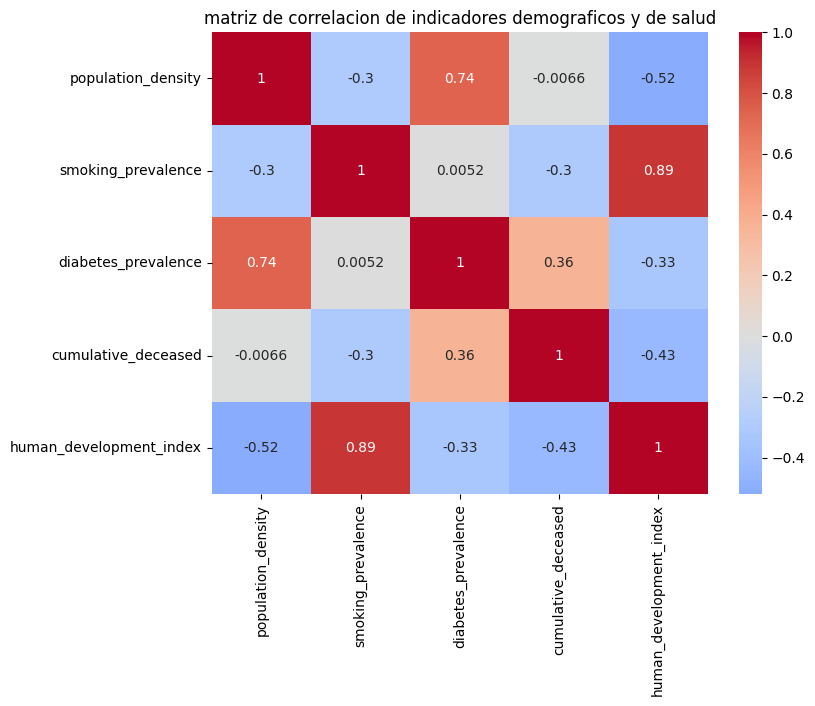

In [56]:
columnas_corr= ["population_density", "smoking_prevalence", "diabetes_prevalence", "cumulative_deceased", "human_development_index"]
correlation_matrix=datos_finales[columnas_corr].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap= "coolwarm", center=0)
plt.title("matriz de correlacion de indicadores demograficos y de salud")
plt.show()


fdsffsa

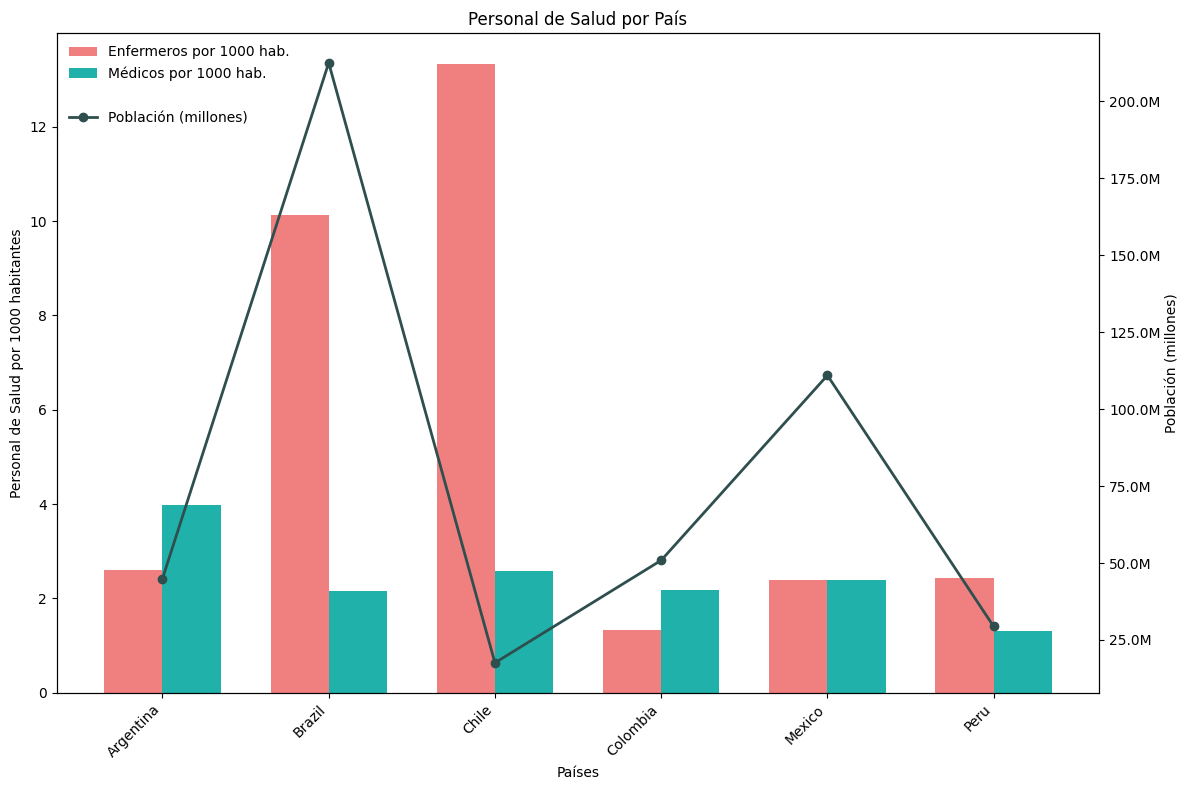

In [57]:
# Filtrar las columnas relevantes
cols_to_plot = ['country_name', 'nurses_per_1000', 'physicians_per_1000', 'population']

# Filtrar y limpiar datos (eliminar NaNs si es necesario)
#df_filtered = df_Latam[cols_to_plot].dropna()

# Agrupar por país y tomar el primer valor para cada país
df_grouped = datos_finales.groupby('country_name').first().reset_index()

# Configurar variables para el gráfico
countries = df_grouped['country_name']
nurses_per_1000 = df_grouped['nurses_per_1000']
physicians_per_1000 = df_grouped['physicians_per_1000']
population = df_grouped['population'] / 1e6  # Convertir población a millones

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar columnas agrupadas (nurses_per_1000 y physicians_per_1000)
bar_width = 0.35
x = np.arange(len(countries))
bars1 = ax1.bar(x - bar_width/2, nurses_per_1000, bar_width, label='Enfermeros por 1000 hab.', color='lightcoral')
bars2 = ax1.bar(x + bar_width/2, physicians_per_1000, bar_width, label='Médicos por 1000 hab.', color='lightseagreen')

# Configurar ejes y etiquetas
ax1.set_xlabel('Países')
ax1.set_ylabel('Personal de Salud por 1000 habitantes')
ax1.set_title('Personal de Salud por País')
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45, ha='right')

# Crear segundo eje y para la línea (población)
ax2 = ax1.twinx()
line = ax2.plot(x, population, color='darkslategray', marker='o', linestyle='-', linewidth=2, label='Población (millones)')

# Configurar ejes y etiquetas para el segundo eje y
ax2.set_ylabel('Población (millones)')

# Ajustar formato de los valores en el eje y para población
formatter = plt.FuncFormatter(lambda x, _: f'{x:.1f}M')
ax2.yaxis.set_major_formatter(formatter)

# Ajustar diseño del gráfico
fig.tight_layout()

# Agregar leyendas para las barras
bars = bars1 + bars2
labels = [bar.get_label() for bar in [bars1, bars2]]
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False)

# Agregar leyenda para la línea de población
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9), frameon=False)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Vamos a visualizar la comparacion entre prevalecia de diabetes y fumadores contra tasa de mortalidad:

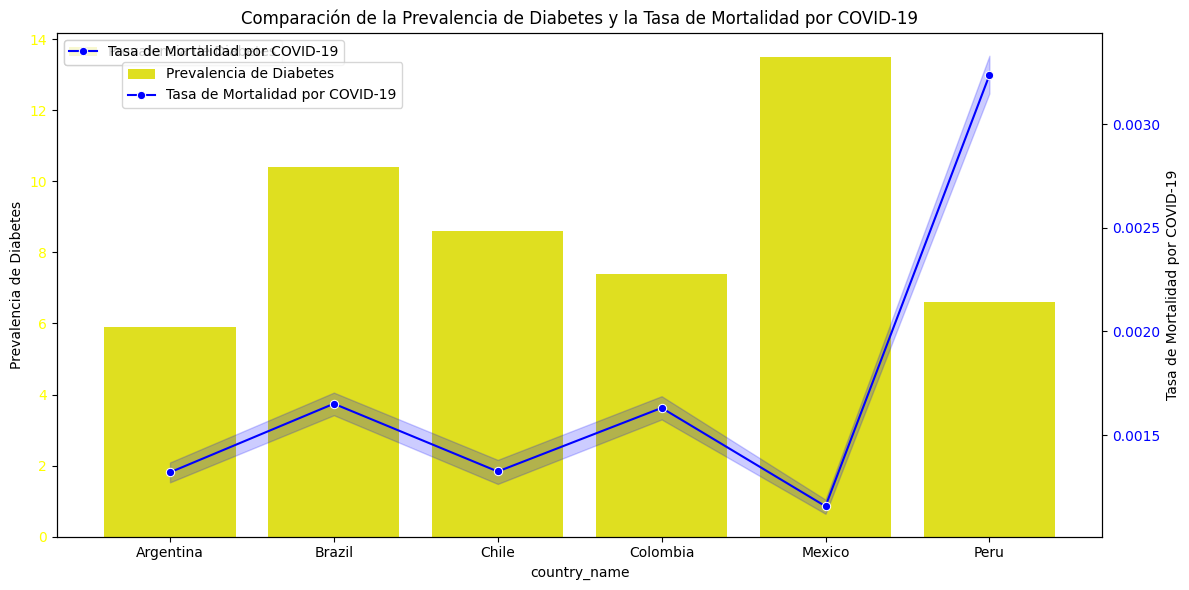

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar las barras de prevalencia de diabetes
sns.barplot(data=datos_finales, x='country_name', y='diabetes_prevalence', color="yellow", ax=ax1, label="Prevalencia de Diabetes")
ax1.set_ylabel('Prevalencia de Diabetes')
ax1.tick_params(axis='y', labelcolor="yellow")

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Graficar la línea de tasa de mortalidad por COVID-19
sns.lineplot(data=datos_finales, x='country_name', y=datos_finales['cumulative_deceased'] / datos_finales["population"], color="blue", marker='o', ax=ax2, label="Tasa de Mortalidad por COVID-19")
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax2.tick_params(axis='y', labelcolor="blue")

# Ajustar las etiquetas del eje X para que no se solapen
plt.xticks(rotation=90)

# Título de la gráfica
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')

# Agregar leyendas
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()


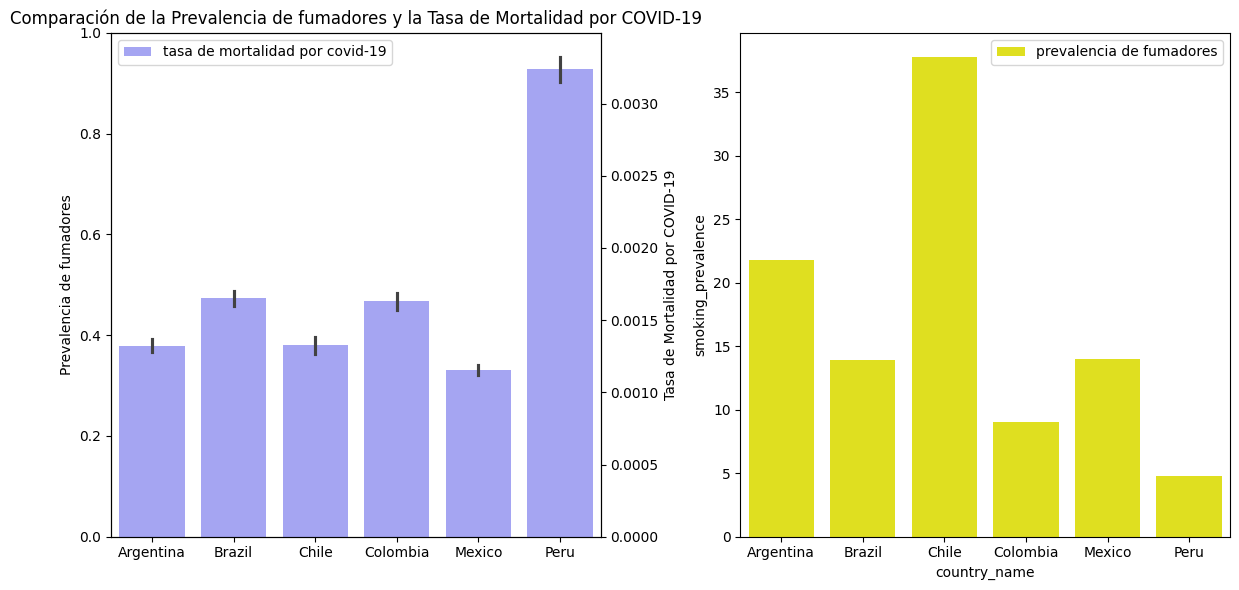

In [59]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=datos_finales, x= datos_finales ['country_name'], y= datos_finales ['smoking_prevalence'], color="yellow", label="prevalencia de fumadores")
ax2 = ax.twinx()
sns.barplot(data=datos_finales, x= datos_finales ['country_name'], y= datos_finales ['cumulative_deceased'] / datos_finales["population"], color="blue" , label="tasa de mortalidad por covid-19", ax=ax2, 
            alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de fumadores')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de fumadores y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

## AVANCE 3:

Es turno de efectuar un analisis exporatorio con una visualizacion mas avanzada de los datos: tendencia, estacionalidad, patrones temporales, autocorrelacion. el objetivo: identificar las ubicaciones estrategicas para la expansion de laboriatorios y centros de vacunación, para lograr decisiones de inversion eficaz, basada en datos:

Como primera aproximación vamos a realizar un analisis del comportamiento de manera semanal y anual:

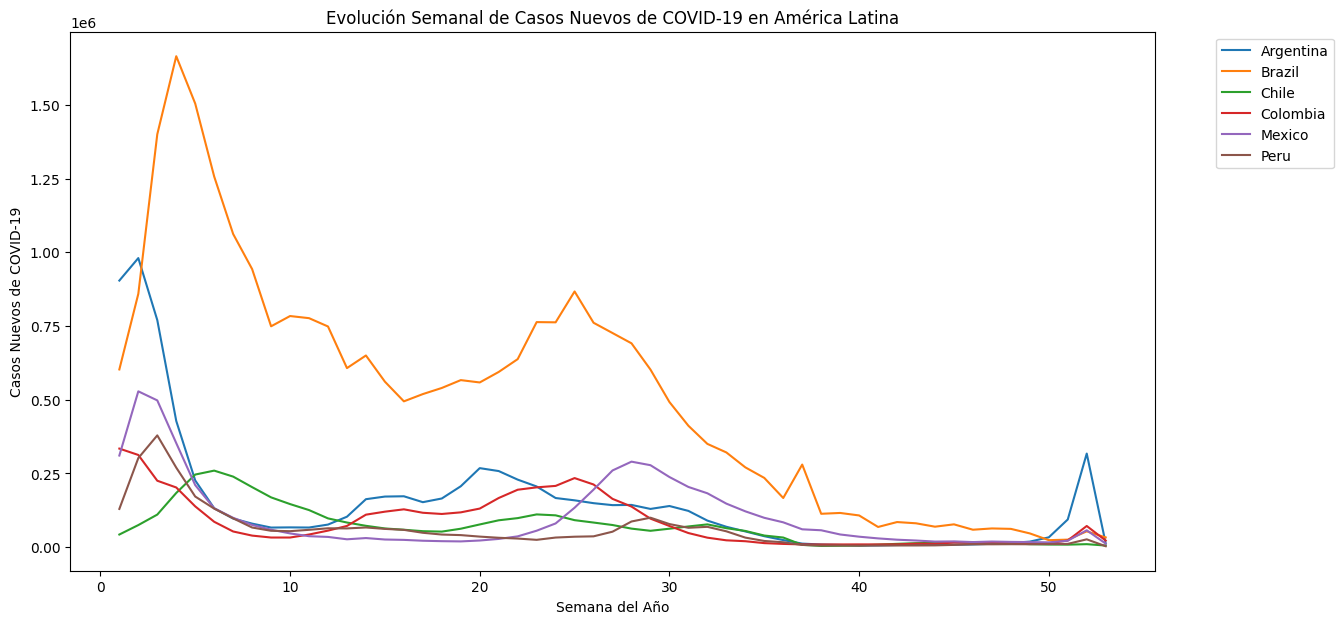

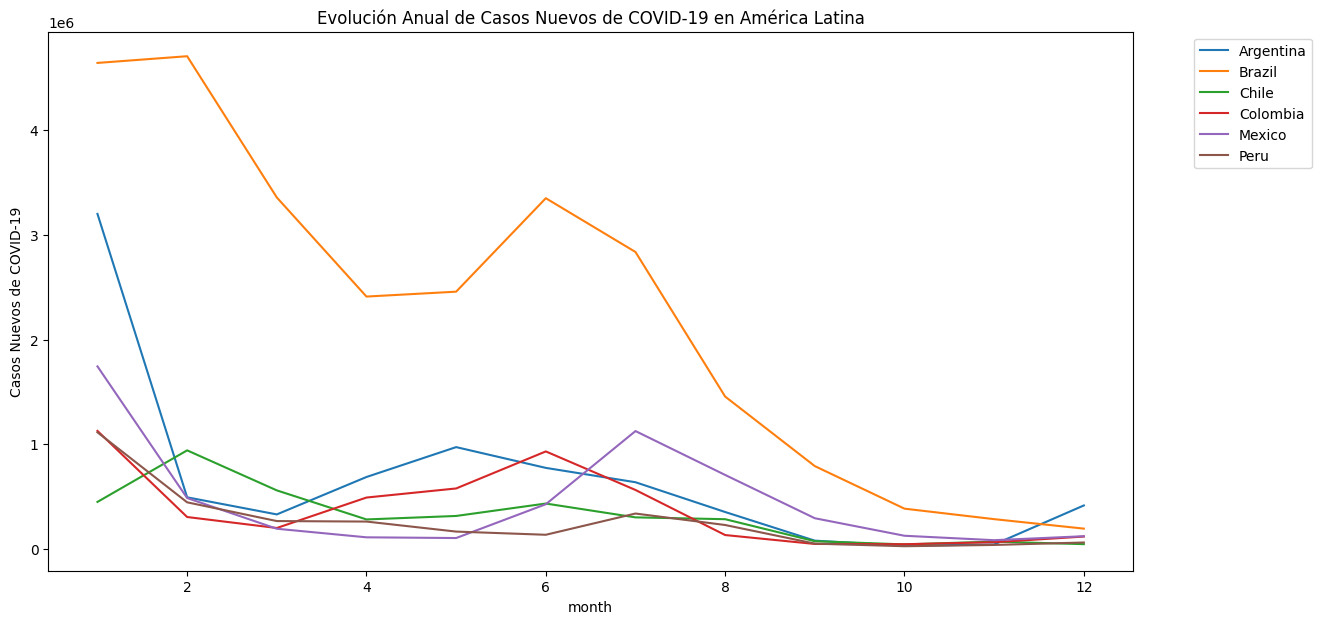

In [61]:
#vamos a analizar  como evolucionan los casos de covid-19 en  america latina a lo largo del tiempo por semana:

datos_finales ['week'] = datos_finales.index.isocalendar().week 
datos_finales ['year'] = datos_finales.index. isocalendar().year
weekly_cases = datos_finales.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index() 
plt.figure(figsize=(14, 7))

for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases ['country_name'] == country]
    plt.plot(country_weekly_cases ['week'], country_weekly_cases ["new_confirmed"], label=country )

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina') 
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left')
plt.show()

#ahora por vamos por año
datos_finales ['month'] = datos_finales.index.month
yearly_cases = datos_finales.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index() 
plt.figure(figsize=(14, 7))

for country in yearly_cases ['country_name'].unique():
    country_yearly_cases = yearly_cases [yearly_cases ['country_name'] == country]
    plt.plot(country_yearly_cases ['month'], country_yearly_cases ['new_confirmed'], label=country)

plt.xlabel('month')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Anual de Casos Nuevos de COVID-19 en América Latina') 
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left')
plt.show()


Graficamos el progreso de la vacunación:

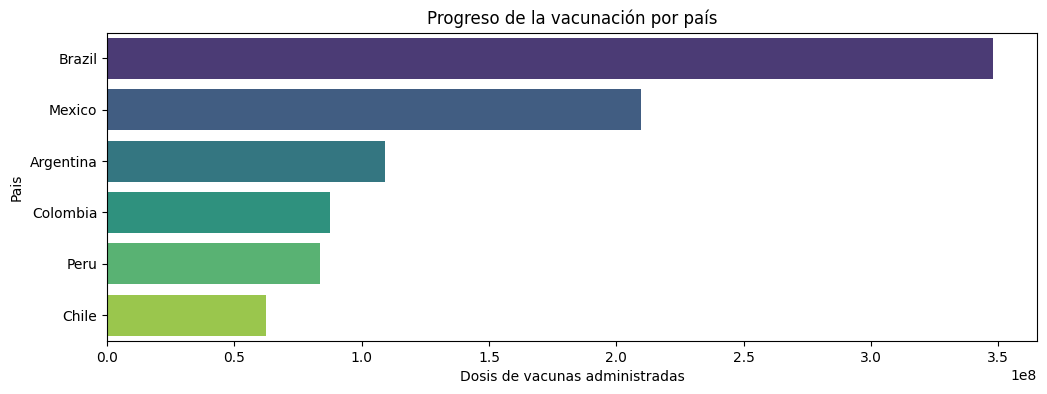

In [62]:
vaccination_data = datos_finales.groupby('country_name')["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)

plt.figure(figsize=(12, 4))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data. index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('Pais')
plt.title("Progreso de la vacunación por país")
plt.show()


Graficamos nuevos casos vs temperatura promedio:

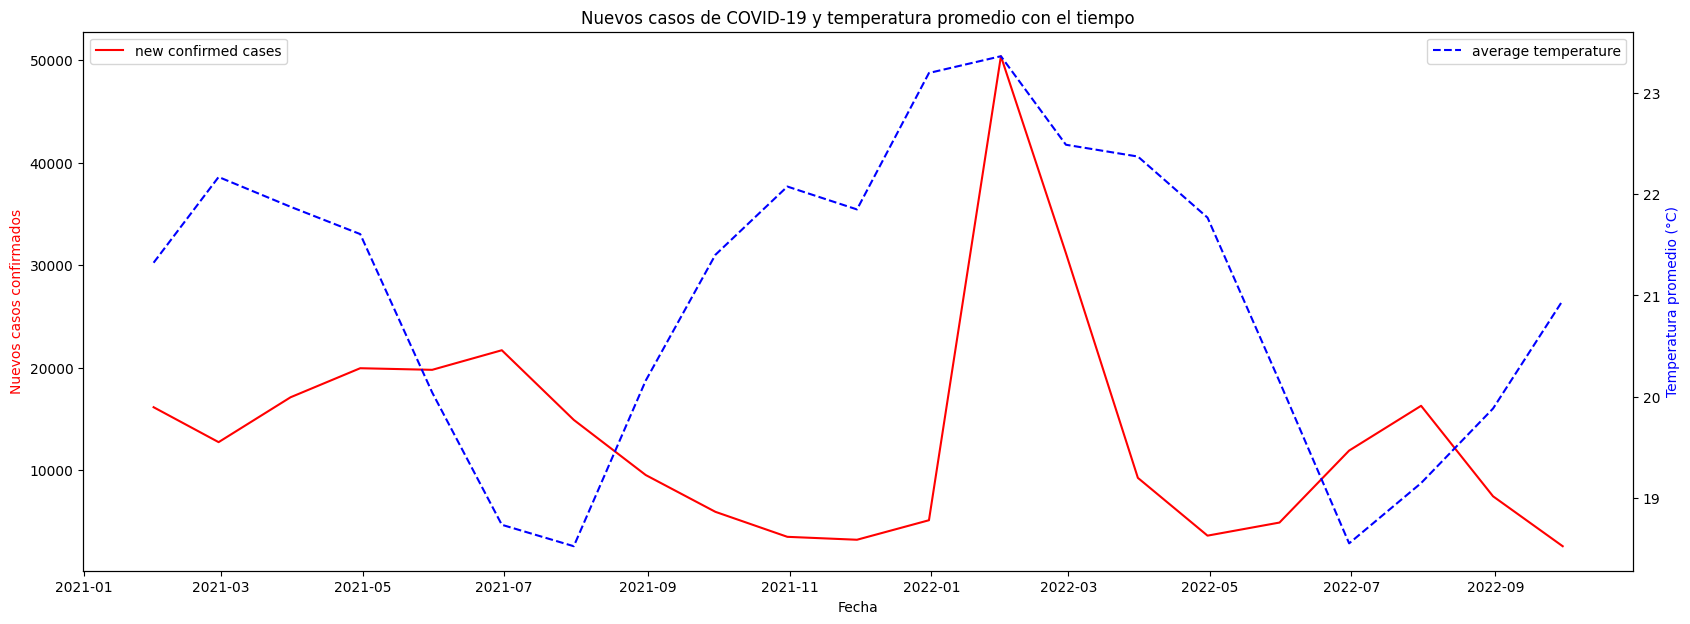

In [63]:
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19
plt.figure(figsize=(20, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(datos_finales.resample('ME').mean (numeric_only=True).index, datos_finales.resample('ME').mean (numeric_only=True)["new_confirmed"], color="red", label="new confirmed cases")
ax2.plot(datos_finales.resample('ME').mean (numeric_only=True).index, datos_finales.resample('ME').mean (numeric_only=True)["average_temperature_celsius"], color="blue", label="average temperature", linestyle="--")

ax1.set_xlabel('Fecha') #colocar etiqueta a la grafica
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel("Temperatura promedio (°C)", color='blue')
plt.title("Nuevos casos de COVID-19 y temperatura promedio con el tiempo")  #colocar titulo a la grafica
ax1.legend (loc='upper left')
ax2.legend(loc='upper right')
plt.show()


Observaciones: podemos notar que hna disminuido los casos, adquirio un pico em marzo y vuelto a bajar rapidamente.

Cada pais tiene su impacto, segun su nivel de urbanizacion:

C:\Users\franb\AppData\Local\Temp\ipykernel_10636\1491907583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases["urban_population_percentage"], y=urban_cases.index, palette="viridis")


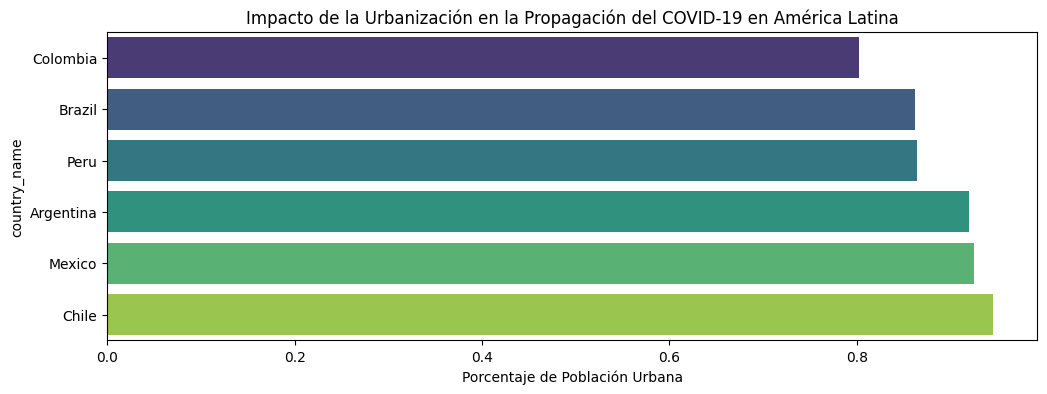

In [64]:
datos_finales ['urban_population_percentage'] = datos_finales ['population_urban'] /datos_finales["population"]
urban_cases = datos_finales.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(12, 4))
sns.barplot(x=urban_cases["urban_population_percentage"], y=urban_cases.index, palette="viridis")
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en la Propagación del COVID-19 en América Latina')
plt.show()


Comparamos densidad de pobacion por grupos de edad, para hacerlo mas interesante que el anterior grafico:

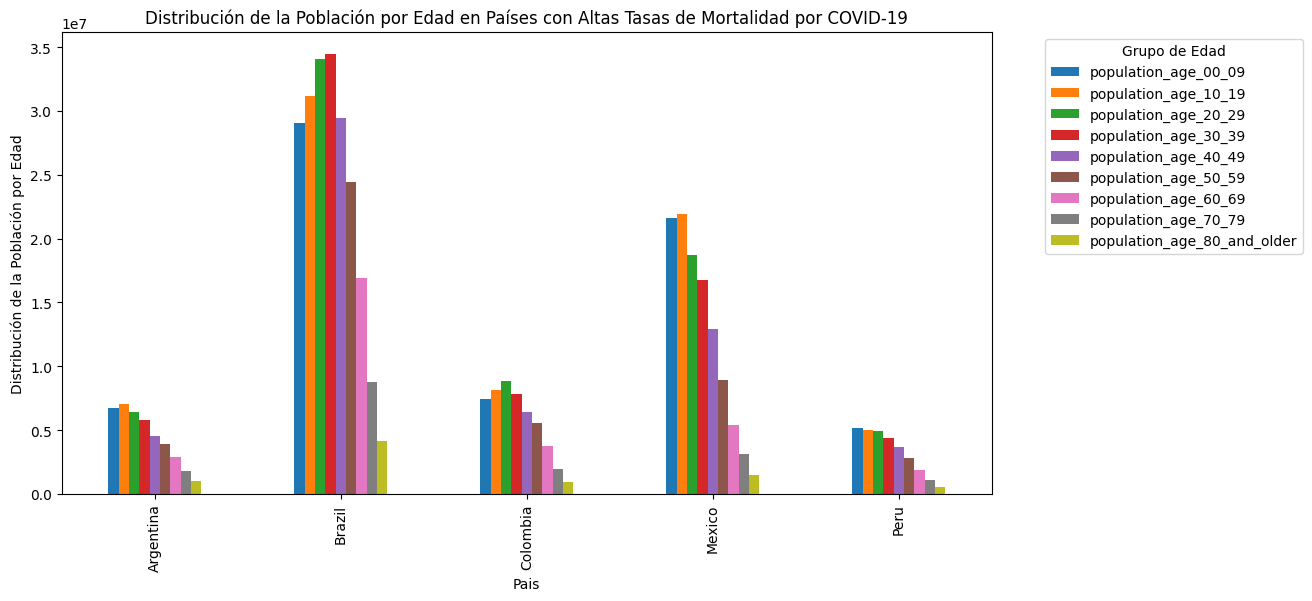

In [65]:
high_mortality_countries = datos_finales.groupby('country_name') ['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', "population_age_50_59",
                'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = datos_finales[datos_finales['country_name'].isin (high_mortality_countries)].groupby('country_name')[age_groups].mean()

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel('Pais')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left', title='Grupo de Edad')
plt.show()


Pasamos a comparar las estrategias de vacunacion de los paises:

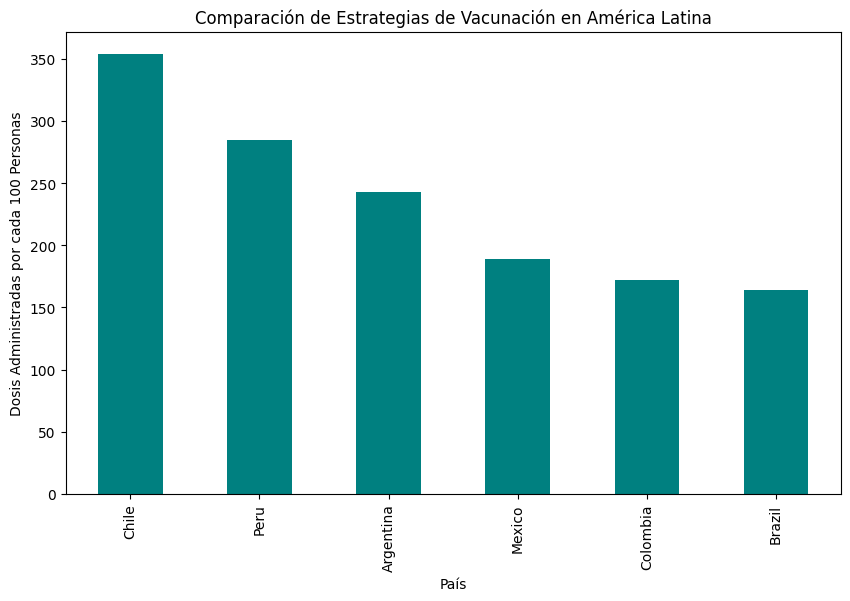

In [66]:
vaccination_strategy = datos_finales.groupby('country_name') ['cumulative_vaccine_doses_administered'].max() /datos_finales.groupby("country_name")["population"].max()*100
vaccination_strategy.sort_values(ascending=False). plot (kind='bar', figsize=(10, 6), color='teal') 

plt.xlabel('País')
plt.ylabel('Dosis Administradas por cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()


Nuevamente, vemos el buen resultado de chile y el malo de brasil y colombia. Con esto vamos definiendo los paises que necesitan mas ayuda y donde se debrian crear los nuevos centros. 

A continuacion visualizamos el top 5 de los mejores y peores:

In [67]:
datos_finales.groupby("country_name")["cumulative_deceased"].max().nlargest(5).index


Index(['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [68]:

datos_finales.groupby("country_name")["cumulative_deceased"].max().nsmallest(5).index

Index(['Chile', 'Argentina', 'Colombia', 'Peru', 'Mexico'], dtype='object', name='country_name')

Pasamos a analizas como influye la diabetes, utilizando los codigos anteriores:

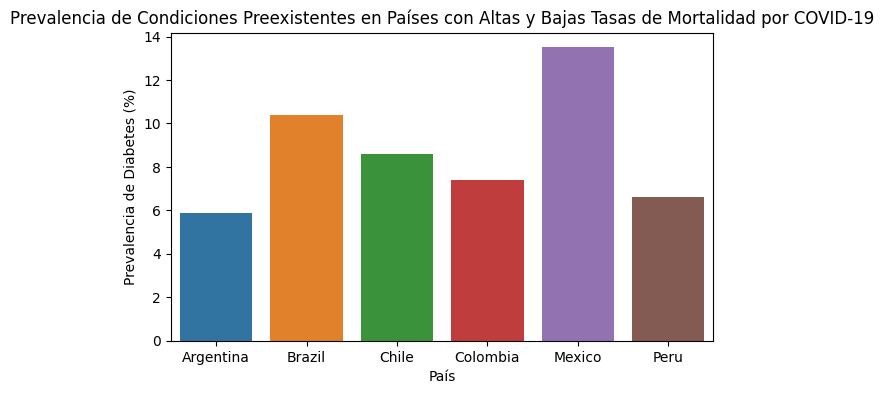

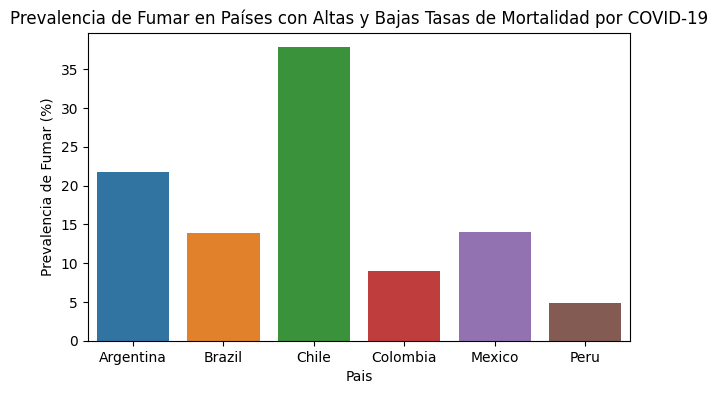

In [70]:
# Prevalencia de diabetes. utilizamos union:
top_countries = datos_finales.groupby('country_name') ['cumulative_deceased'].max().nlargest (5).index
bottom_countries = datos_finales.groupby('country_name') ['cumulative_deceased'].max().nsmallest (5).index 
conditions_data = datos_finales[datos_finales['country_name'].isin (top_countries.union (bottom_countries))]

plt.figure(figsize=(7, 4))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()
# Prevalencia de fumar.
plt.figure(figsize=(7, 4))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('Pais')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()


Comparamos la tasa de letalidad entre los paises:

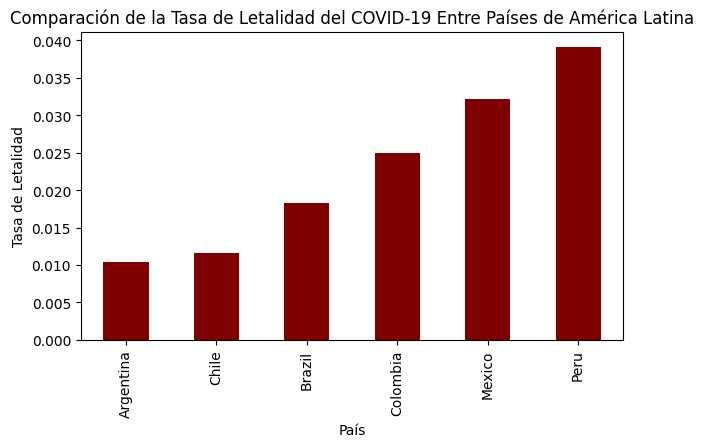

In [71]:
# Calculamos la tasa de letalidad por país:
datos_finales ['case_fatality_rate'] = datos_finales['cumulative_deceased'] / datos_finales ['cumulative_confirmed']
fatality_rates = datos_finales.groupby('country_name') ['case_fatality_rate'].last().sort_values()

# Creamos el gráfico de barras:
plt.figure(figsize=(7, 4))
fatality_rates.plot(kind='bar', color='maroon')

# Configuramos los ejes y el título del gráfico:
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title("Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina")
# Muestra el gráfico 
plt.show()


Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina, utilizando grafico de lineas:

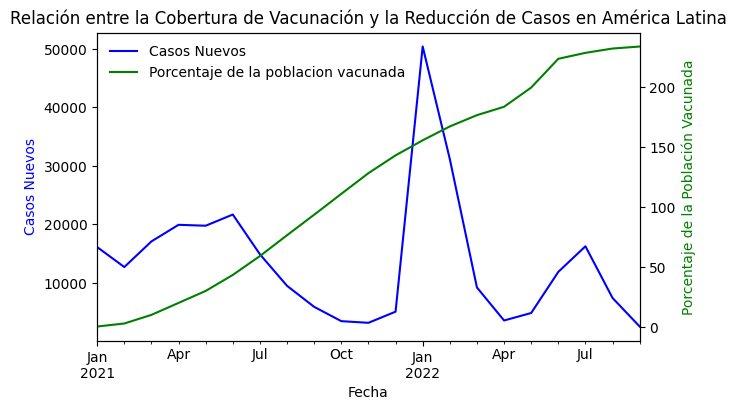

In [34]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(7, 4))
ax1 = plt.gca()
ax2 = ax1.twinx()
#crea percentajes de vacunacion
datos_finales['percentage vaccinated'] = (datos_finales['cumulative_vaccine_doses_administered'] /datos_finales["population"])*100
datos_finales.resample('ME').mean (numeric_only=True) ["new_confirmed"].plot(ax=ax1, color='blue', label='Casos Nuevos')
datos_finales.resample('ME').mean (numeric_only=True) ['percentage vaccinated'].plot(ax=ax2, color='green', label="Porcentaje de la poblacion vacunada")
                                                                                       
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')

# Combinar leyendas de ambos ejes y posicionarlas a la izquierda, una debajo de la otra
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0, 1), frameon=False, ncol=1)

#ax1. legend (loc='upper ')
#ax2. legend (loc='upper right')
plt.show()


Análisis Temporal de la Mortalidad por COVID-19 en América Latina, con grafico de lineas:

C:\Users\franb\AppData\Local\Temp\ipykernel_13944\2337372318.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=datos_finales, x='date', y='mortality_rate', estimator="mean", ci=None)


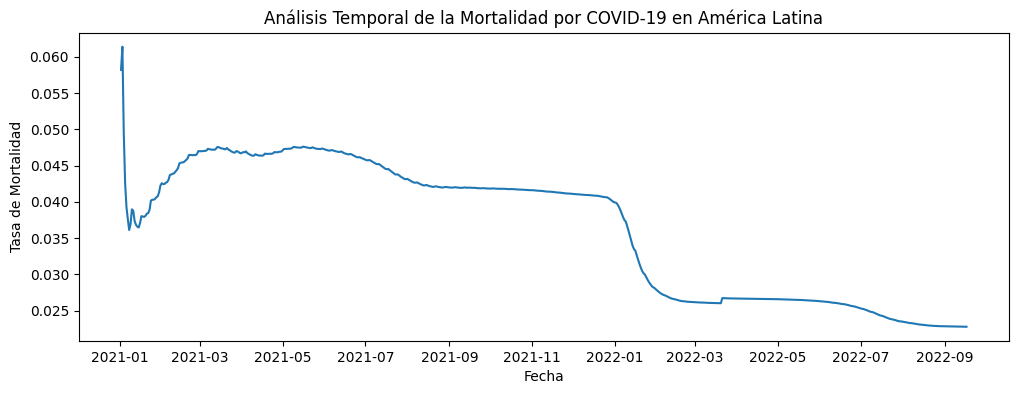

In [35]:
# cómo evolucionó la mortalidad
datos_finales ['mortality_rate'] = datos_finales ['cumulative_deceased'] / datos_finales ["cumulative_confirmed"]

plt.figure(figsize=(12,4))                                                                                         
sns.lineplot(data=datos_finales, x='date', y='mortality_rate', estimator="mean", ci=None)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()


Creamos otro grafico de 3 lineas, para ver la evolucion de casos activos, recuperado y muertes de todos los paises:

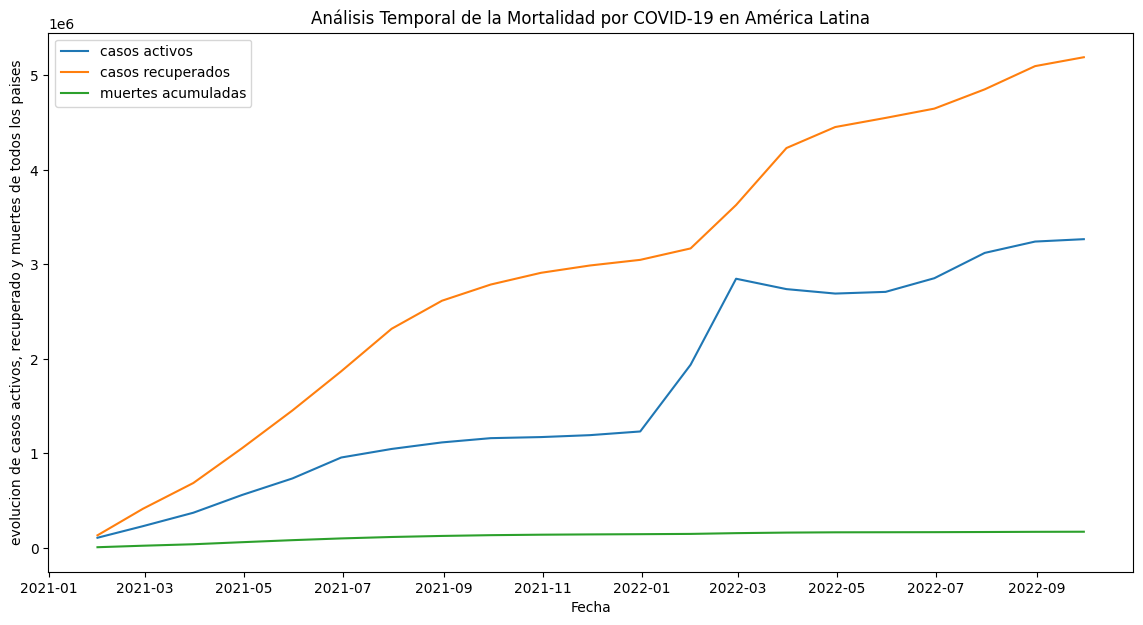

In [72]:
# cómo evolucionó la mortalidad
datos_finales ['active_cases'] = datos_finales ['cumulative_confirmed'] - datos_finales ["cumulative_deceased"] - datos_finales["cumulative_recovered"]

plt.figure(figsize=(14, 7))                                                                                         
sns.lineplot(data=datos_finales.resample("ME").mean(numeric_only=True),  x='date', y='active_cases', label="casos activos")
sns.lineplot(data=datos_finales.resample("ME").mean(numeric_only=True),  x='date', y='cumulative_recovered', label="casos recuperados")
sns.lineplot(data=datos_finales.resample("ME").mean(numeric_only=True),  x='date', y="cumulative_deceased", label="muertes acumuladas")
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('evolucion de casos activos, recuperado y muertes de todos los paises')
plt.show()


Creamos un grafico de columnas, sabiendo que no se tienen todos los datos, pero hay datos de recuperados en algunos paises:

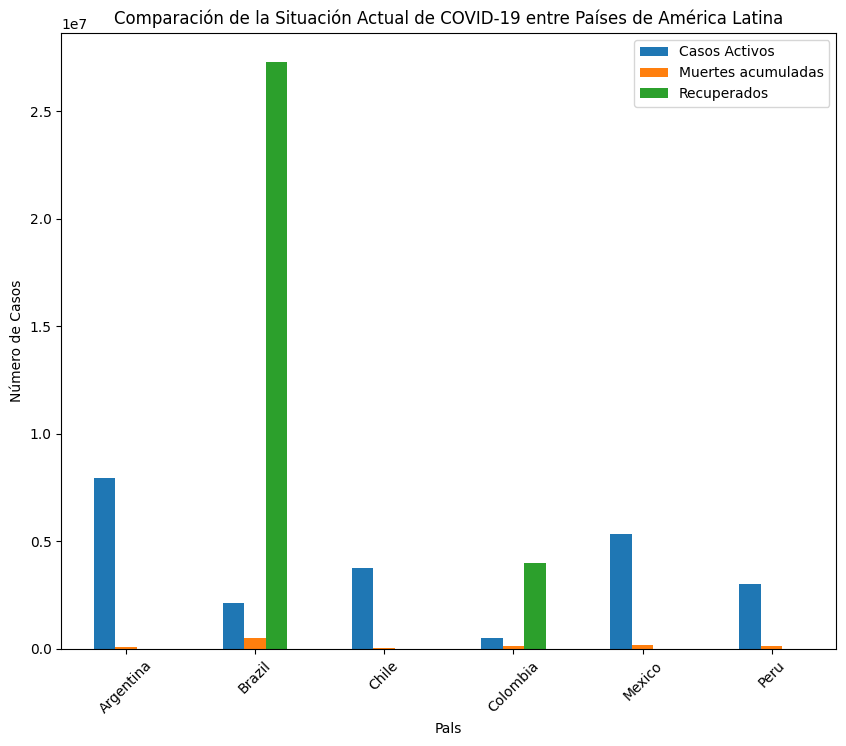

In [73]:
#No se tienen todos los datos, pero hay datos de recuperados y muertes en algunos paises
current_situation = datos_finales.groupby('country_name').max()[['active_cases', 'cumulative_deceased', "cumulative_recovered"]] 
current_situation.plot(kind='bar', stacked=False, figsize=(10, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('Pals')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Muertes acumuladas', 'Recuperados'])
plt.xticks(rotation=45)
plt.show()


A esta altura del analisis, se puede notar que hay graficas con comportamientos algo raros y eso es debido a nuestro conjnto de datos que nos brindaron para realizar el analisis sumado al tratamiento que le fuimos dando a los valores nulos.

Posteriormente, realizamos una grafica interesante donde logramo ver la relacion entre poblacion del pais y cantidad de personal de salud:

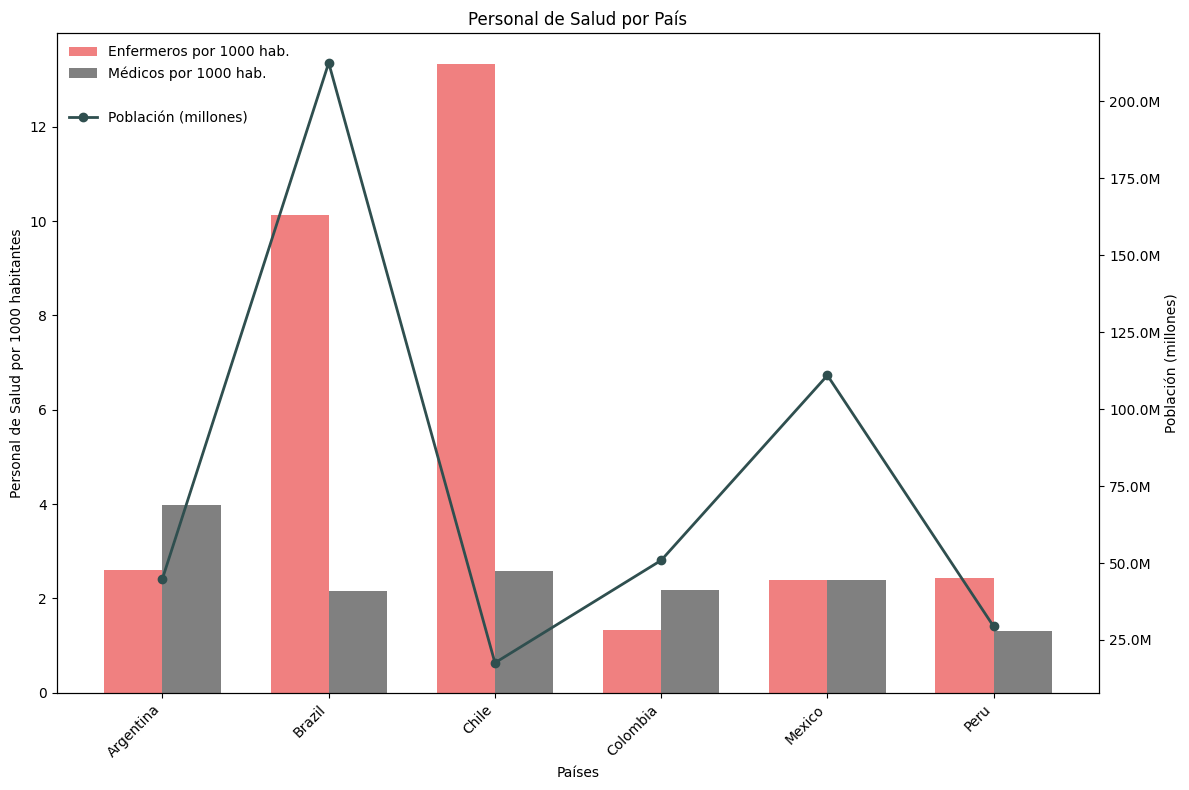

In [76]:
# Filtrar las columnas relevantes
cols_to_plot = ['country_name', 'nurses_per_1000', 'physicians_per_1000', 'population']

# Filtrar y limpiar datos (eliminar NaNs si es necesario)
#df_filtered = df_Latam[cols_to_plot].dropna()

# Agrupar por país y tomar el primer valor para cada país
df_grouped = datos_finales.groupby('country_name').first().reset_index()

# Configurar variables para el gráfico
countries = df_grouped['country_name']
nurses_per_1000 = df_grouped['nurses_per_1000']
physicians_per_1000 = df_grouped['physicians_per_1000']
population = df_grouped['population'] / 1e6  # Convertir población a millones

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Graficar columnas agrupadas (nurses_per_1000 y physicians_per_1000)
bar_width = 0.35
x = np.arange(len(countries))
bars1 = ax1.bar(x - bar_width/2, nurses_per_1000, bar_width, label='Enfermeros por 1000 hab.', color='lightcoral')
bars2 = ax1.bar(x + bar_width/2, physicians_per_1000, bar_width, label='Médicos por 1000 hab.', color='grey')

# Configurar ejes y etiquetas
ax1.set_xlabel('Países')
ax1.set_ylabel('Personal de Salud por 1000 habitantes')
ax1.set_title('Personal de Salud por País')
ax1.set_xticks(x)
ax1.set_xticklabels(countries, rotation=45, ha='right')

# Crear segundo eje y para la línea (población)
ax2 = ax1.twinx()
line = ax2.plot(x, population, color='darkslategray', marker='o', linestyle='-', linewidth=2, label='Población (millones)')

# Configurar ejes y etiquetas para el segundo eje y
ax2.set_ylabel('Población (millones)')

# Ajustar formato de los valores en el eje y para población
formatter = plt.FuncFormatter(lambda x, _: f'{x:.1f}M')
ax2.yaxis.set_major_formatter(formatter)

# Ajustar diseño del gráfico
fig.tight_layout()

# Agregar leyendas para las barras
bars = bars1 + bars2
labels = [bar.get_label() for bar in [bars1, bars2]]
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), frameon=False)

# Agregar leyenda para la línea de población
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9), frameon=False)

# Mostrar gráfico
plt.tight_layout()
plt.show()

Vemos la tasa de mortalidad por pasi:

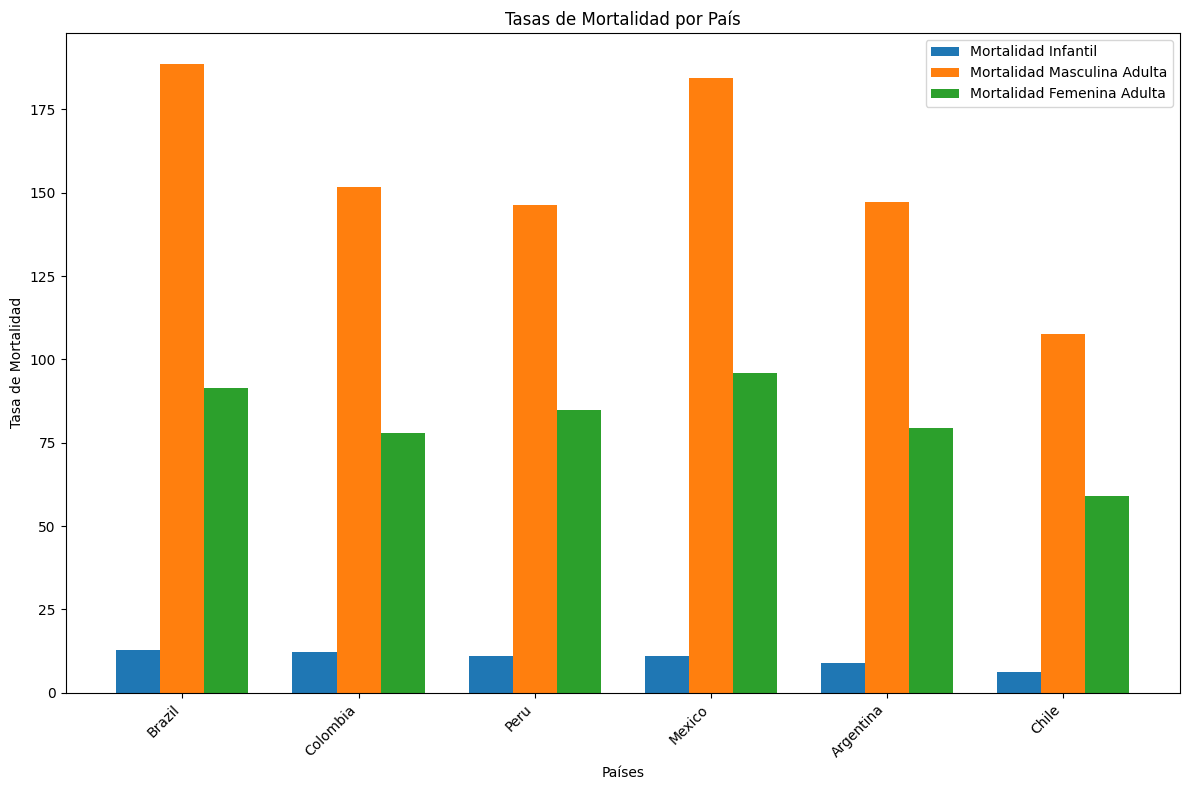

In [74]:
# Filtrar las columnas relevantes
cols_to_plot = ['country_name', 'infant_mortality_rate', 'adult_male_mortality_rate', 'adult_female_mortality_rate']

# Filtrar y limpiar datos (eliminar NaNs si es necesario)
df_filtered = datos_finales[cols_to_plot].dropna()

# Agrupar por país y tomar el primer valor para cada país
df_grouped = datos_finales.groupby('country_name').first().reset_index()

# Ordenar por alguna de las tasas de mortalidad (por ejemplo, infant_mortality_rate)
df_grouped = df_grouped.sort_values(by='infant_mortality_rate', ascending=False)

# Configurar variables para el gráfico
countries = df_grouped['country_name']
infant_mortality_rate = df_grouped['infant_mortality_rate']
adult_male_mortality_rate = df_grouped['adult_male_mortality_rate']
adult_female_mortality_rate = df_grouped['adult_female_mortality_rate']

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar barras apiladas
bar_width = 0.25
x = np.arange(len(countries))
bars1 = ax.bar(x - bar_width, infant_mortality_rate, bar_width, label='Mortalidad Infantil')
bars2 = ax.bar(x, adult_male_mortality_rate, bar_width, label='Mortalidad Masculina Adulta')
bars3 = ax.bar(x + bar_width, adult_female_mortality_rate, bar_width, label='Mortalidad Femenina Adulta')

# Configurar ejes y etiquetas
ax.set_xlabel('Países')
ax.set_ylabel('Tasa de Mortalidad')
ax.set_title('Tasas de Mortalidad por País')
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Ajustar diseño del gráfico
fig.tight_layout()

# Agregar leyenda
ax.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

Por lo tanto los paises donde debe expandirse la empresa farmaceutica son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado, tal vez las politicas de vacunación no han sido las mejores o no han tenido la cantidad de vacunas necesarias, esto sin tener en cuenta la densidad de población y la cantidad de habitantes de cada país y problemas sociales y económicos que puedan afectar la cantidad de casos confirmados y muertes.

#### EXTRA CREDIT


Creamos una funcion la cual puede sernos util para utilizarla mas adelante y crear de manera mas agil otra grafica:

In [ ]:
def lineplotgraf(data, x, y, label): #se debe reemplazar segun corresponda en la linea de abajo:
    sns.lineplot(data=datos_finales.resample("ME").mean(numeric_only=True),  x='date', y='active_cases', label="casos activos")
    sns.lineplot(data=datos_finales.resample("ME").mean(numeric_only=True),  x='date', y='cumulative_recovered', label="casos recuperados")
    plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
    plt.xlabel('Fecha')
    plt.ylabel('evolucion de casos activos vs recuperados de todos los paises')
    plt.show()


Para tener un mejor contexto graficamos la cantidad de vacunas administradas, los casos confirmados, muertes y recuperados.

In [42]:

# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium #libreria para crear mapas
from folium.plugins import HeatMap

# Seleccionamos las columnas que vamos a utilizar:
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', "cumulative_recovered"]
data_map = datos_finales [columns].dropna()

#Creamos un mapa centrado en América Latina
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

#Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15) 
map.add_child(heat_map_confirmed)

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15) 
map.add_child(heat_map_deceased)

#Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

#Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)
map.save('mapa.html')
map


## AVANCE 4:

Conexion de power BI con Python, mediante script, al archivo DatosFinalesFiltrados.csv: